In [1]:
import numpy as np
import pickle
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
sns.set_theme(color_codes=True)
from sklearn import metrics
from sklearn.metrics import matthews_corrcoef 
from sklearn.metrics import precision_score, recall_score,f1_score, accuracy_score,roc_auc_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import MinMaxScaler
# import tensorflow as tf
from numpy import array

# Model Libraries
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn import svm
from sklearn.ensemble import ExtraTreesClassifier
# from tensorflow.keras.layers import Dense, Activation, Input
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.datasets import make_friedman1
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
from sklearn.linear_model import ElasticNet
from sklearn import linear_model
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error, mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import cross_val_score

In [2]:
data = pd.read_excel(r"D:\UJ-ACCENTURE\Capstone Project\complete_data.xlsx")
data.head()

,Borehole ID,Depth From (m),Depth to (m),Run Length (m),True Thickness (m),Weathering,Hardness,Geotech Domain,Jn Description,Jr Description,...,Density,Virgin Stress,UCS Mpa,UCS/Virgin stress ratio,SRF,Q Value,LNQ,RMR,ESR VALUE,Maximum unsupported span
0,SEDD71,0.00,5.65,5.65,4.51,5.0,1.0,Weathered,Intact no or few joints,rough and discontinous,...,27000.0,3.173143,50.0,15.75725,10.0,0.000000,NaN,NaN,4.0,0.000000
1,SEDD71,5.65,7.60,1.95,6.07,4.0,1.0,Weathered,one joint set,rough and undulating,...,27000.0,3.173143,50.0,15.75725,5.0,NaN,NaN,NaN,1.6,NaN
2,SEDD71,7.60,9.42,1.82,7.52,4.0,1.0,Weathered,one joint set plus random joints,rough and planar,...,27000.0,3.173143,50.0,15.75725,2.5,NaN,NaN,NaN,1.3,NaN
3,SEDD71,9.42,10.60,1.18,8.47,3.0,3.0,Weathered,two joint set,smooth and discountinous,...,27000.0,3.173143,50.0,15.75725,7.5,0.452212,-0.793604,36.85756,1.0,1.456018
4,SEDD71,10.47,11.40,0.93,9.10,4.0,1.0,Weathered,two joint set plus random joints,smooth and undulating,...,27000.0,3.173143,50.0,15.75725,5.0,0.000000,NaN,NaN,0.8,0.000000


In [3]:
data.isnull().sum()

Borehole ID                  82
Depth From (m)               82
Depth to (m)                 82
Run Length (m)               82
True Thickness (m)           82
Weathering                   82
Hardness                     82
Geotech Domain               82
Jn Description                0
Jr Description               81
Ja Description               38
Jw Description                0
ESR Conditions               79
Depth underground (m)        82
RQD m                        82
RQD %                        82
Jn                            0
Jr                           81
Ja                           44
Jw                            0
Density                      82
Virgin Stress                82
UCS Mpa                      82
UCS/Virgin stress ratio      82
SRF                          57
Q Value                      89
LNQ                         174
RMR                         174
ESR VALUE                    79
Maximum unsupported span     89
dtype: int64

In [4]:
data.columns

Index(['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'Jn Description', 'Jr Description', 'Ja Description', 'Jw Description',
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 'RQD %', 'Jn', 'Jr',
       'Ja', 'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF', 'Q Value', 'LNQ', 'RMR', 'ESR VALUE',
       'Maximum unsupported span'],
      dtype='object')

## 2 Data Processing

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 679 entries, 0 to 678
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Borehole ID               597 non-null    object 
 1   Depth From (m)            597 non-null    float64
 2   Depth to (m)              597 non-null    float64
 3   Run Length (m)            597 non-null    float64
 4   True Thickness (m)        597 non-null    float64
 5   Weathering                597 non-null    float64
 6   Hardness                  597 non-null    float64
 7   Geotech Domain            597 non-null    object 
 8   Jn Description            679 non-null    object 
 9   Jr Description            598 non-null    object 
 10  Ja Description            641 non-null    object 
 11  Jw Description            679 non-null    object 
 12  ESR Conditions            600 non-null    object 
 13  Depth underground (m)     597 non-null    float64
 14  RQD m     

## 2.1 Categorical Data

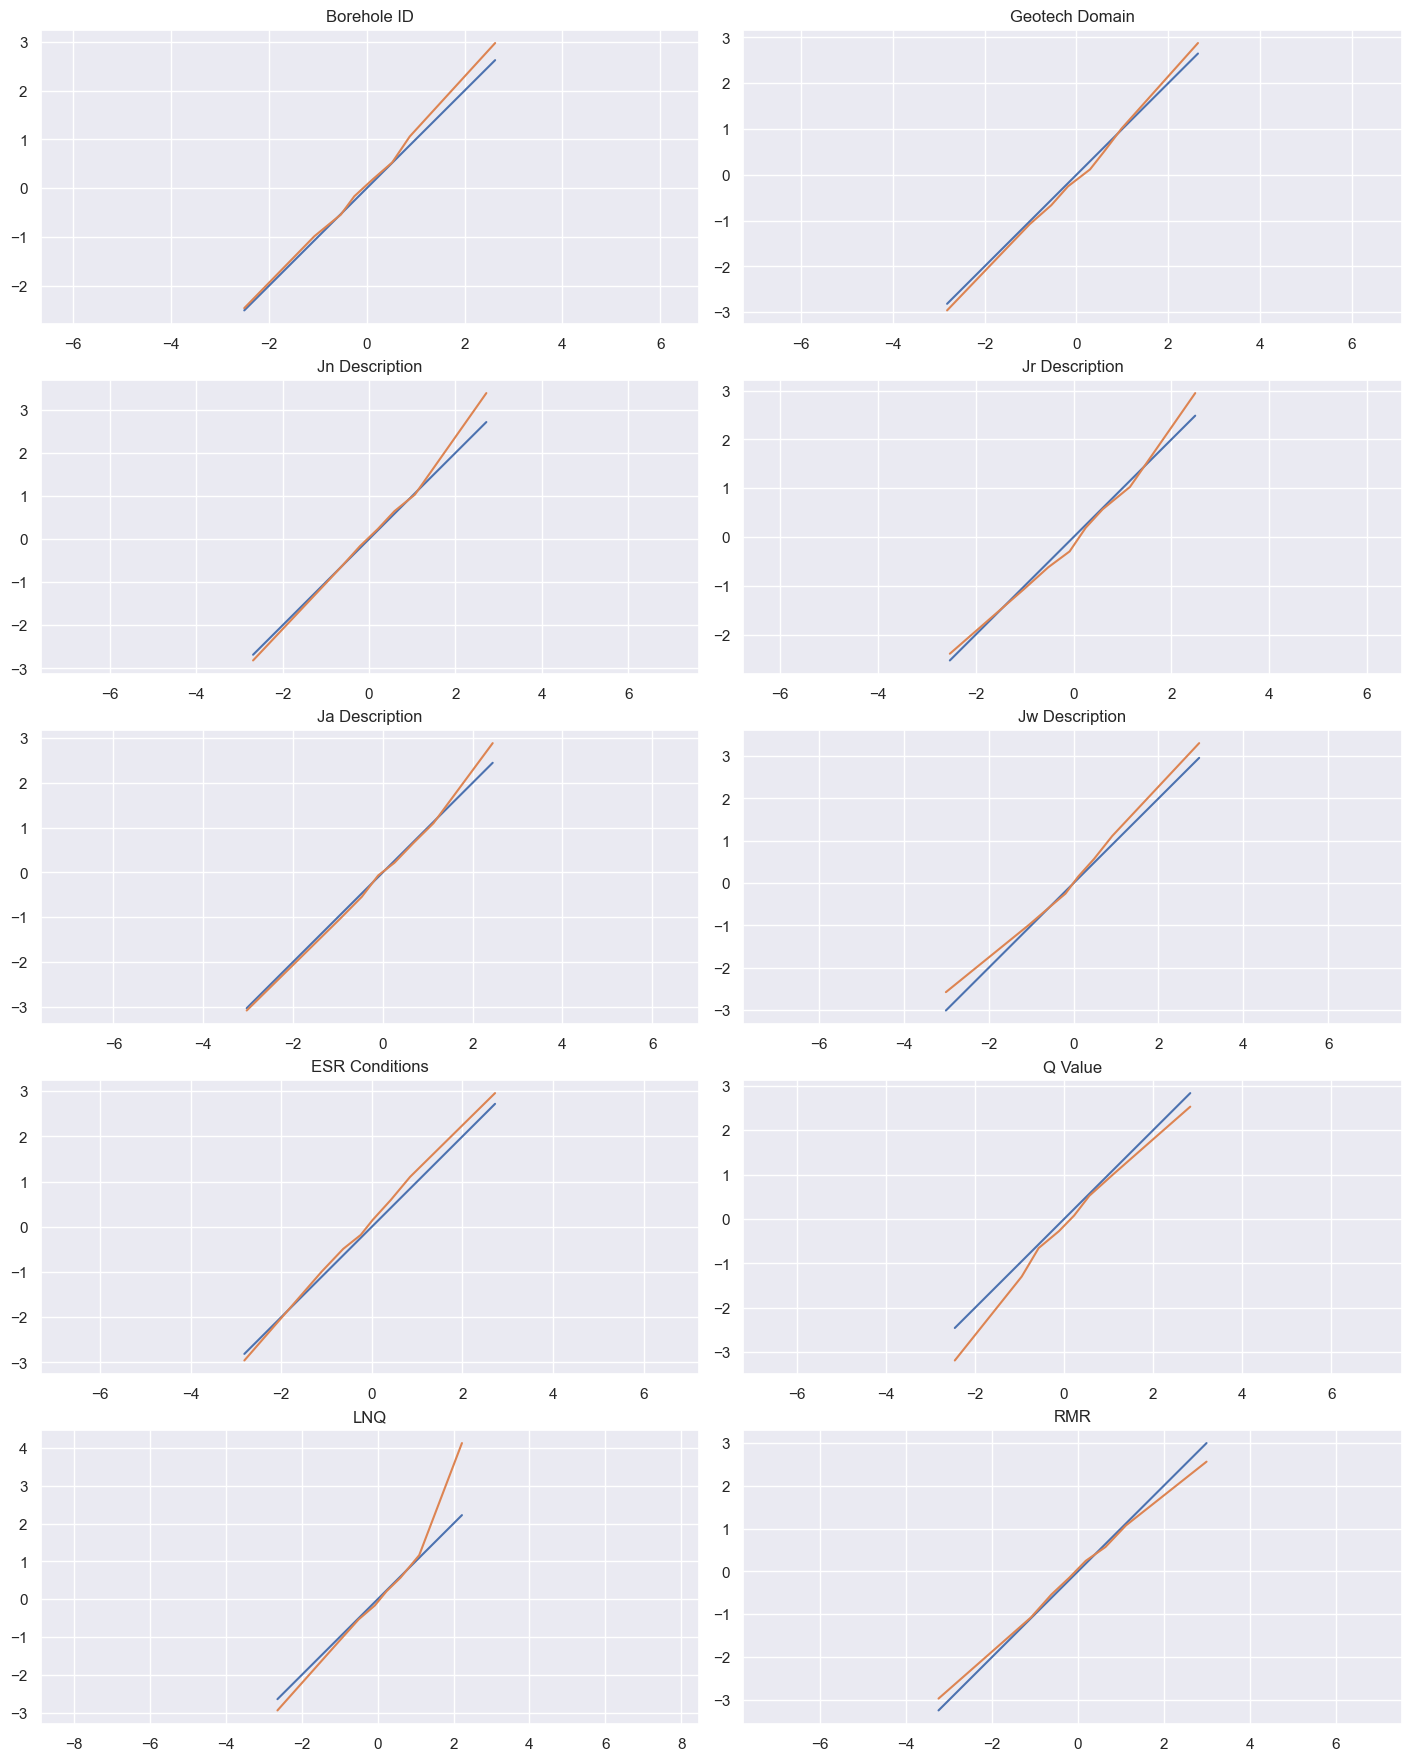

In [6]:
data = pd.DataFrame(np.random.randn(679,10), columns=['Borehole ID', 'Geotech Domain','Jn Description', 'Jr Description', 'Ja Description', 'Jw Description',
       'ESR Conditions','Q Value','LNQ','RMR'])
y=np.random.randint(0,2, (679,1))

#something to plot
data1=data[y==1].quantile(np.linspace(0,1,8))
data0=data[y==0].quantile(np.linspace(0,1,8))


from math import ceil

N=10

fig, axs = plt.subplots( ncols=2, nrows=ceil(N/2), layout='constrained',
                         figsize=(3.5 * 4, 3.5 * ceil(N/2)) )

for (i, var), ax in zip(enumerate(data.iloc[:,:N]), axs.flat):
    ax.set_title(var)
    ax.axis('equal')
    ax.plot(data0.loc[:][var], data0.loc[:][var])
    ax.plot(data0.loc[:][var], data1.loc[:][var])

## 2.2 Numerical Data

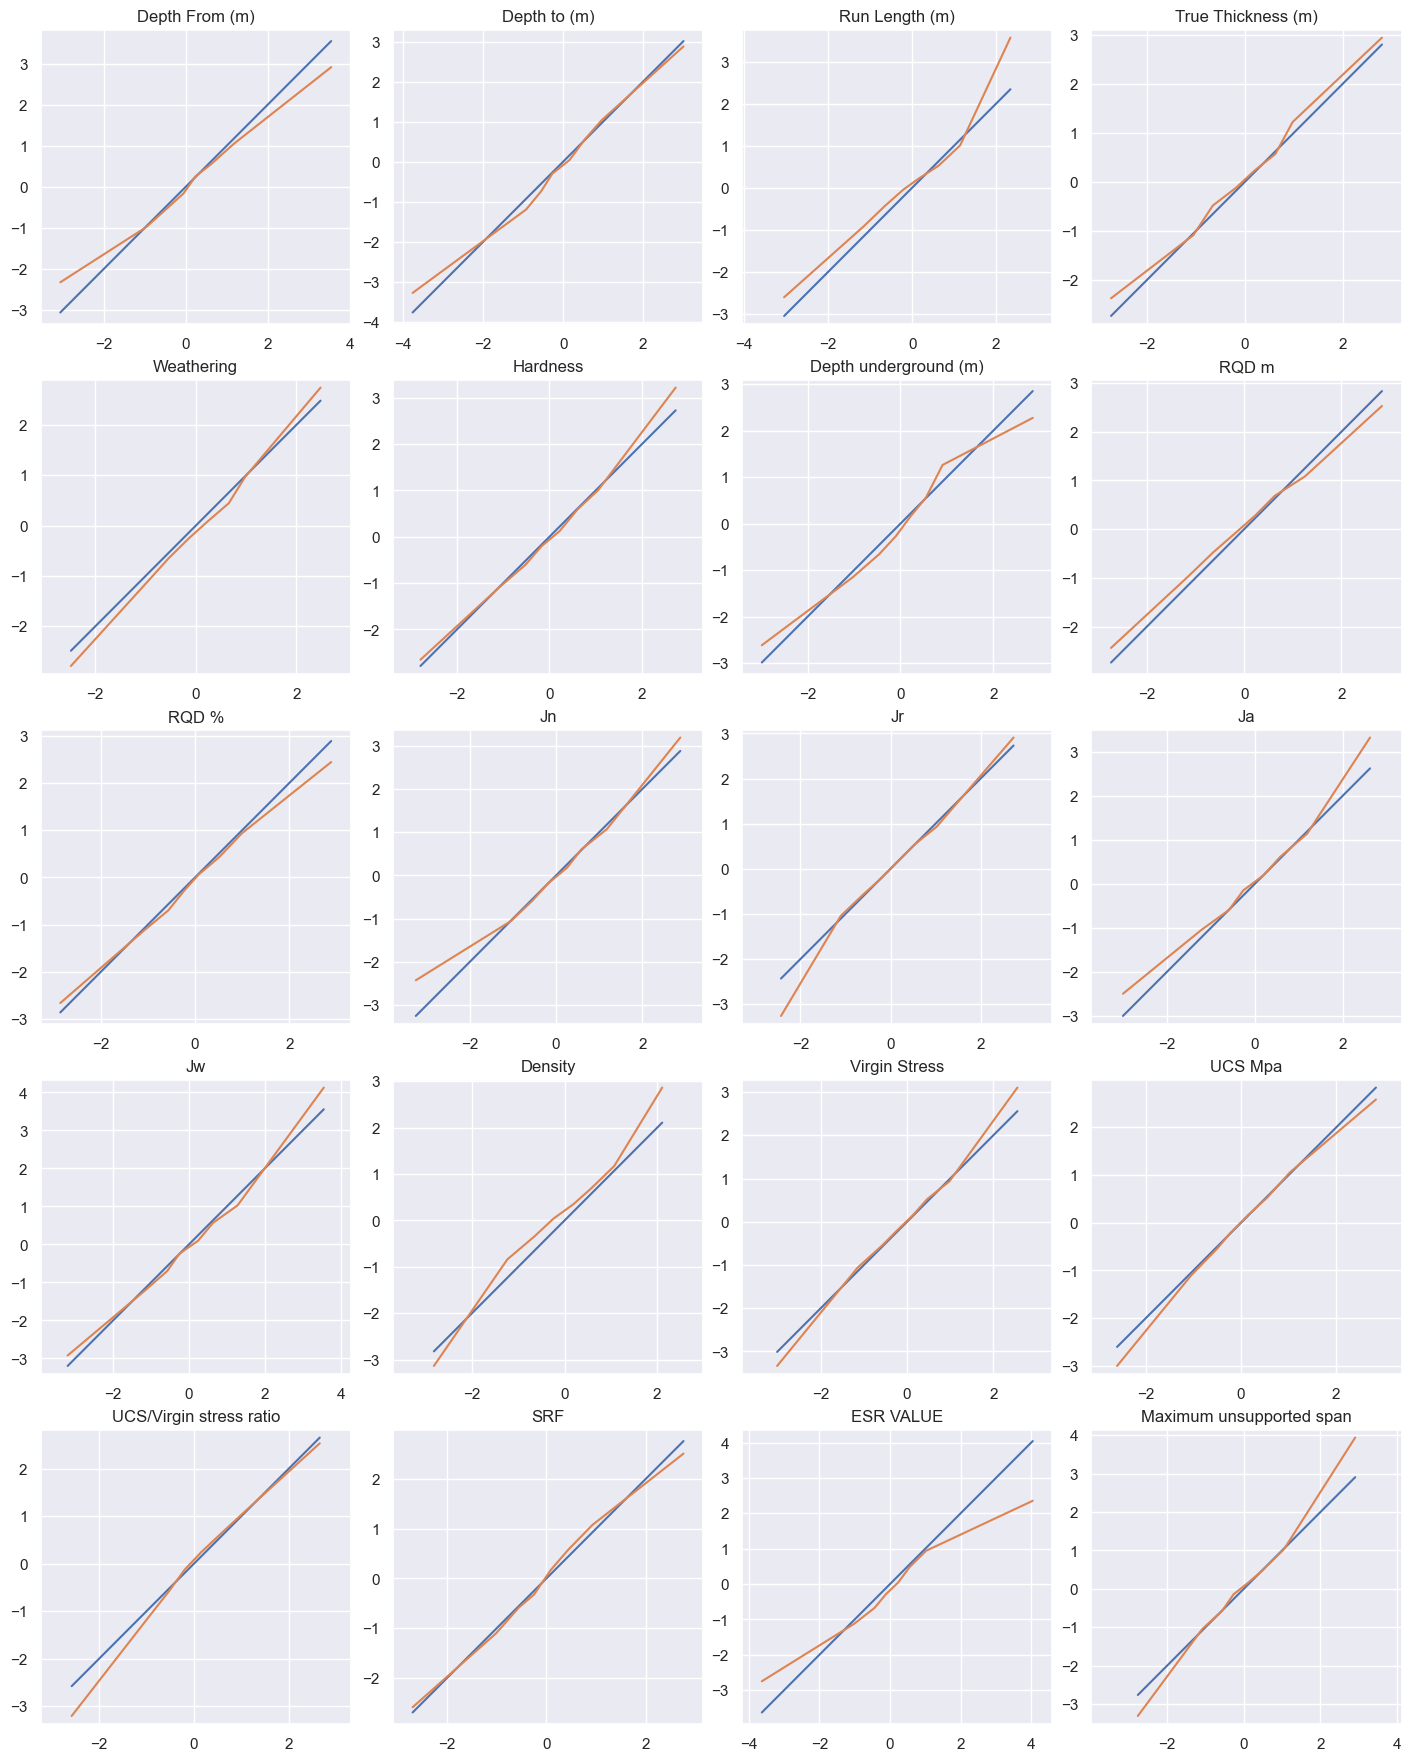

In [7]:
data = pd.DataFrame(np.random.randn(679,20), columns=['Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness',
       'Depth underground (m)', 'RQD m', 'RQD %', 'Jn', 'Jr',
       'Ja', 'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF',  'ESR VALUE',
       'Maximum unsupported span'])
y=np.random.randint(0,2, (679,1))

#something to plot
data1=data[y==1].quantile(np.linspace(0,1,8))
data0=data[y==0].quantile(np.linspace(0,1,8))


from math import ceil

N=20

fig, axs = plt.subplots( ncols=4, nrows=ceil(N/4), layout='constrained',
                         figsize=(3.5 * 4, 3.5 * ceil(N/4)) )

for (i, var), ax in zip(enumerate(data.iloc[:,:N]), axs.flat):
    ax.set_title(var)
    ax.axis('equal')
    ax.plot(data0.loc[:][var], data0.loc[:][var])
    ax.plot(data0.loc[:][var], data1.loc[:][var])

## 2.3 Replacing the NaN values

In [8]:
data = pd.read_excel(r"D:\UJ-ACCENTURE\Capstone Project\complete_data.xlsx")

data = data.dropna()

## 2.4 Encoding the catergorical data

In [9]:
# loop through the columns in the dataframe where type is "object"
for col in data.select_dtypes(include=["object"]).columns:
    #initialize a label encoder
    label_encoder = LabelEncoder()
    
    #fit the encoder to the unique values in the columns
#     label_encoder.fit(data[col].unique())
    label_encoder.fit(data[col])
    
    #transform the column usinf the encode
    data[col] = label_encoder.transform(data[col])
    
    #print the columns names and the unique encoded values
#     print(f"{col}: {data[col].unique()}")
    print(f"{col}: {data[col]}")

    

Borehole ID: 3      6
6      6
7      6
8      6
9      6
      ..
592    5
593    5
594    5
595    5
596    5
Name: Borehole ID, Length: 505, dtype: int32
Geotech Domain: 3      2
6      2
7      2
8      1
9      1
      ..
592    0
593    0
594    0
595    0
596    0
Name: Geotech Domain, Length: 505, dtype: int32
Jn Description: 3      39
6      34
7       4
8      20
9      22
       ..
592    25
593    39
594    40
595    10
596    11
Name: Jn Description, Length: 505, dtype: int32
Jr Description: 3      44
6      40
7       0
8      42
9      21
       ..
592    37
593    20
594    17
595     5
596    10
Name: Jr Description, Length: 505, dtype: int32
Ja Description: 3      317
6      234
7      233
8      232
9      228
      ... 
592    164
593    165
594    166
595      0
596      1
Name: Ja Description, Length: 505, dtype: int32
Jw Description: 3      343
6      344
7      342
8      341
9        0
      ... 
592    237
593    238
594    239
595    240
596    241
Name: Jw D

In [10]:
data.head()

,Borehole ID,Depth From (m),Depth to (m),Run Length (m),True Thickness (m),Weathering,Hardness,Geotech Domain,Jn Description,Jr Description,...,Density,Virgin Stress,UCS Mpa,UCS/Virgin stress ratio,SRF,Q Value,LNQ,RMR,ESR VALUE,Maximum unsupported span
3,6,9.42,10.6,1.18,8.47,3.0,3.0,2,39,44,...,27000.0,3.173143,50.0,15.757250,7.5,0.452212,-0.793604,36.857560,1.0,1.456018
6,6,12.50,14.0,1.50,11.18,3.0,2.0,2,34,40,...,27000.0,3.173143,50.0,15.757250,5.0,0.069333,-2.668829,19.980535,1.6,1.100340
7,6,14.00,15.0,1.00,11.98,3.0,3.0,2,4,0,...,27000.0,3.173143,50.0,15.757250,7.5,0.002000,-6.214608,-11.931473,1.3,0.216464
8,6,15.00,16.6,1.60,13.26,2.0,3.0,1,20,42,...,27000.0,2.574536,135.0,52.436625,1.0,0.000564,-7.480038,-23.320340,1.0,0.100372
9,6,16.60,18.1,1.50,14.46,2.0,3.0,1,22,21,...,27000.0,2.574536,135.0,52.436625,1.0,2.518519,0.923671,52.313038,0.8,2.315144


In [11]:
data.info()
data.describe()
data.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 505 entries, 3 to 596
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Borehole ID               505 non-null    int32  
 1   Depth From (m)            505 non-null    float64
 2   Depth to (m)              505 non-null    float64
 3   Run Length (m)            505 non-null    float64
 4   True Thickness (m)        505 non-null    float64
 5   Weathering                505 non-null    float64
 6   Hardness                  505 non-null    float64
 7   Geotech Domain            505 non-null    int32  
 8   Jn Description            505 non-null    int32  
 9   Jr Description            505 non-null    int32  
 10  Ja Description            505 non-null    int32  
 11  Jw Description            505 non-null    int32  
 12  ESR Conditions            505 non-null    int32  
 13  Depth underground (m)     505 non-null    float64
 14  RQD m     

Borehole ID                 0
Depth From (m)              0
Depth to (m)                0
Run Length (m)              0
True Thickness (m)          0
Weathering                  0
Hardness                    0
Geotech Domain              0
Jn Description              0
Jr Description              0
Ja Description              0
Jw Description              0
ESR Conditions              0
Depth underground (m)       0
RQD m                       0
RQD %                       0
Jn                          0
Jr                          0
Ja                          0
Jw                          0
Density                     0
Virgin Stress               0
UCS Mpa                     0
UCS/Virgin stress ratio     0
SRF                         0
Q Value                     0
LNQ                         0
RMR                         0
ESR VALUE                   0
Maximum unsupported span    0
dtype: int64

In [12]:
data.head()

,Borehole ID,Depth From (m),Depth to (m),Run Length (m),True Thickness (m),Weathering,Hardness,Geotech Domain,Jn Description,Jr Description,...,Density,Virgin Stress,UCS Mpa,UCS/Virgin stress ratio,SRF,Q Value,LNQ,RMR,ESR VALUE,Maximum unsupported span
3,6,9.42,10.6,1.18,8.47,3.0,3.0,2,39,44,...,27000.0,3.173143,50.0,15.757250,7.5,0.452212,-0.793604,36.857560,1.0,1.456018
6,6,12.50,14.0,1.50,11.18,3.0,2.0,2,34,40,...,27000.0,3.173143,50.0,15.757250,5.0,0.069333,-2.668829,19.980535,1.6,1.100340
7,6,14.00,15.0,1.00,11.98,3.0,3.0,2,4,0,...,27000.0,3.173143,50.0,15.757250,7.5,0.002000,-6.214608,-11.931473,1.3,0.216464
8,6,15.00,16.6,1.60,13.26,2.0,3.0,1,20,42,...,27000.0,2.574536,135.0,52.436625,1.0,0.000564,-7.480038,-23.320340,1.0,0.100372
9,6,16.60,18.1,1.50,14.46,2.0,3.0,1,22,21,...,27000.0,2.574536,135.0,52.436625,1.0,2.518519,0.923671,52.313038,0.8,2.315144


<Axes: >

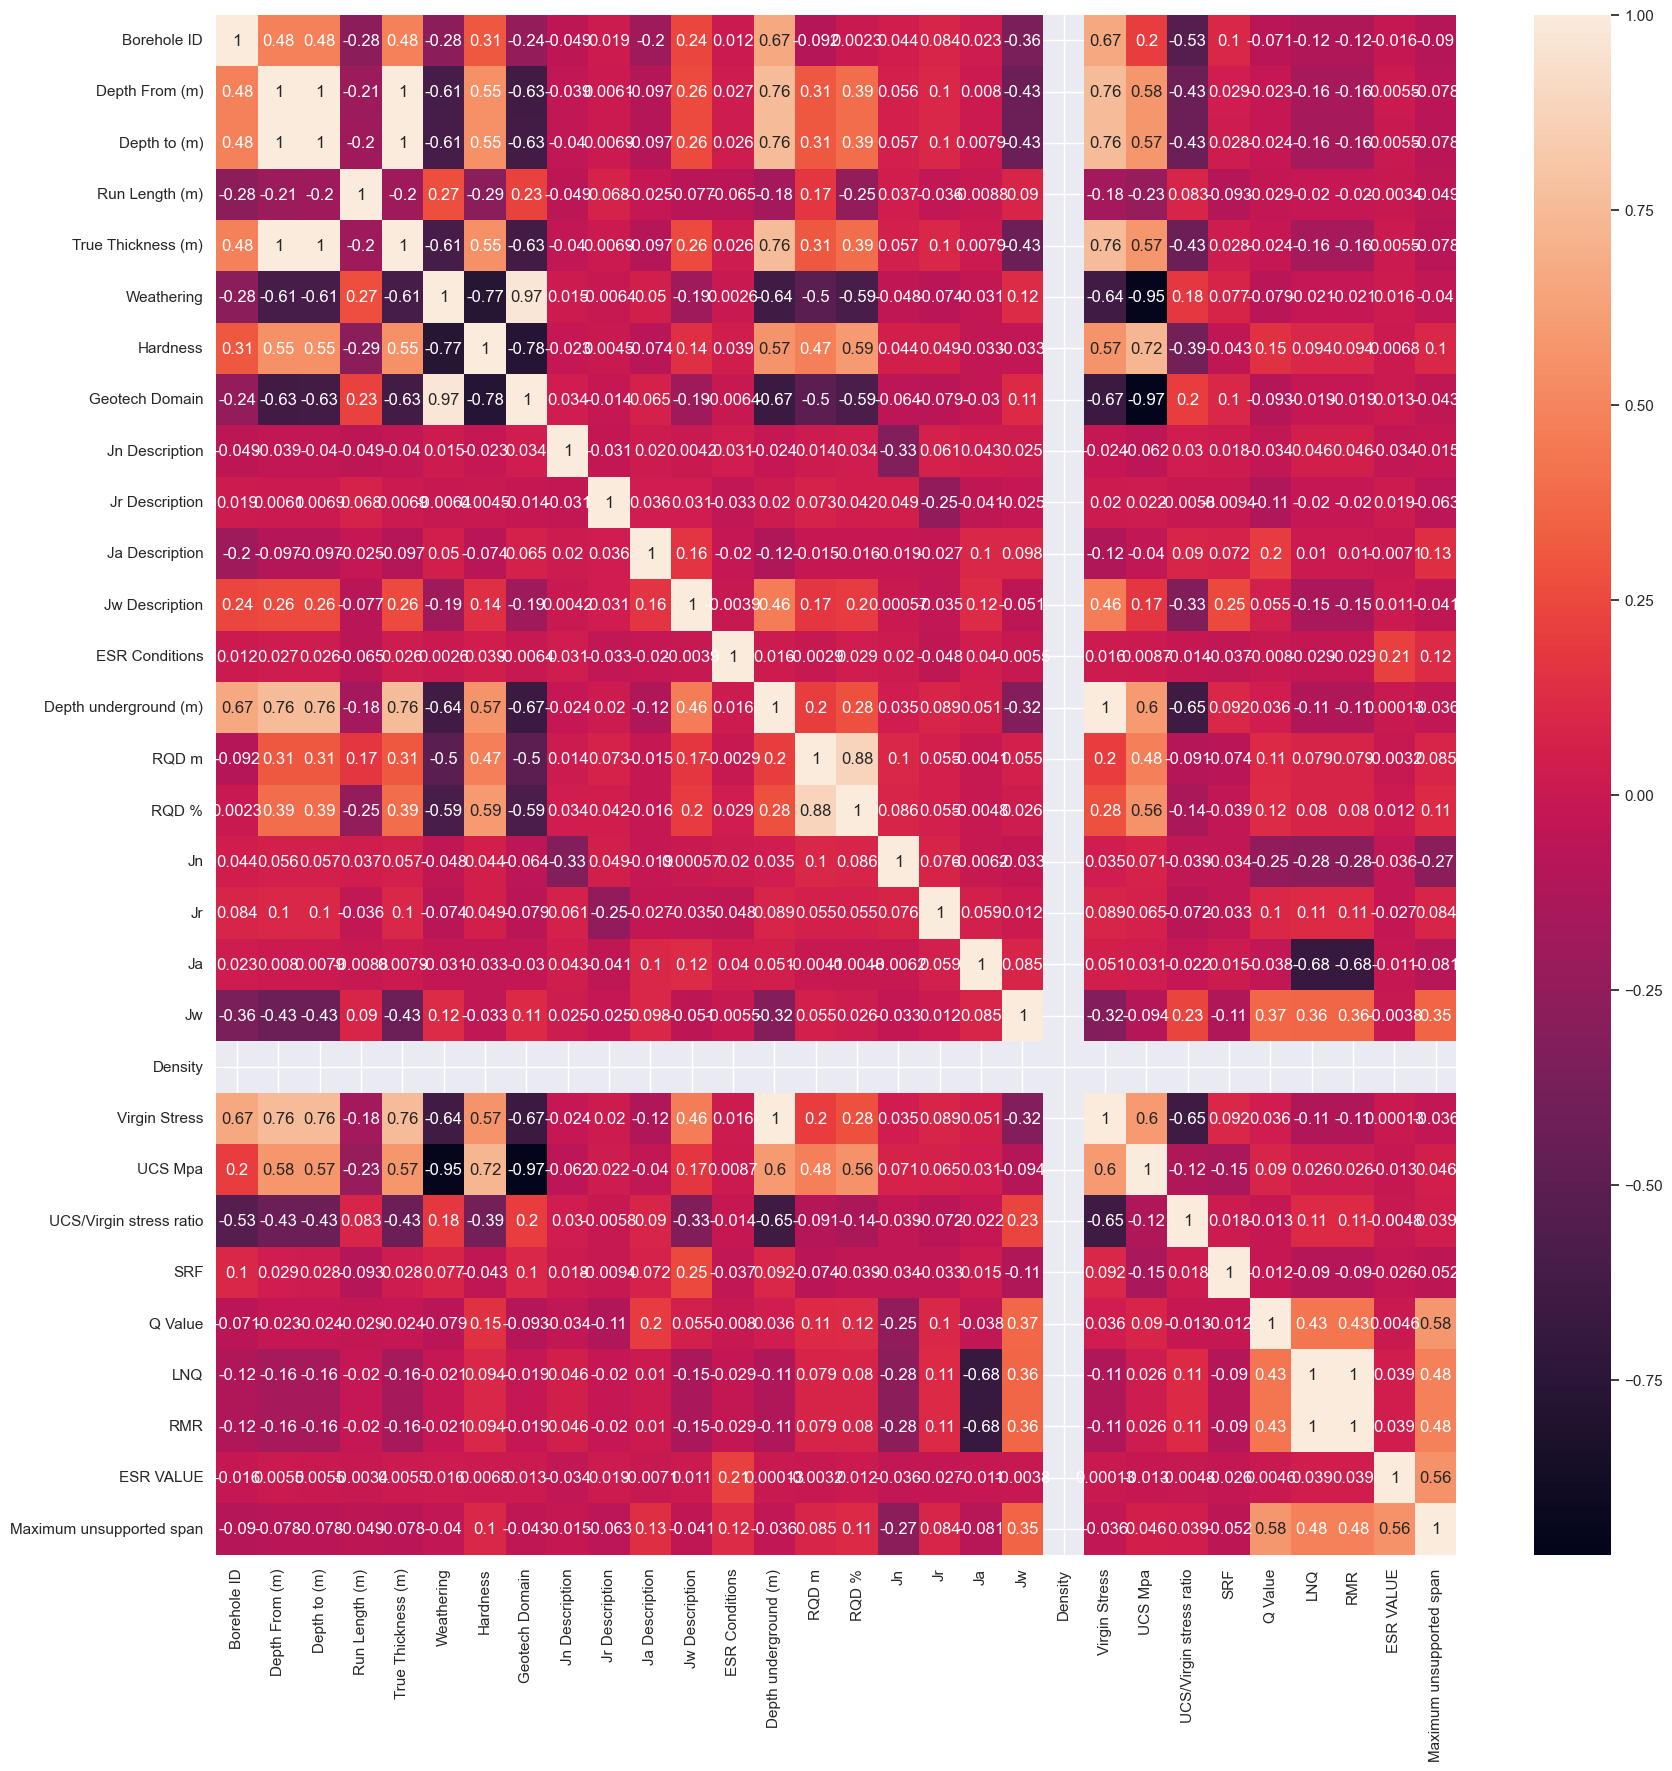

In [13]:
plt.figure(figsize=(20, 20))
sns.heatmap(data.corr(), fmt='0.2g', annot=True)

# 3 Dropping columns to target each input and output

In [14]:
columns_to_drop_for_Jn = ['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
        'Jr Description', 'Ja Description', 'Jw Description',
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 'RQD %', 'Jr',
       'Ja', 'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF', 'Q Value', 'LNQ', 'RMR', 'ESR VALUE',
       'Maximum unsupported span']

df1 = data.drop(columns_to_drop_for_Jn, axis=1)

x1 = df1.iloc[:,:1]
y1 = df1.iloc[:,1:]

columns_to_drop_for_Ja = ['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'Jn Description', 'Jr Description', 'Jw Description',
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 'RQD %', 'Jn', 'Jr',
        'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF', 'Q Value', 'LNQ', 'RMR', 'ESR VALUE',
       'Maximum unsupported span']

df2 = data.drop(columns_to_drop_for_Ja, axis=1)

x2 = df1.iloc[:,:1]
y2 = df1.iloc[:,1:]

columns_to_drop_for_Jr = ['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'Jn Description', 'Ja Description', 'Jw Description',
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 'RQD %', 'Jn',
       'Ja', 'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF', 'Q Value', 'LNQ', 'RMR', 'ESR VALUE',
       'Maximum unsupported span']

df3 = data.drop(columns_to_drop_for_Jr, axis=1)
x3 = df3.iloc[:,:1]
y3 = df3.iloc[:,1:]

columns_to_drop_for_Jw =['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'Jn Description', 'Jr Description', 'Ja Description', 
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 'RQD %', 'Jn', 'Jr',
       'Ja',  'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF', 'Q Value', 'LNQ', 'RMR', 'ESR VALUE',
       'Maximum unsupported span']

df4 = data.drop(columns_to_drop_for_Jw, axis=1)
x4 = df4.iloc[:,:1]
y4 = df4.iloc[:,1:]

columns_to_drop_for_rqd = ['Borehole ID','Geotech Domain',
                           'Jn Description', 'Jr Description', 'Ja Description', 'Jw Description',
                           'ESR Conditions', 'Depth underground (m)','Jn', 'Jr',
                           'Ja', 'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
                           'UCS/Virgin stress ratio', 'SRF', 'Q Value', 'LNQ', 'RMR', 'ESR VALUE',
                           'Maximum unsupported span','RQD m','Run Length (m)','Weathering']

df5 = data.drop(columns_to_drop_for_rqd, axis=1)
x5 = df5.iloc[:,:3]
y5 = df5.iloc[:,3:]

columns_to_drop_for_srf = ['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'Jn Description', 'Jr Description', 'Ja Description', 'Jw Description',
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 'RQD %', 'Jn', 'Jr',
       'Ja', 'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
         'Q Value', 'LNQ', 'RMR', 'ESR VALUE',
       'Maximum unsupported span']

df6 = data.drop(columns_to_drop_for_srf, axis=1)
x6 = df6.iloc[:,:1]
y6 = df6.iloc[:,1:]


columns_to_drop_for_ucs_vsr = ['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness',
       'Jn Description', 'Jr Description', 'Ja Description', 'Jw Description',
       'ESR Conditions', 'RQD m', 'RQD %', 'Jn', 'Jr',
       'Ja', 'Jw', 'Virgin Stress',
        'SRF', 'Q Value', 'LNQ', 'RMR', 'ESR VALUE',
       'Maximum unsupported span','Geotech Domain']

df7 = data.drop(columns_to_drop_for_ucs_vsr, axis=1)
x7 = df7.iloc[:,:3]
y7 = df7.iloc[:,3:]


columns_to_drop_for_q = ['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'Jn Description', 'Jr Description', 'Ja Description', 'Jw Description',
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 
        'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'LNQ', 'RMR', 'ESR VALUE',
       'Maximum unsupported span']

df8 = data.drop(columns_to_drop_for_q, axis=1)
x8 = df8.iloc[:,:6]
y8 = df8.iloc[:,6:]



columns_to_drop_for_esr = ['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'Jn Description', 'Jr Description', 'Ja Description', 'Jw Description',
        'Depth underground (m)', 'RQD m', 'RQD %', 'Jn', 'Jr',
       'Ja', 'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF', 'Q Value', 'LNQ', 'RMR', 
       'Maximum unsupported span']

df9 = data.drop(columns_to_drop_for_esr, axis=1)
x9 = df9.iloc[:,:1]
y9 = df9.iloc[:,1:]


columns_to_drop_for_rmr = ['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'Jn Description', 'Jr Description', 'Ja Description', 'Jw Description',
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 'RQD %', 'Jn', 'Jr',
       'Ja', 'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF' , 'ESR VALUE',
       'Maximum unsupported span']

df10 = data.drop(columns_to_drop_for_rmr, axis=1)
x10 = df10.iloc[:,:2]
y10 = df10.iloc[:,2:]

columns_to_drop_for_us = ['Borehole ID', 'Depth From (m)', 'Depth to (m)', 'Run Length (m)',
       'True Thickness (m)', 'Weathering', 'Hardness', 'Geotech Domain',
       'Jn Description', 'Jr Description', 'Ja Description', 'Jw Description',
       'ESR Conditions', 'Depth underground (m)', 'RQD m', 'RQD %', 'Jn', 'Jr',
       'Ja', 'Jw', 'Density', 'Virgin Stress', 'UCS Mpa',
       'UCS/Virgin stress ratio', 'SRF', 'LNQ', 'RMR']

df11 = data.drop(columns_to_drop_for_us, axis=1)
x11 = df11.iloc[:,:2]
y11 = df11.iloc[:,2:]

# 4 Building the different models for the different input and output
## 4.1 Model for Jn

In [15]:
df1.head()

,Jn Description,Jn
3,39,4
6,34,12
7,4,15
8,20,20
9,22,3


In [16]:
y1=y1.astype('int')

x1_train, x1_test, y1_train, y1_test = train_test_split(x1,y1, test_size=0.2, random_state=42)

x1_train = np.array(x1_train)
x1_test = np.array(x1_test)



scaler = StandardScaler()
scaler.fit(x1_train,y1_train)

StandardScaler(copy=True, with_mean=True, with_std=True)
x1_train = scaler.transform(x1_train)
x1_test = scaler.transform(x1_test)




mlp_Jn = MLPClassifier(hidden_layer_sizes=(60,60,60),max_iter=20000)

mlp_Jn.fit(x1_train,y1_train.values.ravel())


predicted_mlp_Jn= mlp_Jn.predict(x1_test)
Accuracy_MLP_Jn = metrics.accuracy_score(predicted_mlp_Jn, y1_test)
Precission_MLP_Jn = metrics.precision_score(predicted_mlp_Jn, y1_test,average='micro')
Recall_MLP_Jn = metrics.recall_score(predicted_mlp_Jn, y1_test,average='micro')
F1_score_MLP_Jn = metrics.recall_score(predicted_mlp_Jn, y1_test,average='micro')

print("=========================================================================")

print("1. Results using MLP classifier for Jn")
print("==========================================================================")
print('Accuracy for Jn [MLPClassifier]: %.3f' % (Accuracy_MLP_Jn*100))
print('Precision for Jn [MLPClassifier]: %.3f' % (Precission_MLP_Jn*100))
print('Recall for Jn [MLPClassifier]: %.3f' % (Recall_MLP_Jn*100))
print('F1 Score for Jn [MLPClassifier]: %.3f' % (F1_score_MLP_Jn*100))
print("==========================================================================")


# all parameters not specified are set to their defaults
model_LR_Jn = LogisticRegression()
model_LR_Jn.fit(x1_train, y1_train.values.ravel())


#Predict Output
predicted_Jn= model_LR_Jn.predict(x1_test) 



print("2. Logistic Regression results for Jn")
print("=========================================================================")
#Model Accuracy, how often is the classifier correct?
Accuracy_LR_Jn = metrics.accuracy_score(predicted_Jn, y1_test)
Precission_LR_Jn = metrics.precision_score(predicted_Jn, y1_test,average='micro')
Recall_LR_Jn = metrics.recall_score(predicted_Jn, y1_test,average='micro')
F1_score_LR_Jn = metrics.f1_score(predicted_Jn, y1_test,average='micro')


print('Accuracy for Jn [Logistic Regression]: %.3f' % (Accuracy_LR_Jn*100))
print('Accuracy for Jn [Logistic Regression]: %.3f' % (Precission_LR_Jn*100))
print('Accuracy for Jn [Logistic Regression]: %.3f' % (Recall_LR_Jn*100))
print('Accuracy for Jn [Logistic Regression]: %.3f' % (F1_score_LR_Jn*100))
print("=========================================================================")



dt_model_Jn = RandomForestClassifier()
rf_clf_Jn = dt_model_Jn.fit(x1_train, y1_train.values.ravel())

# Predict targets on the testing data
test_random_forest_Jn = rf_clf_Jn.predict(x1_test)

Accuracy_RF_Jn = accuracy_score(y1_test, test_random_forest_Jn)
Recall_RF_Jn = recall_score(y1_test, test_random_forest_Jn, average='micro')
Precission_RF_Jn = precision_score(y1_test, test_random_forest_Jn,average='micro')
F1_score_RF_Jn = matthews_corrcoef(y1_test, test_random_forest_Jn)



print("3. Random Forest Results for Jn")

print("=========================================================================")
print('Accuracy for Jn [Random Forest]: %.3f' % (Accuracy_RF_Jn*100))
print('Recall for Jn [Random Forest]: %.3f' % (Recall_RF_Jn*100))
print('Precision for Jn [Random Forest]: %.3f' % (Precission_RF_Jn*100))
print('F1 Score for Jn [Random Forest]: %.3f' % (F1_score_RF_Jn*100))

print("=========================================================================")


ababoost_Jn = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=15),
                           n_estimators=100, 
                           learning_rate=1.0, 
                           algorithm='SAMME.R')
ababoost_Jn = ababoost_Jn.fit(x1_train, y1_train.values.ravel())

# Predict targets on the testing data
test_predictions_Jn = ababoost_Jn.predict(x1_test)
Accuracy_AC_Jn = accuracy_score(y1_test, test_predictions_Jn)
Recall_AC_Jn = recall_score(y1_test, test_predictions_Jn,average='micro')
Precission_AC_Jn = precision_score(y1_test, test_predictions_Jn,average='micro')
F1_score_AC_Jn = matthews_corrcoef(y1_test, test_predictions_Jn)


print("4. AdaBoost Claasifier for Jn")
print("=========================================================================")
print('Accuracy for Jn [AdaBoost Claasifier]: %.3f' % (Accuracy_AC_Jn*100))
print('Precission for Jn [AdaBoost Claasifier]: %.3f' % (Precission_AC_Jn*100))
print('Recall for Jn [AdaBoost Claasifier]: %.3f' % (Recall_AC_Jn*100))
print('F1 Score for Jn [AdaBoost Claasifier]: %.3f' % (F1_score_AC_Jn*100))
print("=========================================================================")


extra_tree_Jn = ExtraTreesClassifier()
extra_tree_Jn = extra_tree_Jn.fit(x1_train, y1_train.values.ravel())

# Predict targets on the testing data
extra_tree_test_predictions_Jn = extra_tree_Jn.predict(x1_test)

Accuracy_ETC_Jn = accuracy_score(y1_test, extra_tree_test_predictions_Jn)
Recall_ETC_Jn = recall_score(y1_test, extra_tree_test_predictions_Jn,average='micro')
Precission_ETC_Jn = precision_score(y1_test, extra_tree_test_predictions_Jn,average='micro')
F1_score_ETC_Jn = matthews_corrcoef(y1_test, extra_tree_test_predictions_Jn)

print("5. Extra Tree Classifier for Jn")
print("=========================================================================")
print('Accuracy for Jn [ExtraTreesClassifier]: %.3f' % (Accuracy_ETC_Jn*100))
print('Precission for Jn [ExtraTreesClassifier]: %.3f' % (Precission_ETC_Jn*100))
print('Recall for Jn [ExtraTreesClassifier]: %.3f' % (Recall_ETC_Jn*100))
print('F1 Score for Jn [ExtraTreesClassifier]: %.3f' % (F1_score_ETC_Jn*100))
print("=========================================================================")


gradient_boosting_Jn = GradientBoostingClassifier()
gradient_boosting_Jn = gradient_boosting_Jn.fit(x1_train, y1_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_predictions_Jn = gradient_boosting_Jn.predict(x1_test) 

Accuracy_GBC_Jn = accuracy_score(y1_test, gradient_boosting_test_predictions_Jn)
Recall_GBC_Jn = recall_score(y1_test, gradient_boosting_test_predictions_Jn,average='micro')
Precission_GBC_Jn = precision_score(y1_test, gradient_boosting_test_predictions_Jn,average='micro')
F1_score_GBC_Jn = matthews_corrcoef(y1_test, gradient_boosting_test_predictions_Jn)


print("6. Gradient Boosting Classifier for Jn")
print("=========================================================================")
print('Accuracy for Jn [Gradient Boosting Classifier]: %.3f' % (Accuracy_GBC_Jn*100))
print('Precission for Jn [Gradient Boosting Classifier: %.3f' % (Precission_GBC_Jn*100))
print('Recall for Jn [Gradient Boosting Classifier]: %.3f' % (Recall_GBC_Jn*100))
print('F1 Score for Jn [Gradient Boosting Classifier]: %.3f' % (F1_score_GBC_Jn*100))
print("=========================================================================")

svm_Jn = SVC(kernel='linear')
svm_Jn = svm_Jn.fit(x1_train, y1_train)

#Predict targets on the testing data
svm_test_predictions_Jn = svm_Jn.predict(x1_test)

# Checking the performance
Accuracy_SVM_Jn = accuracy_score(y1_test, svm_test_predictions_Jn)
Precission_SVM_Jn = recall_score(y1_test, svm_test_predictions_Jn,average='micro')
Recall_SVM_Jn = precision_score(y1_test, svm_test_predictions_Jn,average='micro')
F1_score_SVM_Jn = matthews_corrcoef(y1_test, svm_test_predictions_Jn)


print("7. Support Vector Machine for Jn")
print("=========================================================================")
print('Accuracy for Jn [Support Vector Machine]: %.3f' % (Accuracy_SVM_Jn*100))
print('Precission for Jn [Support Vector Machine]: %.3f' % (Precission_SVM_Jn*100))
print('Recall for Jn [Support Vector Machine]: %.3f' % (Recall_SVM_Jn*100))
print('F1 Score for Jn [Support Vector Machine]: %.3f' % (F1_score_SVM_Jn*100))
print("=========================================================================")



# Calling the libraries
x1, y1 = make_friedman1(n_samples=400, random_state=0, noise=1.0)
gradient_boosting_regressor_Jn = GradientBoostingRegressor(n_estimators=400, 
                                                            learning_rate=0.2, 
                                                            max_depth=10, 
                                                            random_state=0,
                                                            loss='squared_error')

gradient_boosting_regressor_Jn = gradient_boosting_regressor_Jn.fit(x1_train,y1_train)

# Predict targets on the testing data
gradient_boosting_test_regressor_Jn = gradient_boosting_regressor_Jn.predict(x1_test)


# Calculate mean squared error (MSE)
GBR_mse_Jn = mean_squared_error(y1_test, gradient_boosting_test_regressor_Jn)
GBR_mae_Jn = mean_absolute_error(y1_test, gradient_boosting_test_regressor_Jn)
GBR_rmse_Jn = mean_squared_error(y1_test, gradient_boosting_test_regressor_Jn,squared=False)
GBR_r2_Jn = r2_score(y1_test, gradient_boosting_test_regressor_Jn)
GBR_crv_Jn = cross_val_score(gradient_boosting_regressor_Jn,y1_test, x1_test,cv=10)


print("==========================================================================")
print("8. Results using GRADIENT BOOSTING REGRESSOR for Jn")
print("==========================================================================")
print("The Mean Square Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_mse_Jn).round(2))
print("The Mean Absolute Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_mae_Jn).round(2))
print("The Root Mean Square Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_rmse_Jn).round(2))
print("R^2 Score[GRADIENT BOOSTING REGRESSOR] is :", (GBR_r2_Jn).round(2))
print("Cross Validation Score [GRADIENT BOOSTING REGRESSOR] is :", (GBR_crv_Jn).round(2))

# Calling the libraries
Random_Forest_regresor_Jn = RandomForestRegressor(n_estimators=100, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)

Random_Forest_regresor_Jn = Random_Forest_regresor_Jn.fit(x1_train, y1_train)

# Making predictions on the testing data
random_forest_test_regressor_Jn = Random_Forest_regresor_Jn.predict(x1_test)

# y5_train_pred = RFR_RQD.predict(x5_train)
# y5_test_pred = RFR_RQD.predict(x5_test)

# Calculate mean squared error (MSE)
RFR_mse_Jn = mean_squared_error(y1_test, random_forest_test_regressor_Jn)
RFR_mae_Jn = mean_absolute_error(y1_test, random_forest_test_regressor_Jn)
RFR_rmse_Jn = mean_squared_error(y1_test, random_forest_test_regressor_Jn,squared=False)
RFR_r2_Jn = r2_score(y1_test, random_forest_test_regressor_Jn)
RFR_crv_Jn = cross_val_score(Random_Forest_regresor_Jn,y1_test, x1_test,cv=10)


print("==========================================================================")
print("9. Results using RANDOM FOREST REGRESSOR for Jn")
print("==========================================================================")
print("The Mean Square Error[RANDOM FOREST REGRESSOR] is:", (RFR_mse_Jn).round(2))
print("The Mean Absolute Error[RANDOM FOREST REGRESSOR] is:", (RFR_mae_Jn).round(2))
print("The Root Mean Square Error[RANDOM FOREST REGRESSOR] is:", (RFR_rmse_Jn).round(2))
print("R^2 Score [RANDOM FOREST REGRESSOR] is :", (RFR_r2_Jn).round(2))
print("Cross Validation Score [RANDOM FOREST REGRESSOR] is :", (RFR_crv_Jn).round(2))


# Calling the libraries
knn_regressor_Jn = KNeighborsRegressor(n_neighbors=5)
knn_regressor_Jn = knn_regressor_Jn.fit(x1_train, y1_train)


# Making predictions on the testing data
Knn_regressor_test_Jn = knn_regressor_Jn.predict(x1_test)

# Calculate mean squared error (MSE)
KNNR_mse_Jn = mean_squared_error(y1_test, Knn_regressor_test_Jn)
KNNR_mae_Jn = mean_absolute_error(y1_test, Knn_regressor_test_Jn)
KNNR_rmse_Jn = mean_squared_error(y1_test, Knn_regressor_test_Jn,squared=False)
KNNR_r2_Jn = r2_score(y1_test, Knn_regressor_test_Jn)
KNNR_crv_Jn = cross_val_score(knn_regressor_Jn,y1_test, x1_test,cv=10)


print("==========================================================================")
print("10. Results using K NEAREST NEIGHBOUR REGRESSOR for Jn")
print("==========================================================================")
print("The Mean Square Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_mse_Jn).round(2))
print("The Mean Absolute Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_mae_Jn).round(2))
print("The Root Mean Square Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_rmse_Jn).round(2))
print("R^2 Score [K NEAREST NEIGHBOUR REGRESSOR] is :", (KNNR_r2_Jn).round(2))
print("Cross Validation Score [K NEAREST NEIGHBOUR REGRESSOR] is :", (KNNR_crv_Jn).round(2))


#Calling the libraries
Elastic_Regressor_Jn = ElasticNet(random_state=0)
Elastic_Regressor_Jn = Elastic_Regressor_Jn.fit(x1_train, y1_train.values.ravel())

# Making predictions on the testing data
Elastic_Regressor_test_Jn = Elastic_Regressor_Jn.predict(x1_test)


# Calculate mean squared error (MSE)
ER_mse_Jn = mean_squared_error(y1_test, Elastic_Regressor_test_Jn)
ER_mae_Jn = mean_absolute_error(y1_test, Elastic_Regressor_test_Jn)
ER_rmse_Jn = mean_squared_error(y1_test, Elastic_Regressor_test_Jn,squared=False)
ER_r2_Jn = r2_score(y1_test, Elastic_Regressor_test_Jn)
ER_crv_Jn = cross_val_score(Elastic_Regressor_Jn,y1_test, x1_test,cv=10)


print("==========================================================================")
print("11. Results using ELASTIC REGRESSOR for Jn")
print("==========================================================================")
print("The Mean Square Error[ELASTIC REGRESSOR] is:", (ER_mse_Jn).round(2))
print("The Mean Absolute Error[ELASTIC REGRESSOR] is:", (ER_mae_Jn).round(2))
print("The Root Mean Square Error[ELASTIC REGRESSOR] is:", (ER_rmse_Jn).round(2))
print("R^2 Score [ELASTIC REGRESSOR] is :", (ER_r2_Jn).round(2))
print("Cross Validation Score [ELASTIC REGRESSOR] is :", (ER_crv_Jn).round(2))

Decision_tree_regressor_Jn = DecisionTreeRegressor(random_state=1)
Decision_tree_regressor_Jn = Decision_tree_regressor_Jn.fit(x1_train, y1_train.values.ravel()) 

# Making predictions on the testing data
DT_Regressor_test_Jn = Decision_tree_regressor_Jn.predict(x1_test)

# Calculate mean squared error (MSE)
DT_mse_Jn = mean_squared_error(y1_test, DT_Regressor_test_Jn)
DT_mae_Jn = mean_absolute_error(y1_test, DT_Regressor_test_Jn)
DT_rmse_Jn = mean_squared_error(y1_test, DT_Regressor_test_Jn,squared=False)
DT_r2_Jn = r2_score(y1_test, DT_Regressor_test_Jn)
DT_crv_Jn = cross_val_score(Decision_tree_regressor_Jn,y1_test, x1_test,cv=10)


print("==========================================================================")
print("12. Results using DECISION TREE REGRESSOR for Jn")
print("==========================================================================")
print("The Mean Square Error[DECISION TREE REGRESSOR] is:", (DT_mse_Jn).round(2))
print("The Mean Absolute Error[DECISION TREE REGRESSOR] is:", (DT_mae_Jn).round(2))
print("The Root Mean Square Error[DECISION TREE REGRESSOR] is:", (DT_rmse_Jn).round(2))
print("R^2 Score [DECISION TREE REGRESSOR] is :", (DT_r2_Jn).round(2))
print("Cross Validation Score [DECISION TREE REGRESSOR] is :", (DT_crv_Jn).round(2))


1. Results using MLP classifier for Jn
Accuracy for Jn [MLPClassifier]: 43.564
Precision for Jn [MLPClassifier]: 43.564
Recall for Jn [MLPClassifier]: 43.564
F1 Score for Jn [MLPClassifier]: 43.564
2. Logistic Regression results for Jn
Accuracy for Jn [Logistic Regression]: 13.861
Accuracy for Jn [Logistic Regression]: 13.861
Accuracy for Jn [Logistic Regression]: 13.861
Accuracy for Jn [Logistic Regression]: 13.861
3. Random Forest Results for Jn
Accuracy for Jn [Random Forest]: 100.000
Recall for Jn [Random Forest]: 100.000
Precision for Jn [Random Forest]: 100.000
F1 Score for Jn [Random Forest]: 100.000
4. AdaBoost Claasifier for Jn
Accuracy for Jn [AdaBoost Claasifier]: 100.000
Precission for Jn [AdaBoost Claasifier]: 100.000
Recall for Jn [AdaBoost Claasifier]: 100.000
F1 Score for Jn [AdaBoost Claasifier]: 100.000
5. Extra Tree Classifier for Jn
Accuracy for Jn [ExtraTreesClassifier]: 100.000
Precission for Jn [ExtraTreesClassifier]: 100.000
Recall for Jn [ExtraTreesClassifier]:

c:\Users\RIJRAJ\anaconda3\lib\site-packages\sklearn\utils\validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\RIJRAJ\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\RIJRAJ\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\RIJRAJ\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for exa

8. Results using GRADIENT BOOSTING REGRESSOR for Jn
The Mean Square Error[GRADIENT BOOSTING REGRESSOR] is: 0.0
The Mean Absolute Error[GRADIENT BOOSTING REGRESSOR] is: 0.0
The Root Mean Square Error[GRADIENT BOOSTING REGRESSOR] is: 0.0
R^2 Score[GRADIENT BOOSTING REGRESSOR] is : 1.0
Cross Validation Score [GRADIENT BOOSTING REGRESSOR] is : [ 0.11  0.54  0.54 -0.11  0.85  0.68  0.37  0.39  0.    0.38]


C:\Users\RIJRAJ\AppData\Local\Temp\ipykernel_16608\2576952352.py:216: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  Random_Forest_regresor_Jn = Random_Forest_regresor_Jn.fit(x1_train, y1_train)
c:\Users\RIJRAJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\RIJRAJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\RIJRAJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A 

9. Results using RANDOM FOREST REGRESSOR for Jn
The Mean Square Error[RANDOM FOREST REGRESSOR] is: 0.07
The Mean Absolute Error[RANDOM FOREST REGRESSOR] is: 0.07
The Root Mean Square Error[RANDOM FOREST REGRESSOR] is: 0.26
R^2 Score [RANDOM FOREST REGRESSOR] is : 1.0
Cross Validation Score [RANDOM FOREST REGRESSOR] is : [ 0.11  0.53  0.53 -0.09  0.76  0.64  0.38  0.4   0.08  0.39]
10. Results using K NEAREST NEIGHBOUR REGRESSOR for Jn
The Mean Square Error[K NEAREST NEIGHBOUR REGRESSOR] is: 4.95
The Mean Absolute Error[K NEAREST NEIGHBOUR REGRESSOR] is: 0.68
The Root Mean Square Error[K NEAREST NEIGHBOUR REGRESSOR] is: 2.22
R^2 Score [K NEAREST NEIGHBOUR REGRESSOR] is : 0.98
Cross Validation Score [K NEAREST NEIGHBOUR REGRESSOR] is : [ 0.04  0.32  0.24 -0.19  0.38  0.32  0.24  0.33  0.42  0.27]
11. Results using ELASTIC REGRESSOR for Jn
The Mean Square Error[ELASTIC REGRESSOR] is: 218.17
The Mean Absolute Error[ELASTIC REGRESSOR] is: 11.0
The Root Mean Square Error[ELASTIC REGRESSOR] i

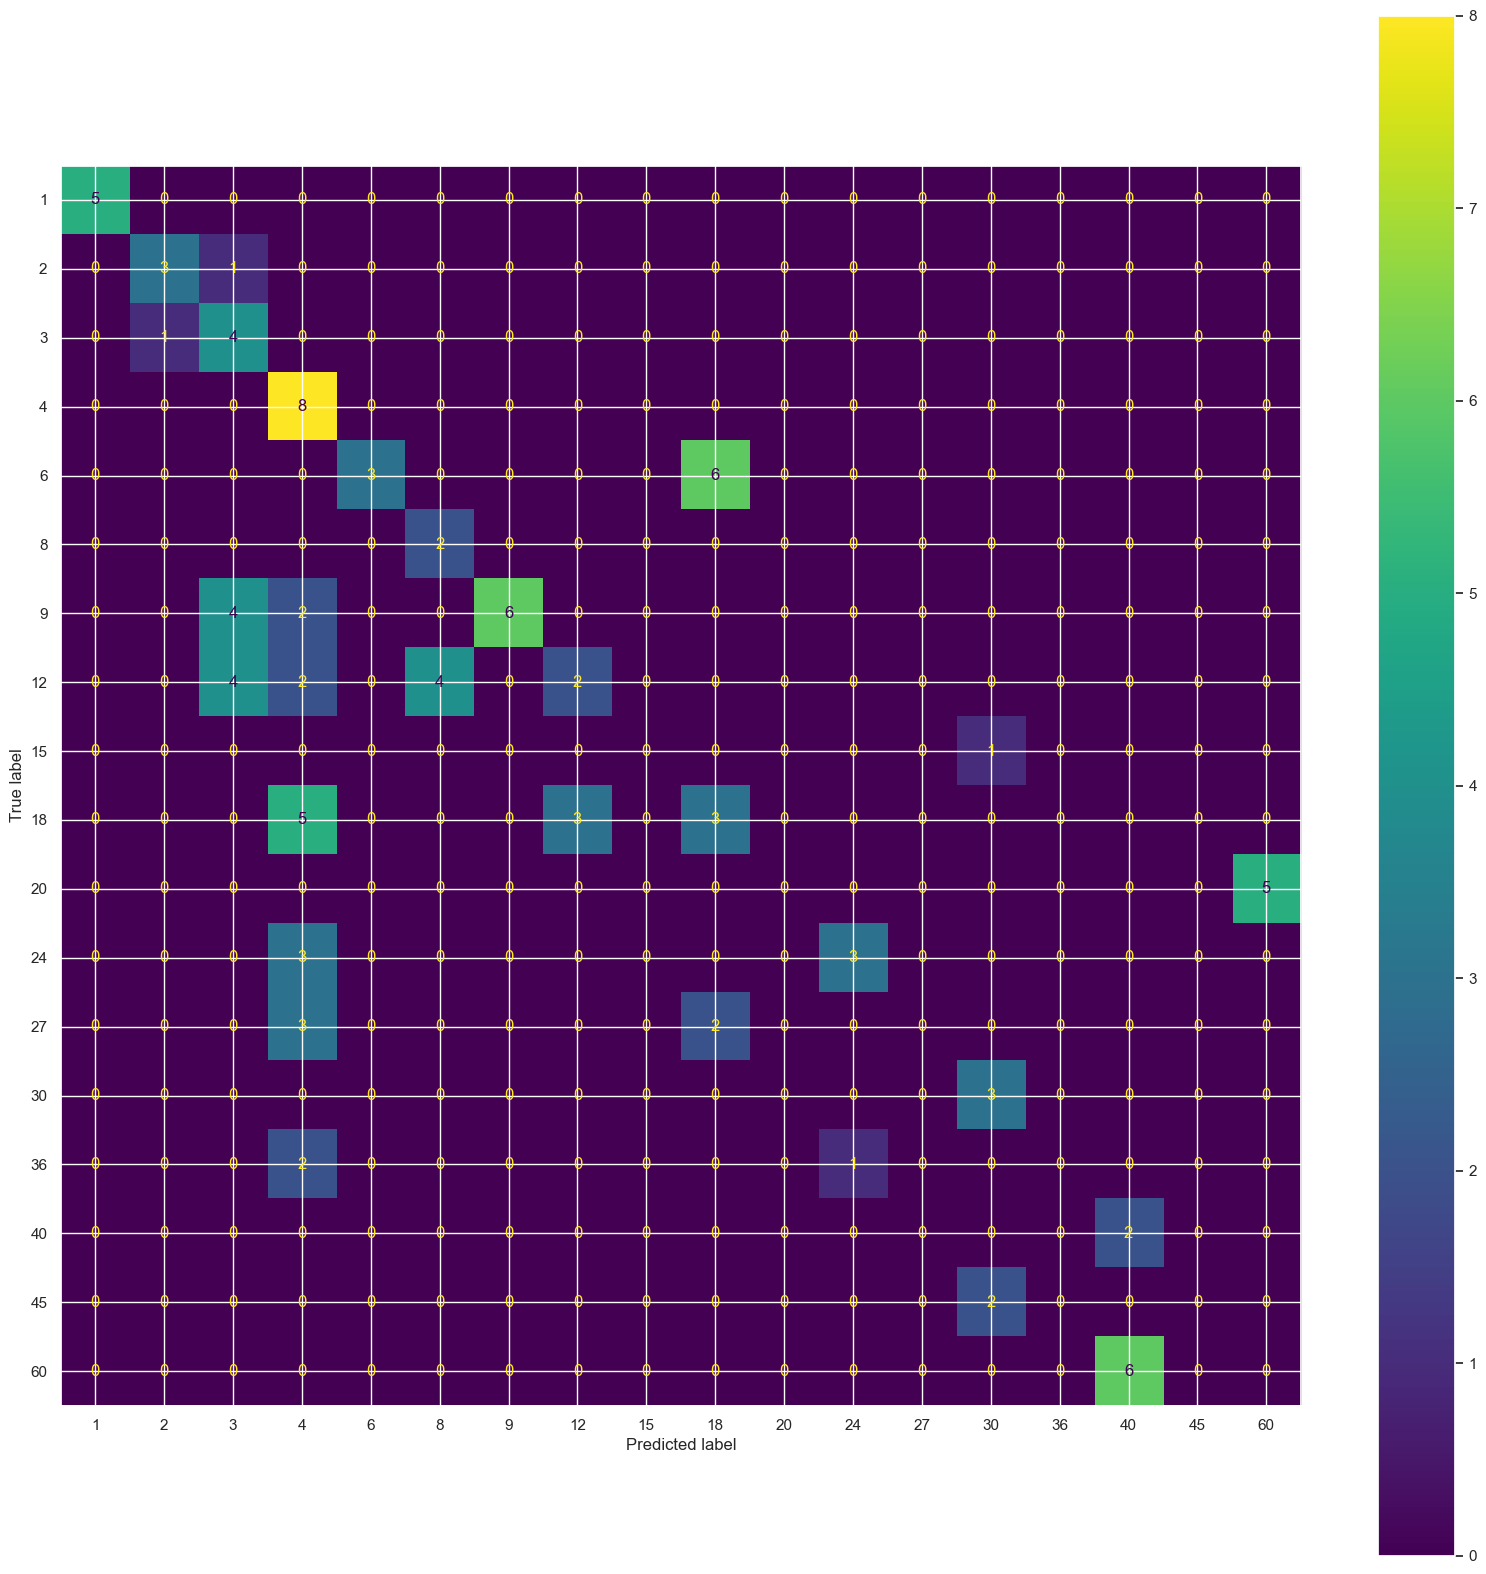

In [47]:
cm = confusion_matrix(y1_test, predicted_mlp_Jn, labels=mlp_Jn.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=mlp_Jn.classes_)
plt.rcParams["figure.figsize"] = (20,20)
disp.plot()
plt.show()

## 4.2 Model Ja

In [17]:
df2.head()

,Ja Description,Ja
3,317,1.0
6,234,2.0
7,233,4.0
8,232,6.0
9,228,3.0


In [18]:
y2=y2.astype('int')

x2_train, x2_test, y2_train, y2_test = train_test_split(x2,y2, train_size=0.8, random_state=42)

x2_train = np.array(x2_train)
x2_test = np.array(x2_test)


scaler = StandardScaler()
scaler.fit(x2_train,y2_train)

StandardScaler(copy=True, with_mean=True, with_std=True)
x2_train = scaler.transform(x2_train)
x2_test = scaler.transform(x2_test)


mlp_Ja = MLPClassifier(hidden_layer_sizes=(60,60,60),max_iter=20000)

mlp_Ja.fit(x2_train,y2_train.values.ravel())


predicted_Ja= mlp_Ja.predict(x2_test)
Accuracy_MLP_Ja = metrics.accuracy_score(predicted_Ja, y2_test)
Precission_MLP_Ja = metrics.precision_score(predicted_Ja, y2_test,average='micro')
Recall_MLP_Ja = metrics.recall_score(predicted_Ja, y2_test,average='micro')
F1_score_MLP_Ja = metrics.recall_score(predicted_Ja, y2_test,average='micro')


print("==========================================================================")
print("1. Results using MLP classifier for Ja")
print("==========================================================================")
print('Accuracy for Ja [MLPClassifier]: %.3f' % (Accuracy_MLP_Ja*100))
print('Precision for Ja [MLPClassifier]: %.3f' % (Precission_MLP_Ja*100))
print('Recall for Ja [MLPClassifier]: %.3f' % (Recall_MLP_Ja*100))
print('F1 Score for Ja [MLPClassifier]: %.3f' % (F1_score_MLP_Ja*100))
print("==========================================================================")



dt_model_Ja = RandomForestClassifier()
rf_clf_Ja = dt_model_Ja.fit(x2_train,y2_train.values.ravel())

# Predict targets on the testing data
test_random_forest_Ja = rf_clf_Ja.predict(x2_test)

Accuracy_RF_Ja = accuracy_score(y2_test, test_random_forest_Ja)
Recall_RF_Ja = recall_score(y2_test, test_random_forest_Ja, average='micro')
Precission_RF_Ja = precision_score(y2_test, test_random_forest_Ja,average='micro')
F1_score_RF_Ja = matthews_corrcoef(y2_test, test_random_forest_Ja)

print("2. Results using Random Forest results for Ja")
print("==========================================================================")
print('Accuracy for Ja [Random Forest]: %.3f' % (Accuracy_RF_Ja*100))
print('Precision for Ja [Random Forest]: %.3f' % (Precission_RF_Ja*100))
print('Recall for Ja [Random Forest]: %.3f' % (Recall_RF_Ja*100))
print('F1 Score for Ja [Random Forest]: %.3f' % (F1_score_RF_Ja*100))
print("==========================================================================")


# all parameters not specified are set to their defaults
model_LR_Ja = LogisticRegression()
model_LR_Ja.fit(x2_train, y2_train.values.ravel())


#Predict Output
predicted_Ja= model_LR_Ja.predict(x2_test) 



print("3. Linear Regression results for Ja")
print("=========================================================================")
#Model Accuracy, how often is the classifier correct?
Accuracy_LR_Ja = metrics.accuracy_score(predicted_Ja, y2_test)
Precission_LR_Ja = metrics.precision_score(predicted_Ja, y2_test,average='micro')
Recall_LR_Ja = metrics.recall_score(predicted_Ja, y2_test,average='micro')
F1_score_LR_Ja = metrics.f1_score(predicted_Ja, y2_test,average='micro')


print('Accuracy for Ja [Logistic Regression]: %.3f' % (Accuracy_LR_Ja*100))
print('Accuracy for Ja [Logistic Regression]: %.3f' % (Precission_LR_Ja*100))
print('Accuracy for Ja [Logistic Regression]: %.3f' % (Recall_LR_Ja*100))
print('Accuracy for Ja [Logistic Regression]: %.3f' % (F1_score_LR_Ja*100))
print("=========================================================================")


ababoost_Ja = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=15),
                           n_estimators=100, 
                           learning_rate=1.0, 
                           algorithm='SAMME.R')
ababoost_Ja = ababoost_Ja.fit(x2_train, y2_train.values.ravel())

# Predict targets on the testing data
test_predictions_Ja = ababoost_Ja.predict(x2_test)
Accuracy_AC_Ja = accuracy_score(y2_test, test_predictions_Ja)
Recall_AC_Ja = recall_score(y2_test, test_predictions_Ja,average='micro')
Precission_AC_Ja = precision_score(y2_test, test_predictions_Ja,average='micro')
F1_score_AC_Ja = matthews_corrcoef(y2_test, test_predictions_Ja)


print("4. AdaBoost Claasifier for Ja")
print("=========================================================================")
print('Accuracy for Ja [AdaBoost Claasifier]: %.3f' % (Accuracy_AC_Ja*100))
print('Precission for Ja [AdaBoost Claasifier]: %.3f' % (Precission_AC_Ja*100))
print('Recall for Ja [AdaBoost Claasifier]: %.3f' % (Recall_AC_Ja*100))
print('F1 Score for Ja [AdaBoost Claasifier]: %.3f' % (F1_score_AC_Ja*100))
print("=========================================================================")



extra_tree_Ja = ExtraTreesClassifier()
extra_tree_Ja = extra_tree_Ja.fit(x2_train, y2_train.values.ravel())

# Predict targets on the testing data
extra_tree_test_predictions_Ja = extra_tree_Ja.predict(x2_test)

Accuracy_ETC_Ja = accuracy_score(y2_test, extra_tree_test_predictions_Ja)
Recall_ETC_Ja = recall_score(y2_test, extra_tree_test_predictions_Ja,average='micro')
Precission_ETC_Ja = precision_score(y2_test, extra_tree_test_predictions_Ja,average='micro')
F1_score_ETC_Ja = matthews_corrcoef(y2_test, extra_tree_test_predictions_Ja)

print("5. Extra Tree Classifier for Ja")
print("=========================================================================")
print('Accuracy for Ja [ExtraTreesClassifier]: %.3f' % (Accuracy_ETC_Ja*100))
print('Precission for Ja [ExtraTreesClassifier]: %.3f' % (Precission_ETC_Ja*100))
print('Recall for Ja [ExtraTreesClassifier]: %.3f' % (Recall_ETC_Ja*100))
print('F1 Score for Ja [ExtraTreesClassifier]: %.3f' % (F1_score_ETC_Ja*100))
print("=========================================================================")


gradient_boosting_Ja = GradientBoostingClassifier()
gradient_boosting_Ja = gradient_boosting_Ja.fit(x2_train, y2_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_predictions_Ja = gradient_boosting_Ja.predict(x2_test) 

Accuracy_GBC_Ja = accuracy_score(y2_test, gradient_boosting_test_predictions_Ja)
Recall_GBC_Ja = recall_score(y2_test, gradient_boosting_test_predictions_Ja,average='micro')
Precission_GBC_Ja = precision_score(y2_test, gradient_boosting_test_predictions_Ja,average='micro')
F1_score_GBC_Ja = matthews_corrcoef(y2_test, gradient_boosting_test_predictions_Ja)


print("6. Gradient Boosting Classifier for Ja")
print("=========================================================================")
print('Accuracy for Ja [Gradient Boosting Classifier]: %.3f' % (Accuracy_GBC_Ja*100))
print('Precission for Ja [Gradient Boosting Classifier: %.3f' % (Precission_GBC_Ja*100))
print('Recall for Ja [Gradient Boosting Classifier]: %.3f' % (Recall_GBC_Ja*100))
print('F1 Score for Ja [Gradient Boosting Classifier]: %.3f' % (F1_score_GBC_Ja*100))
print("=========================================================================")

svm_Ja = SVC(kernel='linear')
svm_Ja = svm_Ja.fit(x2_train, y2_train.values.ravel())


#Predict targets on the testing data
svm_test_predictions_Ja = svm_Ja.predict(x2_test)

# Checking the performance
Accuracy_SVM_Ja = accuracy_score(y2_test, svm_test_predictions_Ja)
Precission_SVM_Ja = recall_score(y2_test, svm_test_predictions_Ja,average='micro')
Recall_SVM_Ja = precision_score(y2_test, svm_test_predictions_Ja,average='micro')
F1_score_SVM_Ja = matthews_corrcoef(y2_test, svm_test_predictions_Ja)


print("7. Support Vector Machine for Ja")
print("=========================================================================")
print('Accuracy for Ja [Support Vector Machine]: %.3f' % (Accuracy_SVM_Ja*100))
print('Precission for Ja [Support Vector Machine]: %.3f' % (Precission_SVM_Ja*100))
print('Recall for Ja [Support Vector Machine]: %.3f' % (Recall_SVM_Ja*100))
print('F1 Score for Ja [Support Vector Machine]: %.3f' % (F1_score_SVM_Ja*100))
print("=========================================================================")


# Calling the libraries
x2, y2 = make_friedman1(n_samples=400, random_state=0, noise=1.0)
gradient_boosting_regressor_Ja = GradientBoostingRegressor(n_estimators=400, 
                                                            learning_rate=0.2, 
                                                            max_depth=10, 
                                                            random_state=0,
                                                            loss='squared_error')

gradient_boosting_regressor_Ja = gradient_boosting_regressor_Ja.fit(x2_train,y2_train.values.ravel())


# Predict targets on the testing data
gradient_boosting_test_regressor_Ja = gradient_boosting_regressor_Ja.predict(x2_test)


# Calculate mean squared error (MSE)
GBR_mse_Ja = mean_squared_error(y2_test, gradient_boosting_test_regressor_Ja)
GBR_mae_Ja = mean_absolute_error(y2_test, gradient_boosting_test_regressor_Ja)
GBR_rmse_Ja = mean_squared_error(y2_test, gradient_boosting_test_regressor_Ja,squared=False)
GBR_r2_Ja = r2_score(y2_test, gradient_boosting_test_regressor_Ja)
GBR_crv_Ja = cross_val_score(gradient_boosting_regressor_Ja,y2_test, x2_test,cv=10)


print("==========================================================================")
print("8. Results using GRADIENT BOOSTING REGRESSOR for Ja")
print("==========================================================================")
print("The Mean Square Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_mse_Ja).round(2))
print("The Mean Absolute Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_mae_Ja).round(2))
print("The Root Mean Square Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_rmse_Ja).round(2))
print("R^2 Score[GRADIENT BOOSTING REGRESSOR] is :", (GBR_r2_Ja).round(2))
print("Cross Validation Score [GRADIENT BOOSTING REGRESSOR] is :", (GBR_crv_Ja).round(2))

# Calling the libraries
Random_Forest_regresor_Ja = RandomForestRegressor(n_estimators=200, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)

Random_Forest_regresor_Ja = Random_Forest_regresor_Ja.fit(x2_train, y2_train.values.ravel())

# Making predictions on the testing data
random_forest_test_regressor_Ja = Random_Forest_regresor_Ja.predict(x2_test)

# y5_train_pred = RFR_RQD.predict(x5_train)
# y5_test_pred = RFR_RQD.predict(x5_test)

# Calculate mean squared error (MSE)
RFR_mse_Ja = mean_squared_error(y2_test, random_forest_test_regressor_Ja)
RFR_mae_Ja = mean_absolute_error(y2_test, random_forest_test_regressor_Ja)
RFR_rmse_Ja = mean_squared_error(y2_test, random_forest_test_regressor_Ja,squared=False)
RFR_r2_Ja = r2_score(y2_test, random_forest_test_regressor_Ja)
RFR_crv_Ja = cross_val_score(Random_Forest_regresor_Ja,y2_test, x2_test,cv=10)


print("==========================================================================")
print("9. Results using RANDOM FOREST REGRESSOR for Ja")
print("==========================================================================")
print("The Mean Square Error[RANDOM FOREST REGRESSOR] is:", (RFR_mse_Ja).round(2))
print("The Mean Absolute Error[RANDOM FOREST REGRESSOR] is:", (RFR_mae_Ja).round(2))
print("The Root Mean Square Error[RANDOM FOREST REGRESSOR] is:", (RFR_rmse_Ja).round(2))
print("R^2 Score [RANDOM FOREST REGRESSOR] is :", (RFR_r2_Ja).round(2))
print("Cross Validation Score [RANDOM FOREST REGRESSOR] is :", (RFR_crv_Ja).round(2))


# Calling the libraries
knn_regressor_Ja = KNeighborsRegressor(n_neighbors=5)
knn_regressor_Ja = knn_regressor_Ja.fit(x2_train, y2_train.values.ravel())


# Making predictions on the testing data
Knn_regressor_test_Ja = knn_regressor_Ja.predict(x2_test)

# Calculate mean squared error (MSE)
KNNR_mse_Ja = mean_squared_error(y2_test, Knn_regressor_test_Ja)
KNNR_mae_Ja = mean_absolute_error(y2_test, Knn_regressor_test_Ja)
KNNR_rmse_Ja = mean_squared_error(y2_test, Knn_regressor_test_Ja,squared=False)
KNNR_r2_Ja = r2_score(y2_test, Knn_regressor_test_Ja)
KNNR_crv_Ja = cross_val_score(knn_regressor_Ja,y2_test, x2_test,cv=10)


print("==========================================================================")
print("10. Results using K NEAREST NEIGHBOUR REGRESSOR for Ja")
print("==========================================================================")
print("The Mean Square Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_mse_Ja).round(2))
print("The Mean Absolute Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_mae_Ja).round(2))
print("The Root Mean Square Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_rmse_Ja).round(2))
print("R^2 Score [K NEAREST NEIGHBOUR REGRESSOR] is :", (KNNR_r2_Ja).round(2))
print("Cross Validation Score [K NEAREST NEIGHBOUR REGRESSOR] is :", (KNNR_crv_Ja).round(2))


#Calling the libraries
Elastic_Regressor_Ja = ElasticNet(random_state=0)
Elastic_Regressor_Ja = Elastic_Regressor_Ja.fit(x2_train, y2_train.values.ravel())

# Making predictions on the testing data
Elastic_Regressor_test_Ja = Elastic_Regressor_Ja.predict(x2_test)


# Calculate mean squared error (MSE)
ER_mse_Ja = mean_squared_error(y2_test, Elastic_Regressor_test_Ja)
ER_mae_Ja = mean_absolute_error(y2_test, Elastic_Regressor_test_Ja)
ER_rmse_Ja = mean_squared_error(y2_test, Elastic_Regressor_test_Ja,squared=False)
ER_r2_Ja = r2_score(y2_test, Elastic_Regressor_test_Ja)
ER_crv_Ja = cross_val_score(Elastic_Regressor_Ja,y2_test, x2_test,cv=10)


print("==========================================================================")
print("11. Results using ELASTIC REGRESSOR for Ja")
print("==========================================================================")
print("The Mean Square Error[ELASTIC REGRESSOR] is:", (ER_mse_Ja).round(2))
print("The Mean Absolute Error[ELASTIC REGRESSOR] is:", (ER_mae_Ja).round(2))
print("The Root Mean Square Error[ELASTIC REGRESSOR] is:", (ER_rmse_Ja).round(2))
print("R^2 Score [ELASTIC REGRESSOR] is :", (ER_r2_Ja).round(2))
print("Cross Validation Score [ELASTIC REGRESSOR] is :", (ER_crv_Ja).round(2))

Decision_tree_regressor_Ja = DecisionTreeRegressor(random_state=1)
Decision_tree_regressor_Ja = Decision_tree_regressor_Ja.fit(x2_train, y2_train.values.ravel()) 

# Making predictions on the testing data
DT_Regressor_test_Ja = Decision_tree_regressor_Jn.predict(x2_test)

# Calculate mean squared error (MSE)
DT_mse_Ja = mean_squared_error(y2_test, DT_Regressor_test_Ja)
DT_mae_Ja = mean_absolute_error(y2_test, DT_Regressor_test_Ja)
DT_rmse_Ja = mean_squared_error(y2_test, DT_Regressor_test_Ja,squared=False)
DT_r2_Ja = r2_score(y2_test, DT_Regressor_test_Ja)
DT_crv_Ja = cross_val_score(Decision_tree_regressor_Ja,y2_test, x2_test,cv=10)


print("==========================================================================")
print("12. Results using DECISION TREE REGRESSOR for Ja")
print("==========================================================================")
print("The Mean Square Error[DECISION TREE REGRESSOR] is:", (DT_mse_Ja).round(2))
print("The Mean Absolute Error[DECISION TREE REGRESSOR] is:", (DT_mae_Ja).round(2))
print("The Root Mean Square Error[DECISION TREE REGRESSOR] is:", (DT_rmse_Ja).round(2))
print("R^2 Score [DECISION TREE REGRESSOR] is :", (DT_r2_Ja).round(2))
print("Cross Validation Score [DECISION TREE REGRESSOR] is :", (DT_crv_Ja).round(2))



1. Results using MLP classifier for Ja
Accuracy for Ja [MLPClassifier]: 28.713
Precision for Ja [MLPClassifier]: 28.713
Recall for Ja [MLPClassifier]: 28.713
F1 Score for Ja [MLPClassifier]: 28.713
2. Results using Random Forest results for Ja
Accuracy for Ja [Random Forest]: 100.000
Precision for Ja [Random Forest]: 100.000
Recall for Ja [Random Forest]: 100.000
F1 Score for Ja [Random Forest]: 100.000
3. Linear Regression results for Ja
Accuracy for Ja [Logistic Regression]: 13.861
Accuracy for Ja [Logistic Regression]: 13.861
Accuracy for Ja [Logistic Regression]: 13.861
Accuracy for Ja [Logistic Regression]: 13.861
4. AdaBoost Claasifier for Ja
Accuracy for Ja [AdaBoost Claasifier]: 100.000
Precission for Ja [AdaBoost Claasifier]: 100.000
Recall for Ja [AdaBoost Claasifier]: 100.000
F1 Score for Ja [AdaBoost Claasifier]: 100.000
5. Extra Tree Classifier for Ja
Accuracy for Ja [ExtraTreesClassifier]: 100.000
Precission for Ja [ExtraTreesClassifier]: 100.000
Recall for Ja [ExtraTrees

c:\Users\RIJRAJ\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\RIJRAJ\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\RIJRAJ\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\RIJRAJ\anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example 

8. Results using GRADIENT BOOSTING REGRESSOR for Ja
The Mean Square Error[GRADIENT BOOSTING REGRESSOR] is: 0.0
The Mean Absolute Error[GRADIENT BOOSTING REGRESSOR] is: 0.0
The Root Mean Square Error[GRADIENT BOOSTING REGRESSOR] is: 0.0
R^2 Score[GRADIENT BOOSTING REGRESSOR] is : 1.0
Cross Validation Score [GRADIENT BOOSTING REGRESSOR] is : [ 0.11  0.54  0.54 -0.11  0.85  0.68  0.37  0.39  0.    0.38]


c:\Users\RIJRAJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\RIJRAJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\RIJRAJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
c:\Users\RIJRAJ\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:686: DataConversionWarning: A column-vector 

9. Results using RANDOM FOREST REGRESSOR for Ja
The Mean Square Error[RANDOM FOREST REGRESSOR] is: 0.09
The Mean Absolute Error[RANDOM FOREST REGRESSOR] is: 0.11
The Root Mean Square Error[RANDOM FOREST REGRESSOR] is: 0.3
R^2 Score [RANDOM FOREST REGRESSOR] is : 1.0
Cross Validation Score [RANDOM FOREST REGRESSOR] is : [ 0.11  0.52  0.53 -0.11  0.76  0.65  0.36  0.39  0.07  0.38]
10. Results using K NEAREST NEIGHBOUR REGRESSOR for Ja
The Mean Square Error[K NEAREST NEIGHBOUR REGRESSOR] is: 4.95
The Mean Absolute Error[K NEAREST NEIGHBOUR REGRESSOR] is: 0.68
The Root Mean Square Error[K NEAREST NEIGHBOUR REGRESSOR] is: 2.22
R^2 Score [K NEAREST NEIGHBOUR REGRESSOR] is : 0.98
Cross Validation Score [K NEAREST NEIGHBOUR REGRESSOR] is : [ 0.04  0.32  0.24 -0.19  0.38  0.32  0.24  0.33  0.42  0.27]
11. Results using ELASTIC REGRESSOR for Ja
The Mean Square Error[ELASTIC REGRESSOR] is: 218.17
The Mean Absolute Error[ELASTIC REGRESSOR] is: 11.0
The Root Mean Square Error[ELASTIC REGRESSOR] is

In [19]:
pickle.dump(extra_tree_Ja, open('extra_Ja.pkl','wb'))

extra_tree_Ja= pickle.load(open('extra_Ja.pkl','rb'))

## 4.3 Model Jr

In [20]:
df3.head()

,Jr Description,Jr
3,44,3.0
6,40,2.0
7,0,1.5
8,42,0.5
9,21,1.5


In [21]:
y3=y3.astype('int')

x3_train, x3_test, y3_train, y3_test = train_test_split(x3,y3, test_size=0.2, random_state=42)

x3_train = np.array(x3_train)
x3_test = np.array(x3_test)



scaler = StandardScaler()
scaler.fit(x3_train,y3_train)

StandardScaler(copy=True, with_mean=True, with_std=True)
x3_train = scaler.transform(x3_train)
x3_test = scaler.transform(x3_test)


mlp_Jr = MLPClassifier(hidden_layer_sizes=(60,60,60),max_iter=20000)

mlp_Jr.fit(x3_train,y3_train.values.ravel())


predicted_Jr= mlp_Jr.predict(x3_test)
Accuracy_MLP_Jr = metrics.accuracy_score(predicted_Jr, y3_test)
Precission_MLP_Jr = metrics.precision_score(predicted_Jr, y3_test,average='micro')
Recall_MLP_Jr = metrics.recall_score(predicted_Jr, y3_test,average='micro')
F1_score_MLP_Jr = metrics.recall_score(predicted_Jr, y3_test,average='micro')


print("==========================================================================")
print("1.Results using MLP classifier for Jr")
print("==========================================================================")
print('Accuracy for Jr [MLPClassifier]: %.3f' % (Accuracy_MLP_Jr*100))
print('Precision for Jr [MLPClassifier]: %.3f' % (Precission_MLP_Jr*100))
print('Recall for Jr [MLPClassifier]: %.3f' % (Recall_MLP_Jr*100))
print('F1 Score for Jr [MLPClassifier]: %.3f' % (F1_score_MLP_Jr*100))
print("==========================================================================")



dt_model_Jr = RandomForestClassifier()
rf_clf_Jr = dt_model_Jr.fit(x3_train,y3_train.values.ravel())

# Predict targets on the testing data
test_random_forest_Jr = rf_clf_Jr.predict(x3_test)

Accuracy_RF_Jr = accuracy_score(y3_test, test_random_forest_Jr)
Recall_RF_Jr = recall_score(y3_test, test_random_forest_Jr, average='micro')
Precission_RF_Jr = precision_score(y3_test, test_random_forest_Jr,average='micro')
F1_score_RF_Jr = matthews_corrcoef(y3_test, test_random_forest_Jr)

print("2. Results using Random Forest for Jr")
print("==========================================================================")
print('Accuracy for Jr [Random Forest]: %.3f' % (Accuracy_RF_Jr*100))
print('Precision for Jr [Random Forest]: %.3f' % (Precission_RF_Jr*100))
print('Recall for Jr [Random Forest]: %.3f' % (Recall_RF_Jr*100))
print('F1 Score for Jr [Random Forest]: %.3f' % (F1_score_RF_Jr*100))
print("==========================================================================")


# all parameters not specified are set to their defaults
model_LR_Jr = LogisticRegression()
model_LR_Jr.fit(x3_train, y3_train.values.ravel())


#Predict Output
predicted_Jr= model_LR_Jr.predict(x3_test) 



print("3. Linear Regression results for Jr")
print("==========================================================================")
#Model Accuracy, how often is the classifier correct?
Accuracy_LR_Jr = metrics.accuracy_score(predicted_Jr, y3_test)
Precission_LR_Jr = metrics.precision_score(predicted_Jr, y3_test,average='micro')
Recall_LR_Jr = metrics.recall_score(predicted_Jr, y3_test,average='micro')
F1_score_LR_Jr = metrics.f1_score(predicted_Jr, y3_test,average='micro')


print('Accuracy for Ja [Logistic Regression]: %.3f' % (Accuracy_LR_Jr*100))
print('Accuracy for Ja [Logistic Regression]: %.3f' % (Precission_LR_Jr*100))
print('Accuracy for Ja [Logistic Regression]: %.3f' % (Recall_LR_Jr*100))
print('Accuracy for Ja [Logistic Regression]: %.3f' % (F1_score_LR_Jr*100))
print("=========================================================================")


ababoost_Jr = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=15),
                           n_estimators=100, 
                           learning_rate=1.0, 
                           algorithm='SAMME.R')
ababoost_Jr = ababoost_Jr.fit(x3_train, y3_train.values.ravel())

# Predict targets on the testing data
test_predictions_Jr = ababoost_Jr.predict(x3_test)
Accuracy_AC_Jr = accuracy_score(y3_test, test_predictions_Jr)
Recall_AC_Jr = recall_score(y3_test, test_predictions_Jr,average='micro')
Precission_AC_Jr = precision_score(y3_test, test_predictions_Jr,average='micro')
F1_score_AC_Jr = matthews_corrcoef(y3_test, test_predictions_Jr)


print("4. AdaBoost Claasifier for Jr")
print("=========================================================================")
print('Accuracy for Jr [AdaBoost Claasifier]: %.3f' % (Accuracy_AC_Jr*100))
print('Precission for Jr [AdaBoost Claasifier]: %.3f' % (Precission_AC_Jr*100))
print('Recall for Jr [AdaBoost Claasifier]: %.3f' % (Recall_AC_Jr*100))
print('F1 Score for Jr [AdaBoost Claasifier]: %.3f' % (F1_score_AC_Jr*100))
print("=========================================================================")


extra_tree_Jr = ExtraTreesClassifier()
extra_tree_Jr = extra_tree_Jr.fit(x3_train, y3_train.values.ravel())

# Predict targets on the testing data
extra_tree_test_predictions_Jr = extra_tree_Jr.predict(x3_test)

Accuracy_ETC_Jr = accuracy_score(y3_test, extra_tree_test_predictions_Jr)
Recall_ETC_Jr = recall_score(y3_test, extra_tree_test_predictions_Jr,average='micro')
Precission_ETC_Jr = precision_score(y3_test, extra_tree_test_predictions_Jr,average='micro')
F1_score_ETC_Jr = matthews_corrcoef(y3_test, extra_tree_test_predictions_Jr)

print("5. Extra Tree Classifier for Jr")
print("=========================================================================")
print('Accuracy for Jr [ExtraTreesClassifier]: %.3f' % (Accuracy_ETC_Jr*100))
print('Precission for Jr [ExtraTreesClassifier]: %.3f' % (Precission_ETC_Jr*100))
print('Recall for Jr [ExtraTreesClassifier]: %.3f' % (Recall_ETC_Jr*100))
print('F1 Score for Jr [ExtraTreesClassifier]: %.3f' % (F1_score_ETC_Jr*100))
print("=========================================================================")


gradient_boosting_Jr = GradientBoostingClassifier()
gradient_boosting_Jr = gradient_boosting_Jr.fit(x3_train, y3_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_predictions_Jr = gradient_boosting_Jr.predict(x3_test) 

Accuracy_GBC_Jr = accuracy_score(y3_test, gradient_boosting_test_predictions_Jr)
Recall_GBC_Jr = recall_score(y3_test, gradient_boosting_test_predictions_Jr,average='micro')
Precission_GBC_Jr = precision_score(y3_test, gradient_boosting_test_predictions_Jr,average='micro')
F1_score_GBC_Jr = matthews_corrcoef(y3_test, gradient_boosting_test_predictions_Jr)


print("6. Gradient Boosting Classifier for Jr")
print("=========================================================================")
print('Accuracy for Jr [Gradient Boosting Classifier]: %.3f' % (Accuracy_GBC_Jr*100))
print('Precission for Jr [Gradient Boosting Classifier: %.3f' % (Precission_GBC_Jr*100))
print('Recall for Jr [Gradient Boosting Classifier]: %.3f' % (Recall_GBC_Jr*100))
print('F1 Score for Jr [Gradient Boosting Classifier]: %.3f' % (F1_score_GBC_Jr*100))
print("=========================================================================")

svm_Jr = SVC(kernel='linear')
svm_Jr = svm_Jr.fit(x3_train, y3_train.values.ravel())

#Predict targets on the testing data
svm_test_predictions_Jr = svm_Jr.predict(x3_test)

# Checking the performance
Accuracy_SVM_Jr = accuracy_score(y3_test, svm_test_predictions_Jr)
Precission_SVM_Jr = recall_score(y3_test, svm_test_predictions_Jr,average='micro')
Recall_SVM_Jr = precision_score(y3_test, svm_test_predictions_Jr,average='micro')
F1_score_SVM_Jr = matthews_corrcoef(y3_test, svm_test_predictions_Jr)


print("7. Support Vector Machine for Jr")
print("=========================================================================")
print('Accuracy for Jr [Support Vector Machine]: %.3f' % (Accuracy_SVM_Jr*100))
print('Precission for Jr [Support Vector Machine]: %.3f' % (Precission_SVM_Jr*100))
print('Recall for Jr [Support Vector Machine]: %.3f' % (Recall_SVM_Jr*100))
print('F1 Score for Jr [Support Vector Machine]: %.3f' % (F1_score_SVM_Jr*100))
print("=========================================================================")



# Calling the libraries
x3, y3 = make_friedman1(n_samples=400, random_state=0, noise=1.0)
gradient_boosting_regressor_Jr = GradientBoostingRegressor(n_estimators=400, 
                                                            learning_rate=0.2, 
                                                            max_depth=10, 
                                                            random_state=0,
                                                            loss='squared_error')

gradient_boosting_regressor_Jr = gradient_boosting_regressor_Jr.fit(x3_train,y3_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_regressor_Jr = gradient_boosting_regressor_Jr.predict(x3_test)


# Calculate mean squared error (MSE)
GBR_mse_Jr = mean_squared_error(y3_test, gradient_boosting_test_regressor_Jr)
GBR_mae_Jr = mean_absolute_error(y3_test, gradient_boosting_test_regressor_Jr)
GBR_rmse_Jr = mean_squared_error(y3_test, gradient_boosting_test_regressor_Jr,squared=False)
GBR_r2_Jr = r2_score(y3_test, gradient_boosting_test_regressor_Jr)


print("==========================================================================")
print("8. Results using GRADIENT BOOSTING REGRESSOR for Jr")
print("==========================================================================")
print("The Mean Square Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_mse_Jr).round(2))
print("The Mean Absolute Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_mae_Jr).round(2))
print("The Root Mean Square Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_rmse_Jr).round(2))
print("R^2 Score[GRADIENT BOOSTING REGRESSOR] is :", (GBR_r2_Jr).round(2))

# Calling the libraries
Random_Forest_regresor_Jr = RandomForestRegressor(n_estimators=100, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)

Random_Forest_regresor_Jr = Random_Forest_regresor_Jr.fit(x3_train, y3_train.values.ravel())

# Making predictions on the testing data
random_forest_test_regressor_Jr = Random_Forest_regresor_Jr.predict(x3_test)

# y5_train_pred = RFR_RQD.predict(x5_train)
# y5_test_pred = RFR_RQD.predict(x5_test)

# Calculate mean squared error (MSE)
RFR_mse_Jr = mean_squared_error(y3_test, random_forest_test_regressor_Jr)
RFR_mae_Jr = mean_absolute_error(y3_test, random_forest_test_regressor_Jr)
RFR_rmse_Jr = mean_squared_error(y3_test, random_forest_test_regressor_Jr,squared=False)
RFR_r2_Jr = r2_score(y3_test, random_forest_test_regressor_Jr)


print("==========================================================================")
print("9. Results using RANDOM FOREST REGRESSOR for Jr")
print("==========================================================================")
print("The Mean Square Error[RANDOM FOREST REGRESSOR] is:", (RFR_mse_Jr).round(2))
print("The Mean Absolute Error[RANDOM FOREST REGRESSOR] is:", (RFR_mae_Jr).round(2))
print("The Root Mean Square Error[RANDOM FOREST REGRESSOR] is:", (RFR_rmse_Jr).round(2))
print("R^2 Score [RANDOM FOREST REGRESSOR] is :", (RFR_r2_Jr).round(2))


# Calling the libraries
knn_regressor_Jr = KNeighborsRegressor(n_neighbors=5)
knn_regressor_Jr = knn_regressor_Jr.fit(x3_train, y3_train)


# Making predictions on the testing data
Knn_regressor_test_Jr = knn_regressor_Jr.predict(x3_test)

# Calculate mean squared error (MSE)
KNNR_mse_Jr = mean_squared_error(y3_test, Knn_regressor_test_Jr)
KNNR_mae_Jr = mean_absolute_error(y3_test, Knn_regressor_test_Jr)
KNNR_rmse_Jr = mean_squared_error(y3_test, Knn_regressor_test_Jr,squared=False)
KNNR_r2_Jr = r2_score(y3_test, Knn_regressor_test_Jr)


print("==========================================================================")
print("10. Results using K NEAREST NEIGHBOUR REGRESSOR for Jr")
print("==========================================================================")
print("The Mean Square Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_mse_Jr).round(2))
print("The Mean Absolute Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_mae_Jr).round(2))
print("The Root Mean Square Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_rmse_Jr).round(2))
print("R^2 Score [K NEAREST NEIGHBOUR REGRESSOR] is :", (KNNR_r2_Jr).round(2))


#Calling the libraries
Elastic_Regressor_Jr = ElasticNet(random_state=0)
Elastic_Regressor_Jr = Elastic_Regressor_Jr.fit(x3_train, y3_train)

# Making predictions on the testing data
Elastic_Regressor_test_Jr = Elastic_Regressor_Jr.predict(x3_test)


# Calculate mean squared error (MSE)
ER_mse_Jr = mean_squared_error(y3_test, Elastic_Regressor_test_Jr)
ER_mae_Jr = mean_absolute_error(y3_test, Elastic_Regressor_test_Jr)
ER_rmse_Jr = mean_squared_error(y3_test, Elastic_Regressor_test_Jr,squared=False)
ER_r2_Jr = r2_score(y3_test, Elastic_Regressor_test_Jr)


print("==========================================================================")
print("11. Results using ELASTIC REGRESSOR for Jr")
print("==========================================================================")
print("The Mean Square Error[ELASTIC REGRESSOR] is:", (ER_mse_Jr).round(2))
print("The Mean Absolute Error[ELASTIC REGRESSOR] is:", (ER_mae_Jr).round(2))
print("The Root Mean Square Error[ELASTIC REGRESSOR] is:", (ER_rmse_Jr).round(2))
print("R^2 Score [ELASTIC REGRESSOR] is :", (ER_r2_Jr).round(2))

Decision_tree_regressor_Jr = DecisionTreeRegressor(random_state=1)
Decision_tree_regressor_Jr = Decision_tree_regressor_Jr.fit(x3_train, y3_train.values.ravel()) 

# Making predictions on the testing data
DT_Regressor_test_Jr = Decision_tree_regressor_Jr.predict(x3_test)

# Calculate mean squared error (MSE)
DT_mse_Jr = mean_squared_error(y3_test, DT_Regressor_test_Jr)
DT_mae_Jr = mean_absolute_error(y3_test, DT_Regressor_test_Jr)
DT_rmse_Jr = mean_squared_error(y3_test, DT_Regressor_test_Jr,squared=False)
DT_r2_Jr = r2_score(y3_test, DT_Regressor_test_Jr)
DT_crv_Jr = cross_val_score(Decision_tree_regressor_Jr,y3_test, x3_test,cv=10)


print("==========================================================================")
print("12. Results using DECISION TREE REGRESSOR for Jr")
print("==========================================================================")
print("The Mean Square Error[DECISION TREE REGRESSOR] is:", (DT_mse_Ja).round(2))
print("The Mean Absolute Error[DECISION TREE REGRESSOR] is:", (DT_mae_Ja).round(2))
print("The Root Mean Square Error[DECISION TREE REGRESSOR] is:", (DT_rmse_Ja).round(2))
print("R^2 Score [DECISION TREE REGRESSOR] is :", (DT_r2_Ja).round(2))
print("Cross Validation Score [DECISION TREE REGRESSOR] is :", (DT_crv_Ja).round(2))

1.Results using MLP classifier for Jr
Accuracy for Jr [MLPClassifier]: 43.564
Precision for Jr [MLPClassifier]: 43.564
Recall for Jr [MLPClassifier]: 43.564
F1 Score for Jr [MLPClassifier]: 43.564
2. Results using Random Forest for Jr
Accuracy for Jr [Random Forest]: 98.020
Precision for Jr [Random Forest]: 98.020
Recall for Jr [Random Forest]: 98.020
F1 Score for Jr [Random Forest]: 97.448
3. Linear Regression results for Jr
Accuracy for Ja [Logistic Regression]: 36.634
Accuracy for Ja [Logistic Regression]: 36.634
Accuracy for Ja [Logistic Regression]: 36.634
Accuracy for Ja [Logistic Regression]: 36.634
4. AdaBoost Claasifier for Jr
Accuracy for Jr [AdaBoost Claasifier]: 98.020
Precission for Jr [AdaBoost Claasifier]: 98.020
Recall for Jr [AdaBoost Claasifier]: 98.020
F1 Score for Jr [AdaBoost Claasifier]: 97.448
5. Extra Tree Classifier for Jr
Accuracy for Jr [ExtraTreesClassifier]: 98.020
Precission for Jr [ExtraTreesClassifier]: 98.020
Recall for Jr [ExtraTreesClassifier]: 98.020

## 4.4 Model for Jw

In [22]:
df4.head()

,Jw Description,Jw
3,343,0.33
6,344,0.40
7,342,0.20
8,341,0.10
9,0,1.00


In [23]:
y4=y4.astype('int')

x4_train, x4_test, y4_train, y4_test = train_test_split(x4,y4, test_size=0.2, random_state=42)

x4_train = np.array(x4_train)
x4_test = np.array(x4_test)


scaler = StandardScaler()
scaler.fit(x4_train,y4_train)

StandardScaler(copy=True, with_mean=True, with_std=True)
x4_train = scaler.transform(x4_train)
x4_test = scaler.transform(x4_test)


mlp_Jw = MLPClassifier(hidden_layer_sizes=(60,60,60),max_iter=20000)

mlp_Jw.fit(x4_train,y4_train.values.ravel())


predicted_Jw= mlp_Jr.predict(x4_test)
Accuracy_MLP_Jw = metrics.accuracy_score(predicted_Jw, y4_test)
Precission_MLP_Jw = metrics.precision_score(predicted_Jw, y4_test,average='micro')
Recall_MLP_Jw = metrics.recall_score(predicted_Jw, y4_test,average='micro')
F1_score_MLP_Jw = metrics.recall_score(predicted_Jw, y4_test,average='micro')


print("==========================================================================")
print("1. Results using MLP classifier for Jw")
print("==========================================================================")
print('Accuracy for Jw [MLPClassifier]: %.3f' % (Accuracy_MLP_Jw*100))
print('Precision for Jw [MLPClassifier]: %.3f' % (Precission_MLP_Jw*100))
print('Recall for Jw [MLPClassifier]: %.3f' % (Recall_MLP_Jw*100))
print('F1 Score for Jw [MLPClassifier]: %.3f' % (F1_score_MLP_Jw*100))
print("==========================================================================")



dt_model_Jw = RandomForestClassifier()
rf_clf_Jw = dt_model_Jw.fit(x4_train,y4_train.values.ravel())

# Predict targets on the testing data
test_random_forest_Jw = rf_clf_Jw.predict(x4_test)

Accuracy_RF_Jw = accuracy_score(y4_test, test_random_forest_Jw)
Recall_RF_Jw = recall_score(y4_test, test_random_forest_Jw, average='micro')
Precission_RF_Jw = precision_score(y4_test, test_random_forest_Jw,average='micro')
F1_score_RF_Jw = matthews_corrcoef(y4_test, test_random_forest_Jw)

print("2. Results using Random Forest for Jw")
print("==========================================================================")
print('Accuracy for Jw [Random Forest]: %.3f' % (Accuracy_RF_Jw*100))
print('Precision for Jw [Random Forest]: %.3f' % (Precission_RF_Jw*100))
print('Recall for Jw [Random Forest]: %.3f' % (Recall_RF_Jw*100))
print('F1 Score for Jw [Random Forest]: %.3f' % (F1_score_RF_Jw*100))
print("==========================================================================")


# all parameters not specified are set to their defaults
model_LR_Jw = LogisticRegression()
model_LR_Jw.fit(x4_train, y4_train.values.ravel())


#Predict Output
predicted_Jw= model_LR_Jw.predict(x4_test) 



print("3. Linear Regression results for Jw")
print("==========================================================================")
#Model Accuracy, how often is the classifier correct?
Accuracy_LR_Jw = metrics.accuracy_score(predicted_Jw, y4_test)
Precission_LR_Jw = metrics.precision_score(predicted_Jw, y4_test,average='micro')
Recall_LR_Jw = metrics.recall_score(predicted_Jw, y4_test,average='micro')
F1_score_LR_Jw = metrics.f1_score(predicted_Jw, y4_test,average='micro')


print('Accuracy for Jw [Logistic Regression]: %.3f' % (Accuracy_LR_Jw*100))
print('Accuracy for Jw [Logistic Regression]: %.3f' % (Precission_LR_Jw*100))
print('Accuracy for Jw [Logistic Regression]: %.3f' % (Recall_LR_Jw*100))
print('Accuracy for Jw [Logistic Regression]: %.3f' % (F1_score_LR_Jw*100))
print("=========================================================================")


ababoost_Jw = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=15),
                           n_estimators=100, 
                           learning_rate=1.0, 
                           algorithm='SAMME.R')
ababoost_Jw = ababoost_Jw.fit(x4_train, y4_train.values.ravel())

# Predict targets on the testing data
test_predictions_Jw = ababoost_Jw.predict(x4_test)
Accuracy_AC_Jw = accuracy_score(y4_test, test_predictions_Jw)
Recall_AC_Jw = recall_score(y4_test, test_predictions_Jw,average='micro')
Precission_AC_Jw = precision_score(y4_test, test_predictions_Jw,average='micro')
F1_score_AC_Jw = matthews_corrcoef(y4_test, test_predictions_Jw)


print("4. AdaBoost Claasifier for Jw")
print("=========================================================================")
print('Accuracy for Jw [AdaBoost Claasifier]: %.3f' % (Accuracy_AC_Jw*100))
print('Precission for Jw [AdaBoost Claasifier]: %.3f' % (Precission_AC_Jw*100))
print('Recall for Jw [AdaBoost Claasifier]: %.3f' % (Recall_AC_Jw*100))
print('F1 Score for Jw [AdaBoost Claasifier]: %.3f' % (F1_score_AC_Jw*100))
print("=========================================================================")


extra_tree_Jw = ExtraTreesClassifier()
extra_tree_Jw = extra_tree_Jw.fit(x4_train, y4_train.values.ravel())

# Predict targets on the testing data
extra_tree_test_predictions_Jw = extra_tree_Jw.predict(x4_test)

Accuracy_ETC_Jw = accuracy_score(y4_test, extra_tree_test_predictions_Jw)
Recall_ETC_Jw = recall_score(y4_test, extra_tree_test_predictions_Jw,average='micro')
Precission_ETC_Jw = precision_score(y4_test, extra_tree_test_predictions_Jw,average='micro')
F1_score_ETC_Jw = matthews_corrcoef(y4_test, extra_tree_test_predictions_Jw)

print("5. Extra Tree Classifier for Jw")
print("=========================================================================")
print('Accuracy for Jw [ExtraTreesClassifier]: %.3f' % (Accuracy_ETC_Jw*100))
print('Precission for Jw [ExtraTreesClassifier]: %.3f' % (Precission_ETC_Jw*100))
print('Recall for Jw [ExtraTreesClassifier]: %.3f' % (Recall_ETC_Jw*100))
print('F1 Score for Jw [ExtraTreesClassifier]: %.3f' % (F1_score_ETC_Jw*100))
print("=========================================================================")


gradient_boosting_Jw = GradientBoostingClassifier()
gradient_boosting_Jw = gradient_boosting_Jw.fit(x4_train, y4_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_predictions_Jw = gradient_boosting_Jw.predict(x4_test) 

Accuracy_GBC_Jw = accuracy_score(y4_test, gradient_boosting_test_predictions_Jw)
Recall_GBC_Jw = recall_score(y4_test, gradient_boosting_test_predictions_Jw,average='micro')
Precission_GBC_Jw = precision_score(y4_test, gradient_boosting_test_predictions_Jw,average='micro')
F1_score_GBC_Jw = matthews_corrcoef(y4_test, gradient_boosting_test_predictions_Jw)


print("6. Gradient Boosting Classifier for Jw")
print("=========================================================================")
print('Accuracy for Jw [Gradient Boosting Classifier]: %.3f' % (Accuracy_GBC_Jw*100))
print('Precission for Jw [Gradient Boosting Classifier: %.3f' % (Precission_GBC_Jw*100))
print('Recall for Jw [Gradient Boosting Classifier]: %.3f' % (Recall_GBC_Jw*100))
print('F1 Score for Jw [Gradient Boosting Classifier]: %.3f' % (F1_score_GBC_Jw*100))
print("=========================================================================")

svm_Jw = SVC(kernel='linear')
svm_Jw = svm_Jw.fit(x4_train, y4_train.values.ravel())

#Predict targets on the testing data
svm_test_predictions_Jw = svm_Jw.predict(x4_test)

# Checking the performance
Accuracy_SVM_Jw = accuracy_score(y4_test, svm_test_predictions_Jw)
Precission_SVM_Jw = recall_score(y4_test, svm_test_predictions_Jw,average='micro')
Recall_SVM_Jw = precision_score(y4_test, svm_test_predictions_Jw,average='micro')
F1_score_SVM_Jw = matthews_corrcoef(y4_test, svm_test_predictions_Jw)


print("7. Support Vector Machine for Jw")
print("=========================================================================")
print('Accuracy for Jw [Support Vector Machine]: %.3f' % (Accuracy_SVM_Jw*100))
print('Precission for Jw [Support Vector Machine]: %.3f' % (Precission_SVM_Jw*100))
print('Recall for Jw [Support Vector Machine]: %.3f' % (Recall_SVM_Jw*100))
print('F1 Score for Jw [Support Vector Machine]: %.3f' % (F1_score_SVM_Jw*100))
print("=========================================================================")

# Calling the libraries
x4, y4 = make_friedman1(n_samples=400, random_state=0, noise=1.0)
gradient_boosting_regressor_Jw = GradientBoostingRegressor(n_estimators=400, 
                                                            learning_rate=0.2, 
                                                            max_depth=10, 
                                                            random_state=0,
                                                            loss='squared_error')

gradient_boosting_regressor_Jw = gradient_boosting_regressor_Jw.fit(x4_train,y4_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_regressor_Jw = gradient_boosting_regressor_Jw.predict(x4_test)


# Calculate mean squared error (MSE)
GBR_mse_Jw = mean_squared_error(y4_test, gradient_boosting_test_regressor_Jw)
GBR_mae_Jw = mean_absolute_error(y4_test, gradient_boosting_test_regressor_Jw)
GBR_rmse_Jw = mean_squared_error(y4_test, gradient_boosting_test_regressor_Jw,squared=False)
GBR_r2_Jw = r2_score(y4_test, gradient_boosting_test_regressor_Jw)



print("==========================================================================")
print("8. Results using GRADIENT BOOSTING REGRESSOR for Jw")
print("==========================================================================")
print("The Mean Square Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_mse_Jw).round(2))
print("The Mean Absolute Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_mae_Jw).round(2))
print("The Root Mean Square Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_rmse_Jw).round(2))
print("R^2 Score[GRADIENT BOOSTING REGRESSOR] is :", (GBR_r2_Jw).round(2))

# Calling the libraries
Random_Forest_regresor_Jw = RandomForestRegressor(n_estimators=100, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)

Random_Forest_regresor_Jw = Random_Forest_regresor_Jw.fit(x4_train, y4_train.values.ravel())

# Making predictions on the testing data
random_forest_test_regressor_Jw = Random_Forest_regresor_Jw.predict(x4_test)

# y5_train_pred = RFR_RQD.predict(x5_train)
# y5_test_pred = RFR_RQD.predict(x5_test)

# Calculate mean squared error (MSE)
RFR_mse_Jw = mean_squared_error(y4_test, random_forest_test_regressor_Jw)
RFR_mae_Jw = mean_absolute_error(y4_test, random_forest_test_regressor_Jw)
RFR_rmse_Jw = mean_squared_error(y4_test, random_forest_test_regressor_Jr,squared=False)
RFR_r2_Jw = r2_score(y4_test, random_forest_test_regressor_Jw)


print("==========================================================================")
print("9. Results using RANDOM FOREST REGRESSOR for Jw")
print("==========================================================================")
print("The Mean Square Error[RANDOM FOREST REGRESSOR] is:", (RFR_mse_Jw).round(2))
print("The Mean Absolute Error[RANDOM FOREST REGRESSOR] is:", (RFR_mae_Jw).round(2))
print("The Root Mean Square Error[RANDOM FOREST REGRESSOR] is:", (RFR_rmse_Jw).round(2))
print("R^2 Score [RANDOM FOREST REGRESSOR] is :", (RFR_r2_Jw).round(2))


# Calling the libraries
knn_regressor_Jw = KNeighborsRegressor(n_neighbors=5)
knn_regressor_Jw = knn_regressor_Jw.fit(x4_train, y4_train)


# Making predictions on the testing data
Knn_regressor_test_Jw = knn_regressor_Jw.predict(x4_test)

# Calculate mean squared error (MSE)
KNNR_mse_Jw = mean_squared_error(y4_test, Knn_regressor_test_Jw)
KNNR_mae_Jw = mean_absolute_error(y4_test, Knn_regressor_test_Jw)
KNNR_rmse_Jw = mean_squared_error(y4_test, Knn_regressor_test_Jr,squared=False)
KNNR_r2_Jw = r2_score(y4_test, Knn_regressor_test_Jw)


print("==========================================================================")
print("10. Results using K NEAREST NEIGHBOUR REGRESSOR for Jw")
print("==========================================================================")
print("The Mean Square Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_mse_Jw).round(2))
print("The Mean Absolute Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_mae_Jw).round(2))
print("The Root Mean Square Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_rmse_Jw).round(2))
print("R^2 Score [K NEAREST NEIGHBOUR REGRESSOR] is :", (KNNR_r2_Jw).round(2))


#Calling the libraries
Elastic_Regressor_Jw = ElasticNet(random_state=0)
Elastic_Regressor_Jw = Elastic_Regressor_Jw.fit(x4_train, y4_train)

# Making predictions on the testing data
Elastic_Regressor_test_Jw = Elastic_Regressor_Jw.predict(x4_test)


# Calculate mean squared error (MSE)
ER_mse_Jw = mean_squared_error(y4_test, Elastic_Regressor_test_Jw)
ER_mae_Jw = mean_absolute_error(y4_test, Elastic_Regressor_test_Jw)
ER_rmse_Jw = mean_squared_error(y4_test, Elastic_Regressor_test_Jw,squared=False)
ER_r2_Jw = r2_score(y4_test, Elastic_Regressor_test_Jw)


print("==========================================================================")
print("11. Results using ELASTIC REGRESSOR for Jw")
print("==========================================================================")
print("The Mean Square Error[ELASTIC REGRESSOR] is:", (ER_mse_Jw).round(2))
print("The Mean Absolute Error[ELASTIC REGRESSOR] is:", (ER_mae_Jw).round(2))
print("The Root Mean Square Error[ELASTIC REGRESSOR] is:", (ER_rmse_Jw).round(2))
print("R^2 Score [ELASTIC REGRESSOR] is :", (ER_r2_Jw).round(2))

Decision_tree_regressor_Jw = DecisionTreeRegressor(random_state=1)
Decision_tree_regressor_Jw = Decision_tree_regressor_Jw.fit(x4_train, y4_train.values.ravel()) 

# Making predictions on the testing data
DT_Regressor_test_Jw = Decision_tree_regressor_Jw.predict(x4_test)

# Calculate mean squared error (MSE)
DT_mse_Jw = mean_squared_error(y4_test, DT_Regressor_test_Jw)
DT_mae_Jw = mean_absolute_error(y4_test, DT_Regressor_test_Jw)
DT_rmse_Jw = mean_squared_error(y4_test, DT_Regressor_test_Jw,squared=False)
DT_r2_Jw = r2_score(y4_test, DT_Regressor_test_Jw)
DT_crv_Jw = cross_val_score(Decision_tree_regressor_Jw,y4_test, x4_test,cv=10)


print("==========================================================================")
print("12. Results using DECISION TREE REGRESSOR for Jw")
print("==========================================================================")
print("The Mean Square Error[DECISION TREE REGRESSOR] is:", (DT_mse_Jw).round(2))
print("The Mean Absolute Error[DECISION TREE REGRESSOR] is:", (DT_mae_Jw).round(2))
print("The Root Mean Square Error[DECISION TREE REGRESSOR] is:", (DT_rmse_Jw).round(2))
print("R^2 Score [DECISION TREE REGRESSOR] is :", (DT_r2_Jw).round(2))
print("Cross Validation Score [DECISION TREE REGRESSOR] is :", (DT_crv_Jw).round(2))


1. Results using MLP classifier for Jw
Accuracy for Jw [MLPClassifier]: 0.000
Precision for Jw [MLPClassifier]: 0.000
Recall for Jw [MLPClassifier]: 0.000
F1 Score for Jw [MLPClassifier]: 0.000
2. Results using Random Forest for Jw
Accuracy for Jw [Random Forest]: 100.000
Precision for Jw [Random Forest]: 100.000
Recall for Jw [Random Forest]: 100.000
F1 Score for Jw [Random Forest]: 0.000
3. Linear Regression results for Jw
Accuracy for Jw [Logistic Regression]: 100.000
Accuracy for Jw [Logistic Regression]: 100.000
Accuracy for Jw [Logistic Regression]: 100.000
Accuracy for Jw [Logistic Regression]: 100.000
4. AdaBoost Claasifier for Jw
Accuracy for Jw [AdaBoost Claasifier]: 100.000
Precission for Jw [AdaBoost Claasifier]: 100.000
Recall for Jw [AdaBoost Claasifier]: 100.000
F1 Score for Jw [AdaBoost Claasifier]: 0.000
5. Extra Tree Classifier for Jw
Accuracy for Jw [ExtraTreesClassifier]: 100.000
Precission for Jw [ExtraTreesClassifier]: 100.000
Recall for Jw [ExtraTreesClassifier]:

## 4.5 Model for RQD

In [24]:
df5.head()

,Depth From (m),Depth to (m),True Thickness (m),Hardness,RQD %
3,9.42,10.6,8.47,3.0,41.53
6,12.50,14.0,11.18,2.0,52.00
7,14.00,15.0,11.98,3.0,60.00
8,15.00,16.6,13.26,3.0,81.25
9,16.60,18.1,14.46,3.0,45.33


In [25]:
x5 = df5.iloc[:,:4]
y5 = df5.iloc[:,4:]

y5=y5.astype('int')
x5_train, x5_test, y5_train, y5_test = train_test_split(x5, y5, train_size = 0.8, random_state=1)

# print("x5_train shape", x5_train.shape)
# print("x5_train shape", y5_train.shape)
# print("x5_test shape", x5_test.shape)
# print("y5_test shape", y5_test.shape)

x5_train = np.array(x5_train)
x5_test = np.array(x5_test)

#Standardize the data
scaler = StandardScaler() 

x5 = x5.values
y5 = y5.values

scaler.fit(x5)
x5_train = scaler.transform(x5_train)
x5_test = scaler.transform(x5_test)


dt_model_rqd = RandomForestClassifier()
rf_clf_rqd = dt_model_rqd.fit(x5_train,y5_train.values.ravel())

# Predict targets on the testing data
test_random_forest_rqd = rf_clf_rqd.predict(x5_test)

Accuracy_RF_rqd = accuracy_score(y5_test, test_random_forest_rqd)
Recall_RF_rqd = recall_score(y5_test, test_random_forest_rqd, average='micro')
Precission_RF_rqd = precision_score(y5_test, test_random_forest_rqd,average='micro')
F1_score_RF_rqd = matthews_corrcoef(y5_test, test_random_forest_rqd)

print("1. Results using Random Forest for RQD %")
print("==========================================================================")
print('Accuracy for RQD [Random Forest]: %.3f' % (Accuracy_RF_rqd*100))
print('Precision for RQD [Random Forest]: %.3f' % (Precission_RF_rqd*100))
print('Recall for RQD [Random Forest]: %.3f' % (Recall_RF_rqd*100))
print('F1 Score for RQD [Random Forest]: %.3f' % (F1_score_RF_rqd*100))
print("==========================================================================")



mlp_rqd = MLPClassifier(hidden_layer_sizes=(60,60,60),max_iter=20000)

mlp_rqd.fit(x5_train,y5_train.values.ravel())


MLP_test_rqd= mlp_rqd.predict(x5_test)
Accuracy_MLP_rqd = metrics.accuracy_score(MLP_test_rqd, y5_test)
Precission_MLP_rqd = metrics.precision_score(MLP_test_rqd, y5_test,average='micro')
Recall_MLP_rqd = metrics.recall_score(MLP_test_rqd, y5_test,average='micro')
F1_score_MLP_rqd = metrics.recall_score(MLP_test_rqd, y5_test,average='micro')



print("2. Results using MLP classifier for RQD %")
print("==========================================================================")
print('Accuracy for RQD [MLPClassifier]: %.3f' % (Accuracy_MLP_rqd*100))
print('Precision for RQD [MLPClassifier]: %.3f' % (Precission_MLP_rqd*100))
print('Recall for RQD [MLPClassifier]: %.3f' % (Recall_MLP_rqd*100))
print('F1 Score for RQD [MLPClassifier]: %.3f' % (F1_score_MLP_rqd*100))
print("==========================================================================")


# all parameters not specified are set to their defaults
model_LR_rqd = LogisticRegression()
model_LR_rqd.fit(x5_train, y5_train.values.ravel())


#Predict Output
predicted_rqd= model_LR_rqd.predict(x5_test) 



print("3. Linear Regression results for RQD %")
print("==========================================================================")
#Model Accuracy, how often is the classifier correct?
Accuracy_LR_rqd = metrics.accuracy_score(predicted_rqd, y5_test)
Precission_LR_rqd = metrics.precision_score(predicted_rqd, y5_test,average='micro')
Recall_LR_rqd = metrics.recall_score(predicted_rqd, y5_test,average='micro')
F1_score_LR_rqd = metrics.f1_score(predicted_rqd, y5_test,average='micro')


print('Accuracy for RQD [Logistic Regression]: %.3f' % (Accuracy_LR_rqd*100))
print('Accuracy for RQD [Logistic Regression]: %.3f' % (Precission_LR_rqd*100))
print('Accuracy for RQD [Logistic Regression]: %.3f' % (Recall_LR_rqd*100))
print('Accuracy for RQD [Logistic Regression]: %.3f' % (F1_score_LR_rqd*100))
print("=========================================================================")


1. Results using Random Forest for RQD %
Accuracy for RQD [Random Forest]: 0.990
Precision for RQD [Random Forest]: 0.990
Recall for RQD [Random Forest]: 0.990
F1 Score for RQD [Random Forest]: -0.757
2. Results using MLP classifier for RQD %
Accuracy for RQD [MLPClassifier]: 5.941
Precision for RQD [MLPClassifier]: 5.941
Recall for RQD [MLPClassifier]: 5.941
F1 Score for RQD [MLPClassifier]: 5.941
3. Linear Regression results for RQD %
Accuracy for RQD [Logistic Regression]: 6.931
Accuracy for RQD [Logistic Regression]: 6.931
Accuracy for RQD [Logistic Regression]: 6.931
Accuracy for RQD [Logistic Regression]: 6.931


In [26]:


pickle.dump(mlp_rqd, open('mlp_rqd.pkl','wb'))

knn_regressor_rqd= pickle.load(open('mlp_rqd.pkl','rb'))

## 4.6 Model for SRF

In [27]:
df6.head()

,UCS/Virgin stress ratio,SRF
3,15.757250,7.5
6,15.757250,5.0
7,15.757250,7.5
8,52.436625,1.0
9,52.436625,1.0


In [28]:
y6=y6.astype('int')

x6_train, x6_test, y6_train, y6_test = train_test_split(x6,y6, test_size=0.2, random_state=42)

x6_train = np.array(x6_train)
x6_test = np.array(x6_test)


scaler = StandardScaler()
scaler.fit(x6_train,y6_train)

StandardScaler(copy=True, with_mean=True, with_std=True)
x6_train = scaler.transform(x6_train)
x6_test = scaler.transform(x6_test)


mlp_srf = MLPClassifier(hidden_layer_sizes=(60,60,60),max_iter=20000)

mlp_srf = mlp_srf.fit(x6_train,y6_train.values.ravel())


predicted_srf= mlp_srf.predict(x6_test)
Accuracy_MPL_srf = metrics.accuracy_score(predicted_srf, y6_test)
Precission_MPL_srf = metrics.precision_score(predicted_srf, y6_test,average='micro')
Recall_MPL_srf = metrics.recall_score(predicted_srf, y6_test,average='micro')
F1_score_MPL_srf = metrics.recall_score(predicted_srf, y6_test,average='micro')


print("==========================================================================")
print("1. Results using MLP classifier for SRF")
print("==========================================================================")
print('Accuracy for SRF [MLPClassifier]: %.3f' % (Accuracy_MPL_srf*100))
print('Precision for SRF [MLPClassifier]: %.3f' % (Precission_MPL_srf*100))
print('Recall for SRF [MLPClassifier]: %.3f' % (Recall_MPL_srf*100))
print('F1 Score for SRF [MLPClassifier]: %.3f' % (F1_score_MPL_srf*100))
print("==========================================================================")



model_RF_srf = RandomForestClassifier()
model_RF_srf = model_RF_srf.fit(x6_train,y6_train.values.ravel())

# Predict targets on the testing data
test_random_forest_srf = model_RF_srf.predict(x6_test)

Accuracy_RF_srf = accuracy_score(y6_test, test_random_forest_srf)
Recall_RF_srf = recall_score(y6_test, test_random_forest_srf, average='micro')
Precission_RF_srf = precision_score(y6_test, test_random_forest_srf,average='micro')
F1_score_RF_srf = matthews_corrcoef(y6_test, test_random_forest_srf)

print("2. Results using Random Forest for SRF")
print("==========================================================================")
print('Accuracy for SRF [Random Forest]: %.3f' % (Accuracy_RF_srf*100))
print('Precision for SRF [Random Forest]: %.3f' % (Precission_RF_srf*100))
print('Recall for SRF [Random Forest]: %.3f' % (Recall_RF_srf*100))
print('F1 Score for SRF [Random Forest]: %.3f' % (F1_score_RF_srf*100))
print("==========================================================================")



# all parameters not specified are set to their defaults
model_LR_srf = LogisticRegression()
model_LR_srf = model_LR_srf.fit(x6_train, y6_train.values.ravel())


#Predict Output
predicted_srf= model_LR_srf.predict(x6_test) 



print("3. Linear Regression results for SRF")
print("==========================================================================")
#Model Accuracy, how often is the classifier correct?
Accuracy_LR_srf = metrics.accuracy_score(predicted_srf, y6_test)
Precission_LR_srf = metrics.precision_score(predicted_srf, y6_test,average='micro')
Recall_LR_srf = metrics.recall_score(predicted_srf, y6_test,average='micro')
F1_score_LR_srf = metrics.f1_score(predicted_srf, y6_test,average='micro')


print('Accuracy for SRF [Logistic Regression]: %.3f' % (Accuracy_LR_srf*100))
print('Accuracy for SRF [Logistic Regression]: %.3f' % (Precission_LR_srf*100))
print('Accuracy for SRF [Logistic Regression]: %.3f' % (Recall_LR_srf*100))
print('Accuracy for SRF [Logistic Regression]: %.3f' % (F1_score_LR_srf*100))
print("=========================================================================")


ababoost_srf = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=15),
                           n_estimators=100, 
                           learning_rate=1.0, 
                           algorithm='SAMME.R')
ababoost_srf = ababoost_srf.fit(x6_train, y6_train.values.ravel())

# Predict targets on the testing data
test_predictions_srf = ababoost_srf.predict(x6_test)
Accuracy_AC_srf = accuracy_score(y6_test, test_predictions_srf)
Recall_AC_srf = recall_score(y6_test, test_predictions_srf,average='micro')
Precission_AC_srf = precision_score(y6_test, test_predictions_srf,average='micro')
F1_score_AC_srf = matthews_corrcoef(y6_test, test_predictions_srf)


print("4. AdaBoost Claasifier for SRF")
print("=========================================================================")
print('Accuracy for SRF [AdaBoost Claasifier]: %.3f' % (Accuracy_AC_srf*100))
print('Precission for SRF [AdaBoost Claasifier]: %.3f' % (Precission_AC_srf*100))
print('Recall for SRF [AdaBoost Claasifier]: %.3f' % (Recall_AC_srf*100))
print('F1 Score for SRF [AdaBoost Claasifier]: %.3f' % (F1_score_AC_srf*100))
print("=========================================================================")


extra_tree_srf = ExtraTreesClassifier()
extra_tree_srf = extra_tree_srf.fit(x6_train, y6_train.values.ravel())

# Predict targets on the testing data
extra_tree_test_predictions_srf = extra_tree_srf.predict(x6_test)

Accuracy_ETC_srf = accuracy_score(y6_test, extra_tree_test_predictions_srf)
Recall_ETC_srf = recall_score(y6_test, extra_tree_test_predictions_srf,average='micro')
Precission_ETC_srf = precision_score(y6_test, extra_tree_test_predictions_srf,average='micro')
F1_score_ETC_srf = matthews_corrcoef(y6_test, extra_tree_test_predictions_srf)

print("5. Extra Tree Classifier for SRF")
print("=========================================================================")
print('Accuracy for SRF [ExtraTreesClassifier]: %.3f' % (Accuracy_ETC_srf*100))
print('Precission for SRF [ExtraTreesClassifier]: %.3f' % (Precission_ETC_srf*100))
print('Recall for SRF [ExtraTreesClassifier]: %.3f' % (Recall_ETC_srf*100))
print('F1 Score for SRF [ExtraTreesClassifier]: %.3f' % (F1_score_ETC_srf*100))
print("=========================================================================")


gradient_boosting_srf = GradientBoostingClassifier()
gradient_boosting_srf = gradient_boosting_Jn.fit(x6_train, y6_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_predictions_srf = gradient_boosting_srf.predict(x6_test) 

Accuracy_GBC_srf = accuracy_score(y6_test, gradient_boosting_test_predictions_srf)
Recall_GBC_srf = recall_score(y6_test, gradient_boosting_test_predictions_srf,average='micro')
Precission_GBC_srf = precision_score(y6_test, gradient_boosting_test_predictions_srf,average='micro')
F1_score_GBC_srf = matthews_corrcoef(y6_test, gradient_boosting_test_predictions_srf)


print("6. Gradient Boosting Classifier for SRF")
print("=========================================================================")
print('Accuracy for SRF [Gradient Boosting Classifier]: %.3f' % (Accuracy_GBC_srf*100))
print('Precission for SRF [Gradient Boosting Classifier: %.3f' % (Precission_GBC_srf*100))
print('Recall for SRF [Gradient Boosting Classifier]: %.3f' % (Recall_GBC_srf*100))
print('F1 Score for SRF [Gradient Boosting Classifier]: %.3f' % (F1_score_GBC_srf*100))
print("=========================================================================")

svm_srf = SVC(kernel='linear')
svm_srf = svm_srf.fit(x6_train, y6_train.values.ravel())

#Predict targets on the testing data
svm_test_predictions_srf = svm_srf.predict(x6_test)

# Checking the performance
Accuracy_SVM_srf = accuracy_score(y6_test, svm_test_predictions_srf)
Precission_SVM_srf = recall_score(y6_test, svm_test_predictions_srf,average='micro')
Recall_SVM_srf = precision_score(y6_test, svm_test_predictions_srf,average='micro')
F1_score_SVM_srf = matthews_corrcoef(y6_test, svm_test_predictions_srf)


print("7. Support Vector Machine for SRF")
print("=========================================================================")
print('Accuracy for SRF [Support Vector Machine]: %.3f' % (Accuracy_SVM_srf*100))
print('Precission for SRF [Support Vector Machine]: %.3f' % (Precission_SVM_srf*100))
print('Recall for SRF [Support Vector Machine]: %.3f' % (Recall_SVM_srf*100))
print('F1 Score for SRF [Support Vector Machine]: %.3f' % (F1_score_SVM_srf*100))
print("=========================================================================")


# Calling the libraries
x6, y6 = make_friedman1(n_samples=900, random_state=0, noise=1.0)
gradient_boosting_regressor_srf = GradientBoostingRegressor(n_estimators=400, 
                                                            learning_rate=0.2, 
                                                            max_depth=10, 
                                                            random_state=0,
                                                            loss='squared_error')

gradient_boosting_regressor_srf = gradient_boosting_regressor_srf.fit(x6_train,y6_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_regressor_srf = gradient_boosting_regressor_srf.predict(x6_test)


# Calculate mean squared error (MSE)
GBR_mse_srf = mean_squared_error(y6_test, gradient_boosting_test_regressor_srf)
GBR_mae_srf = mean_absolute_error(y6_test, gradient_boosting_test_regressor_srf)
GBR_rmse_srf = mean_squared_error(y6_test, gradient_boosting_test_regressor_srf,squared=False)
GBR_r2_srf = r2_score(y6_test, gradient_boosting_test_regressor_srf)


print("==========================================================================")
print("8. Results using GRADIENT BOOSTING REGRESSOR for SRF")
print("==========================================================================")
print("The Mean Square Error[GRADIENT BOOSTING REGRESSOR] FOR SRF is:", (GBR_mse_srf).round(2))
print("The Mean Absolute Error[GRADIENT BOOSTING REGRESSOR] FOR SRF is:", (GBR_mae_srf).round(2))
print("The Root Mean Square Error[GRADIENT BOOSTING REGRESSOR] FOR SRF is:", (GBR_rmse_srf).round(2))
print("R^2 Score[GRADIENT BOOSTING REGRESSOR] FOR SRF is :", (GBR_r2_srf).round(2))

# Calling the libraries
Random_Forest_regresor_srf = RandomForestRegressor(n_estimators=100, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)

Random_Forest_regresor_srf = Random_Forest_regresor_srf.fit(x6_train, y6_train.values.ravel())

# Making predictions on the testing data
random_forest_test_regressor_srf = Random_Forest_regresor_srf.predict(x6_test)

# y5_train_pred = RFR_RQD.predict(x5_train)
# y5_test_pred = RFR_RQD.predict(x5_test)

# Calculate mean squared error (MSE)
RFR_mse_srf = mean_squared_error(y6_test, random_forest_test_regressor_srf)
RFR_mae_srf = mean_absolute_error(y6_test, random_forest_test_regressor_srf)
RFR_rmse_srf = mean_squared_error(y6_test, random_forest_test_regressor_srf,squared=False)
RFR_r2_srf = r2_score(y6_test, random_forest_test_regressor_srf)


print("==========================================================================")
print("9. Results using RANDOM FOREST REGRESSOR for SRF")
print("==========================================================================")
print("The Mean Square Error[RANDOM FOREST REGRESSOR] FOR SRF is:", (RFR_mse_srf).round(2))
print("The Mean Absolute Error[RANDOM FOREST REGRESSOR] FOR SRF is:", (RFR_mae_srf).round(2))
print("The Root Mean Square Error[RANDOM FOREST REGRESSOR] FOR SRF is:", (RFR_rmse_srf).round(2))
print("R^2 Score [RANDOM FOREST REGRESSOR] FOR SRF is :", (RFR_r2_srf).round(2))


# Calling the libraries
knn_regressor_srf = KNeighborsRegressor(n_neighbors=5)
knn_regressor_srf = knn_regressor_srf.fit(x6_train, y6_train)


# Making predictions on the testing data
Knn_regressor_test_srf = knn_regressor_srf.predict(x6_test)

# Calculate mean squared error (MSE)
KNNR_mse_srf = mean_squared_error(y6_test, Knn_regressor_test_srf)
KNNR_mae_srf = mean_absolute_error(y6_test, Knn_regressor_test_srf)
KNNR_rmse_srf = mean_squared_error(y6_test, Knn_regressor_test_srf,squared=False)
KNNR_r2_srf = r2_score(y6_test, Knn_regressor_test_srf)


print("==========================================================================")
print("10. Results using RANDOM FOREST REGRESSOR for SRF")
print("==========================================================================")
print("The Mean Square Error[RANDOM FOREST REGRESSOR] FOR SRF is:", (KNNR_mse_srf).round(2))
print("The Mean Absolute Error[RANDOM FOREST REGRESSOR] FOR SRF is:", (KNNR_mae_srf).round(2))
print("The Root Mean Square Error[RANDOM FOREST REGRESSOR] FOR SRF is:", (KNNR_rmse_srf).round(2))
print("R^2 Score [RANDOM FOREST REGRESSOR] FOR SRF is :", (KNNR_r2_srf).round(2))


#Calling the libraries
Elastic_Regressor_srf = ElasticNet(random_state=0)
Elastic_Regressor_srf = Elastic_Regressor_srf.fit(x6_train, y6_train)

# Making predictions on the testing data
Elastic_Regressor_test_srf = Elastic_Regressor_srf.predict(x6_test)


# Calculate mean squared error (MSE)
ER_mse_srf = mean_squared_error(y6_test, Elastic_Regressor_test_srf)
ER_mae_srf = mean_absolute_error(y6_test, Elastic_Regressor_test_srf)
ER_rmse_srf = mean_squared_error(y6_test, Elastic_Regressor_test_srf,squared=False)
ER_r2_srf = r2_score(y6_test, Elastic_Regressor_test_srf)


print("==========================================================================")
print("11. Results using RANDOM FOREST REGRESSOR for SRF")
print("==========================================================================")
print("The Mean Square Error[RANDOM FOREST REGRESSOR] FOR SRF is:", (ER_mse_srf).round(2))
print("The Mean Absolute Error[RANDOM FOREST REGRESSOR] FOR SRF is:", (ER_mae_srf).round(2))
print("The Root Mean Square Error[RANDOM FOREST REGRESSOR] FOR SRF is:", (ER_rmse_srf).round(2))
print("R^2 Score [RANDOM FOREST REGRESSOR] FOR SRF is :", (ER_r2_srf).round(2))

Decision_tree_regressor_srf = DecisionTreeRegressor(random_state=1)
Decision_tree_regressor_srf = Decision_tree_regressor_srf.fit(x6_train, y6_train) 

# Making predictions on the testing data
DT_Regressor_test_srf = Decision_tree_regressor_srf.predict(x6_test)

# Calculate mean squared error (MSE)
DT_mse_srf = mean_squared_error(y6_test, DT_Regressor_test_srf)
DT_mae_srf = mean_absolute_error(y6_test, DT_Regressor_test_srf)
DT_rmse_srf = mean_squared_error(y6_test, DT_Regressor_test_srf,squared=False)
DT_r2_srf = r2_score(y6_test, DT_Regressor_test_srf)
DT_crv_srf = cross_val_score(Decision_tree_regressor_srf,y6_test, x6_test,cv=10)


print("==========================================================================")
print("12. Results using DECISION TREE REGRESSOR for SRF")
print("==========================================================================")
print("The Mean Square Error[DECISION TREE REGRESSOR] is:", (DT_mse_srf).round(2))
print("The Mean Absolute Error[DECISION TREE REGRESSOR] is:", (DT_mae_srf).round(2))
print("The Root Mean Square Error[DECISION TREE REGRESSOR] is:", (DT_rmse_srf).round(2))
print("R^2 Score [DECISION TREE REGRESSOR] is :", (DT_r2_srf).round(2))
print("Cross Validation Score [DECISION TREE REGRESSOR] is :", (DT_crv_srf).round(2))


1. Results using MLP classifier for SRF
Accuracy for SRF [MLPClassifier]: 98.020
Precision for SRF [MLPClassifier]: 98.020
Recall for SRF [MLPClassifier]: 98.020
F1 Score for SRF [MLPClassifier]: 98.020
2. Results using Random Forest for SRF
Accuracy for SRF [Random Forest]: 98.020
Precision for SRF [Random Forest]: 98.020
Recall for SRF [Random Forest]: 98.020
F1 Score for SRF [Random Forest]: 0.000
3. Linear Regression results for SRF
Accuracy for SRF [Logistic Regression]: 98.020
Accuracy for SRF [Logistic Regression]: 98.020
Accuracy for SRF [Logistic Regression]: 98.020
Accuracy for SRF [Logistic Regression]: 98.020
4. AdaBoost Claasifier for SRF
Accuracy for SRF [AdaBoost Claasifier]: 98.020
Precission for SRF [AdaBoost Claasifier]: 98.020
Recall for SRF [AdaBoost Claasifier]: 98.020
F1 Score for SRF [AdaBoost Claasifier]: 0.000
5. Extra Tree Classifier for SRF
Accuracy for SRF [ExtraTreesClassifier]: 98.020
Precission for SRF [ExtraTreesClassifier]: 98.020
Recall for SRF [ExtraT

In [29]:
# pickle.dump(Decision_tree_regressor_srf, open('DTR_srf.pkl','wb'))

# DTR_srf= pickle.load(open('DTR_srf.pkl','rb'))

## 4.7 Model for UCS/Virgin Stress Ratio

In [30]:
df7.head()

,Depth underground (m),Density,UCS Mpa,UCS/Virgin stress ratio
3,11.98,27000.0,50.0,15.757250
6,11.98,27000.0,50.0,15.757250
7,11.98,27000.0,50.0,15.757250
8,9.72,27000.0,135.0,52.436625
9,9.72,27000.0,135.0,52.436625


In [31]:
x7 = df7.iloc[:,:3]
y7 = df7.iloc[:,3:]

y7=y7.astype('int')
x7_train, x7_test, y7_train, y7_test = train_test_split(x7, y7, train_size = 0.8, random_state=1)

# print("x5_train shape", x5_train.shape)
# print("x5_train shape", y5_train.shape)
# print("x5_test shape", x5_test.shape)
# print("y5_test shape", y5_test.shape)

x7_train = np.array(x7_train)
x7_test = np.array(x7_test)

#Standardize the data
scaler = StandardScaler() 

x7 = x7.values
y7 = y7.values

scaler.fit(x7)
x7_train = scaler.transform(x7_train)
x7_test = scaler.transform(x7_test)


dt_model_ucsvsr = RandomForestClassifier()
rf_clf_ucsvsr = dt_model_ucsvsr.fit(x7_train,y7_train.values.ravel())

# Predict targets on the testing data
test_random_forest_ucsvsr = rf_clf_ucsvsr.predict(x7_test)

Accuracy_RF_ucsvsr = accuracy_score(y7_test, test_random_forest_ucsvsr)
Recall_RF_ucsvsr = recall_score(y7_test, test_random_forest_ucsvsr, average='micro')
Precission_RF_ucsvsr = precision_score(y7_test, test_random_forest_ucsvsr,average='micro')
F1_score_RF_ucsvsr = matthews_corrcoef(y7_test, test_random_forest_ucsvsr)

print("1. Results using Random Forest for UCS/Virgin Stress")
print("==========================================================================")
print('Accuracy for UCS/Virgin Stress Ratio [Random Forest]: %.3f' % (Accuracy_RF_ucsvsr*100))
print('Precision for UCS/Virgin Stress Ratio [Random Forest]: %.3f' % (Precission_RF_ucsvsr*100))
print('Recall for UCS/Virgin Stress Ratio [Random Forest]: %.3f' % (Recall_RF_ucsvsr*100))
print('F1 Score for UCS/Virgin Stress Ratio [Random Forest]: %.3f' % (F1_score_RF_ucsvsr*100))
print("==========================================================================")



mlp_ucsvsr = MLPClassifier(hidden_layer_sizes=(60,60,60),max_iter=20000)

mlp_ucsvsr.fit(x7_train,y7_train.values.ravel())


MLP_test_ucsvsr= mlp_ucsvsr.predict(x7_test)
Accuracy_MLP_ucsvsr = metrics.accuracy_score(MLP_test_ucsvsr, y7_test)
Precission_MLP_ucsvsr = metrics.precision_score(MLP_test_ucsvsr, y7_test,average='micro')
Recall_MLP_ucsvsr = metrics.recall_score(MLP_test_ucsvsr, y7_test,average='micro')
F1_score_MLP_ucsvsr = metrics.recall_score(MLP_test_ucsvsr, y7_test,average='micro')



print("2. Results using MLP classifier for UCS/Virgin Stress Ratio")
print("==========================================================================")
print('Accuracy for UCS/Virgin Stress Ratio [MLPClassifier]: %.3f' % (Accuracy_MLP_ucsvsr*100))
print('Precision for UCS/Virgin Stress Ratio [MLPClassifier]: %.3f' % (Precission_MLP_ucsvsr*100))
print('Recall for UCS/Virgin Stress Ratio [MLPClassifier]: %.3f' % (Recall_MLP_ucsvsr*100))
print('F1 Score for UCS/Virgin Stress Ratio [MLPClassifier]: %.3f' % (F1_score_MLP_ucsvsr*100))
print("==========================================================================")


# all parameters not specified are set to their defaults
model_LR_ucsvsr = LogisticRegression()
model_LR_ucsvsr.fit(x7_train, y7_train.values.ravel())


#Predict Output
predicted_ucsvsr= model_LR_ucsvsr.predict(x7_test) 



print("3. Linear Regression results for UCS/Virgin Stress")
print("==========================================================================")
#Model Accuracy, how often is the classifier correct?
Accuracy_LR_ucsvsr = metrics.accuracy_score(predicted_ucsvsr, y7_test)
Precission_LR_ucsvsr = metrics.precision_score(predicted_ucsvsr, y7_test,average='micro')
Recall_LR_ucsvsr = metrics.recall_score(predicted_ucsvsr, y7_test,average='micro')
F1_score_LR_ucsvsr = metrics.f1_score(predicted_ucsvsr, y7_test,average='micro')


print('Accuracy for UCS/Virgin Stress [Logistic Regression]: %.3f' % (Accuracy_LR_ucsvsr*100))
print('Accuracy for UCS/Virgin Stress [Logistic Regression]: %.3f' % (Precission_LR_ucsvsr*100))
print('Accuracy for UCS/Virgin Stress [Logistic Regression]: %.3f' % (Recall_LR_ucsvsr*100))
print('Accuracy for UCS/Virgin Stress [Logistic Regression]: %.3f' % (F1_score_LR_ucsvsr*100))
print("=========================================================================")


ababoost_ucsvsr = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=15),
                           n_estimators=100, 
                           learning_rate=1.0, 
                           algorithm='SAMME.R')
ababoost_ucsvsr = ababoost_ucsvsr.fit(x7_train, y7_train.values.ravel())

# Predict targets on the testing data
test_predictions_ucsvsr = ababoost_ucsvsr.predict(x7_test)
Accuracy_AC_ucsvsr = accuracy_score(y7_test, test_predictions_ucsvsr)
Recall_AC_ucsvsr = recall_score(y7_test, test_predictions_ucsvsr,average='micro')
Precission_AC_ucsvsr = precision_score(y7_test, test_predictions_ucsvsr,average='micro')
F1_score_AC_ucsvsr = matthews_corrcoef(y7_test, test_predictions_ucsvsr)


print("4. AdaBoost Claasifier for UCS/Virgin Stress")
print("=========================================================================")
print('Accuracy for UCS/Virgin Stress [AdaBoost Claasifier]: %.3f' % (Accuracy_AC_ucsvsr*100))
print('Precission for UCS/Virgin Stress [AdaBoost Claasifier]: %.3f' % (Precission_AC_ucsvsr*100))
print('Recall for UCS/Virgin Stress [AdaBoost Claasifier]: %.3f' % (Recall_AC_ucsvsr*100))
print('F1 Score for UCS/Virgin Stress [AdaBoost Claasifier]: %.3f' % (F1_score_AC_ucsvsr*100))
print("=========================================================================")



extra_tree_ucsvsr = ExtraTreesClassifier()
extra_tree_ucsvsr = extra_tree_ucsvsr.fit(x7_train, y7_train.values.ravel())

# Predict targets on the testing data
extra_tree_test_predictions_ucsvsr = extra_tree_ucsvsr.predict(x7_test)

Accuracy_ETC_ucsvsr = accuracy_score(y7_test, extra_tree_test_predictions_ucsvsr)
Recall_ETC_ucsvsr = recall_score(y7_test, extra_tree_test_predictions_ucsvsr,average='micro')
Precission_ETC_ucsvsr = precision_score(y7_test, extra_tree_test_predictions_ucsvsr,average='micro')
F1_score_ETC_ucsvsr = matthews_corrcoef(y7_test, extra_tree_test_predictions_ucsvsr)

print("5. Extra Tree Classifier for UCS/Virgin Stress")
print("=========================================================================")
print('Accuracy for UCS/Virgin Stress [ExtraTreesClassifier]: %.3f' % (Accuracy_ETC_ucsvsr*100))
print('Precission for UCS/Virgin Stress [ExtraTreesClassifier]: %.3f' % (Precission_ETC_ucsvsr*100))
print('Recall for UCS/Virgin Stress [ExtraTreesClassifier]: %.3f' % (Recall_ETC_ucsvsr*100))
print('F1 Score for UCS/Virgin Stress [ExtraTreesClassifier]: %.3f' % (F1_score_ETC_ucsvsr*100))
print("=========================================================================")


gradient_boosting_ucsvsr = GradientBoostingClassifier()
gradient_boosting_ucsvsr = gradient_boosting_ucsvsr.fit(x7_train, y7_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_predictions_ucsvsr = gradient_boosting_ucsvsr.predict(x7_test) 

Accuracy_GBC_ucsvsr = accuracy_score(y7_test, gradient_boosting_test_predictions_ucsvsr)
Recall_GBC_ucsvsr = recall_score(y7_test, gradient_boosting_test_predictions_ucsvsr,average='micro')
Precission_GBC_ucsvsr = precision_score(y7_test, gradient_boosting_test_predictions_ucsvsr,average='micro')
F1_score_GBC_ucsvsr = matthews_corrcoef(y7_test, gradient_boosting_test_predictions_ucsvsr)


print("6. Gradient Boosting Classifier for UCS/Virgin Stress")
print("=========================================================================")
print('Accuracy for UCS/Virgin Stress [Gradient Boosting Classifier]: %.3f' % (Accuracy_GBC_ucsvsr*100))
print('Precission for UCS/Virgin Stress [Gradient Boosting Classifier: %.3f' % (Precission_GBC_ucsvsr*100))
print('Recall for UCS/Virgin Stress [Gradient Boosting Classifier]: %.3f' % (Recall_GBC_ucsvsr*100))
print('F1 Score for UCS/Virgin Stress [Gradient Boosting Classifier]: %.3f' % (F1_score_GBC_ucsvsr*100))
print("=========================================================================")

svm_ucsvsr = SVC(kernel='linear')
svm_ucsvsr = svm_ucsvsr.fit(x7_train, y7_train.values.ravel())

#Predict targets on the testing data
svm_test_predictions_ucsvsr = svm_ucsvsr.predict(x7_test)

# Checking the performance
Accuracy_SVM_ucsvsr = accuracy_score(y7_test, svm_test_predictions_ucsvsr)
Precission_SVM_ucsvsr = recall_score(y7_test, svm_test_predictions_ucsvsr,average='micro')
Recall_SVM_ucsvsr = precision_score(y7_test, svm_test_predictions_ucsvsr,average='micro')
F1_score_SVM_ucsvsr = matthews_corrcoef(y7_test, svm_test_predictions_ucsvsr)


print("7. Support Vector Machine for UCS/Virgin Stress")
print("=========================================================================")
print('Accuracy for UCS/Virgin Stress [Support Vector Machine]: %.3f' % (Accuracy_SVM_ucsvsr*100))
print('Precission for UCS/Virgin Stress [Support Vector Machine]: %.3f' % (Precission_SVM_ucsvsr*100))
print('Recall for UCS/Virgin Stress [Support Vector Machine]: %.3f' % (Recall_SVM_ucsvsr*100))
print('F1 Score for UCS/Virgin Stress [Support Vector Machine]: %.3f' % (F1_score_SVM_ucsvsr*100))
print("=========================================================================")


# Calling the libraries
x7, y7 = make_friedman1(n_samples=400, random_state=0, noise=1.0)
gradient_boosting_regressor_ucsvsr = GradientBoostingRegressor(n_estimators=400, 
                                                            learning_rate=0.2, 
                                                            max_depth=10, 
                                                            random_state=0,
                                                            loss='squared_error')

gradient_boosting_regressor_ucsvsr = gradient_boosting_regressor_ucsvsr.fit(x7_train,y7_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_regressor_ucsvsr = gradient_boosting_regressor_ucsvsr.predict(x7_test)


# Calculate mean squared error (MSE)
GBR_mse_ucsvsr = mean_squared_error(y7_test, gradient_boosting_test_regressor_ucsvsr)
GBR_mae_ucsvsr = mean_absolute_error(y7_test, gradient_boosting_test_regressor_ucsvsr)
GBR_rmse_ucsvsr = mean_squared_error(y7_test, gradient_boosting_test_regressor_ucsvsr,squared=False)
GBR_r2_ucsvsr = r2_score(y7_test, gradient_boosting_test_regressor_ucsvsr)


print("==========================================================================")
print("8. Results using GRADIENT BOOSTING REGRESSOR for UCS Vs SR")
print("==========================================================================")
print("The Mean Square Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_mse_ucsvsr).round(2))
print("The Mean Absolute Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_mae_ucsvsr).round(2))
print("The Root Mean Square Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_rmse_ucsvsr).round(2))
print("R^2 Score[GRADIENT BOOSTING REGRESSOR] is :", (GBR_r2_ucsvsr).round(2))

# Calling the libraries
Random_Forest_regresor_ucsvsr = RandomForestRegressor(n_estimators=200, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)

Random_Forest_regresor_ucsvsr = Random_Forest_regresor_ucsvsr.fit(x7_train, y7_train.values.ravel())

# Making predictions on the testing data
random_forest_test_regressor_ucsvsr = Random_Forest_regresor_ucsvsr.predict(x7_test)

# y5_train_pred = RFR_RQD.predict(x5_train)
# y5_test_pred = RFR_RQD.predict(x5_test)

# Calculate mean squared error (MSE)
RFR_mse_ucsvsr = mean_squared_error(y7_test, random_forest_test_regressor_ucsvsr)
RFR_mae_ucsvsr = mean_absolute_error(y7_test, random_forest_test_regressor_ucsvsr)
RFR_rmse_ucsvsr = mean_squared_error(y7_test, random_forest_test_regressor_ucsvsr,squared=False)
RFR_r2_ucsvsr = r2_score(y7_test, random_forest_test_regressor_ucsvsr)


print("==========================================================================")
print("9. Results using RANDOM FOREST REGRESSOR for UCS Vs SR")
print("==========================================================================")
print("The Mean Square Error[RANDOM FOREST REGRESSOR] is:", (RFR_mse_ucsvsr).round(2))
print("The Mean Absolute Error[RANDOM FOREST REGRESSOR] is:", (RFR_mae_ucsvsr).round(2))
print("The Root Mean Square Error[RANDOM FOREST REGRESSOR] is:", (RFR_rmse_ucsvsr).round(2))
print("R^2 Score [RANDOM FOREST REGRESSOR] is :", (RFR_r2_ucsvsr).round(2))


# Calling the libraries
knn_regressor_ucsvsr = KNeighborsRegressor(n_neighbors=5)
knn_regressor_ucsvsr = knn_regressor_ucsvsr.fit(x7_train, y7_train)


# Making predictions on the testing data
Knn_regressor_test_ucsvsr = knn_regressor_ucsvsr.predict(x7_test)

# Calculate mean squared error (MSE)
KNNR_mse_ucsvsr = mean_squared_error(y7_test, Knn_regressor_test_ucsvsr)
KNNR_mae_ucsvsr = mean_absolute_error(y7_test, Knn_regressor_test_ucsvsr)
KNNR_rmse_ucsvsr = mean_squared_error(y7_test, Knn_regressor_test_ucsvsr,squared=False)
KNNR_r2_ucsvsr = r2_score(y7_test, Knn_regressor_test_ucsvsr)


print("==========================================================================")
print("10. Results using K NEAREST NEIGHBOUR REGRESSOR for UCS Vs SR")
print("==========================================================================")
print("The Mean Square Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_mse_ucsvsr).round(2))
print("The Mean Absolute Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_mae_ucsvsr).round(2))
print("The Root Mean Square Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_rmse_ucsvsr).round(2))
print("R^2 Score [K NEAREST NEIGHBOUR REGRESSOR] is :", (KNNR_r2_ucsvsr).round(2))


#Calling the libraries
Elastic_Regressor_ucsvsr = ElasticNet(random_state=0)
Elastic_Regressor_ucsvsr = Elastic_Regressor_ucsvsr.fit(x7_train, y7_train)

# Making predictions on the testing data
Elastic_Regressor_test_ucsvsr = Elastic_Regressor_ucsvsr.predict(x7_test)


# Calculate mean squared error (MSE)
ER_mse_ucsvsr = mean_squared_error(y7_test, Elastic_Regressor_test_ucsvsr)
ER_mae_ucsvsr = mean_absolute_error(y7_test, Elastic_Regressor_test_ucsvsr)
ER_rmse_ucsvsr = mean_squared_error(y7_test, Elastic_Regressor_test_ucsvsr,squared=False)
ER_r2_ucsvsr = r2_score(y7_test, Elastic_Regressor_test_ucsvsr)


print("==========================================================================")
print("11. Results using ELASTIC REGRESSOR for UCS Vs SR")
print("==========================================================================")
print("The Mean Square Error[ELASTIC REGRESSOR] is:", (ER_mse_ucsvsr).round(2))
print("The Mean Absolute Error[ELASTIC REGRESSOR] is:", (ER_mae_ucsvsr).round(2))
print("The Root Mean Square Error[ELASTIC REGRESSOR] is:", (ER_rmse_ucsvsr).round(2))
print("R^2 Score [ELASTIC REGRESSOR] is :", (ER_r2_ucsvsr).round(2))

Decision_tree_regressor_ucsvsr = DecisionTreeRegressor(random_state=1)
Decision_tree_regressor_ucsvsr = Decision_tree_regressor_ucsvsr.fit(x7_train, y7_train) 

# Making predictions on the testing data
DT_Regressor_test_ucsvsr = Decision_tree_regressor_ucsvsr.predict(x7_test)

# Calculate mean squared error (MSE)
DT_mse_ucsvsr = mean_squared_error(y7_test, DT_Regressor_test_ucsvsr)
DT_mae_ucsvsr = mean_absolute_error(y7_test, DT_Regressor_test_ucsvsr)
DT_rmse_ucsvsr = mean_squared_error(y7_test, DT_Regressor_test_ucsvsr,squared=False)
DT_r2_ucsvsr = r2_score(y7_test, DT_Regressor_test_ucsvsr)
DT_crv_ucsvsr = cross_val_score(Decision_tree_regressor_ucsvsr,y7_test, x7_test,cv=10)


print("==========================================================================")
print("12. Results using DECISION TREE REGRESSOR for UCS Vs SR")
print("==========================================================================")
print("The Mean Square Error[DECISION TREE REGRESSOR] is:", (DT_mse_ucsvsr).round(2))
print("The Mean Absolute Error[DECISION TREE REGRESSOR] is:", (DT_mae_ucsvsr).round(2))
print("The Root Mean Square Error[DECISION TREE REGRESSOR] is:", (DT_rmse_ucsvsr).round(2))
print("R^2 Score [DECISION TREE REGRESSOR] is :", (DT_r2_ucsvsr).round(2))
print("Cross Validation Score [DECISION TREE REGRESSOR] is :", (DT_crv_ucsvsr).round(2))


1. Results using Random Forest for UCS/Virgin Stress
Accuracy for UCS/Virgin Stress Ratio [Random Forest]: 100.000
Precision for UCS/Virgin Stress Ratio [Random Forest]: 100.000
Recall for UCS/Virgin Stress Ratio [Random Forest]: 100.000
F1 Score for UCS/Virgin Stress Ratio [Random Forest]: 100.000
2. Results using MLP classifier for UCS/Virgin Stress Ratio
Accuracy for UCS/Virgin Stress Ratio [MLPClassifier]: 79.208
Precision for UCS/Virgin Stress Ratio [MLPClassifier]: 79.208
Recall for UCS/Virgin Stress Ratio [MLPClassifier]: 79.208
F1 Score for UCS/Virgin Stress Ratio [MLPClassifier]: 79.208
3. Linear Regression results for UCS/Virgin Stress
Accuracy for UCS/Virgin Stress [Logistic Regression]: 62.376
Accuracy for UCS/Virgin Stress [Logistic Regression]: 62.376
Accuracy for UCS/Virgin Stress [Logistic Regression]: 62.376
Accuracy for UCS/Virgin Stress [Logistic Regression]: 62.376
4. AdaBoost Claasifier for UCS/Virgin Stress
Accuracy for UCS/Virgin Stress [AdaBoost Claasifier]: 100

In [32]:
pickle.dump(Elastic_Regressor_ucsvsr, open('EL_UCS_VSR.pkl','wb'))

ER_UCS_VSR= pickle.load(open('EL_UCS_VSR.pkl','rb'))

In [33]:
# pickle.dump(knn_regressor_ucsvsr, open('KNR_UCSVirgin.pkl','wb'))

# KNR_srf= pickle.load(open('KNR_UCSVirgin.pkl','rb'))

## 4.8 Model for Q Value

In [34]:
df8.head()

,RQD %,Jn,Jr,Ja,Jw,SRF,Q Value
3,41.53,4,3.0,1.0,0.33,7.5,0.452212
6,52.00,12,2.0,2.0,0.40,5.0,0.069333
7,60.00,15,1.5,4.0,0.20,7.5,0.002000
8,81.25,20,0.5,6.0,0.10,1.0,0.000564
9,45.33,3,1.5,3.0,1.00,1.0,2.518519


In [35]:
x8 = df8.iloc[:,:6]
y8 = df8.iloc[:,6:]

y8=y8.astype('int')
x8_train, x8_test, y8_train, y8_test = train_test_split(x8, y8, train_size = 0.8, random_state=1)

# print("x5_train shape", x5_train.shape)
# print("x5_train shape", y5_train.shape)
# print("x5_test shape", x5_test.shape)
# print("y5_test shape", y5_test.shape)

x8_train = np.array(x8_train)
x8_test = np.array(x8_test)

#Standardize the data
scaler = StandardScaler() 

x8 = x8.values
y8 = y8.values

scaler.fit(x8)
x8_train = scaler.transform(x8_train)
x8_test = scaler.transform(x8_test)


dt_model_q = RandomForestClassifier()
dt_model_q  = dt_model_q.fit(x8_train,y8_train.values.ravel())

# Predict targets on the testing data
test_random_forest_q = dt_model_q.predict(x8_test)

Accuracy_RF_q = accuracy_score(y8_test, test_random_forest_q)
Recall_RF_q = recall_score(y8_test, test_random_forest_q, average='micro')
Precission_RF_q = precision_score(y8_test, test_random_forest_q,average='micro')
F1_score_RF_q = matthews_corrcoef(y8_test, test_random_forest_q)

print("1. Results using Random Forest Q Value")
print("==========================================================================")
print('Accuracy for Q-Value [Random Forest]: %.3f' % (Accuracy_RF_q*100))
print('Precision for Q-Value [Random Forest]: %.3f' % (Precission_RF_q*100))
print('Recall for Q-Value [Random Forest]: %.3f' % (Recall_RF_q*100))
print('F1 Score for Q-Value [Random Forest]: %.3f' % (F1_score_RF_q*100))
print("==========================================================================")


mlp_q = MLPClassifier(hidden_layer_sizes=(60,60,60),max_iter=20000)

mlp_q.fit(x8_train,y8_train.values.ravel())


MLP_test_q= mlp_q.predict(x8_test)
Accuracy_MLP_q = metrics.accuracy_score(MLP_test_q, y8_test)
Precission_MLP_q = metrics.precision_score(MLP_test_q, y8_test,average='micro')
Recall_MLP_q = metrics.recall_score(MLP_test_q, y8_test,average='micro')
F1_score_MLP_q = metrics.recall_score(MLP_test_q, y8_test,average='micro')



print("2. Results using MLP classifier for Q VALUE %")
print("==========================================================================")
print('Accuracy for Q VALUE [MLPClassifier]: %.3f' % (Accuracy_MLP_q*100))
print('Precision for Q VALUE [MLPClassifier]: %.3f' % (Precission_MLP_q*100))
print('Recall for Q VALUE [MLPClassifier]: %.3f' % (Recall_MLP_q*100))
print('F1 Score for Q VALUE [MLPClassifier]: %.3f' % (F1_score_MLP_q*100))
print("==========================================================================")




# all parameters not specified are set to their defaults
model_LR_q = LogisticRegression()
model_LR_q.fit(x8_train, y8_train.values.ravel())


#Predict Output
predicted_q= model_LR_q.predict(x8_test) 



print("3. Linear Regression results for Q Value")
print("==========================================================================")
#Model Accuracy, how often is the classifier correct?
Accuracy_LR_q = metrics.accuracy_score(predicted_q, y8_test)
Precission_LR_q = metrics.precision_score(predicted_q, y8_test,average='micro')
Recall_LR_q = metrics.recall_score(predicted_q, y8_test,average='micro')
F1_score_LR_q = metrics.f1_score(predicted_q, y8_test,average='micro')


print('Accuracy for Q-Value [Logistic Regression]: %.3f' % (Accuracy_LR_q*100))
print('Accuracy for Q-Value [Logistic Regression]: %.3f' % (Precission_LR_q*100))
print('Accuracy for Q-Value [Logistic Regression]: %.3f' % (Recall_LR_q*100))
print('Accuracy for Q-Value [Logistic Regression]: %.3f' % (F1_score_LR_q*100))
print("=========================================================================")


ababoost_q = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=15),
                           n_estimators=100, 
                           learning_rate=1.0, 
                           algorithm='SAMME.R')
ababoost_q = ababoost_q.fit(x8_train, y8_train.values.ravel())

# Predict targets on the testing data
test_predictions_q = ababoost_q.predict(x8_test)
Accuracy_AC_q = accuracy_score(y8_test, test_predictions_q)
Recall_AC_q = recall_score(y8_test, test_predictions_q,average='micro')
Precission_AC_q = precision_score(y8_test, test_predictions_q,average='micro')
F1_score_AC_q = matthews_corrcoef(y8_test, test_predictions_q)


print("4. AdaBoost Claasifier for Q Value")
print("=========================================================================")
print('Accuracy for Q Value [AdaBoost Claasifier]: %.3f' % (Accuracy_AC_q*100))
print('Precission for Q Value [AdaBoost Claasifier]: %.3f' % (Precission_AC_q*100))
print('Recall for Q Value [AdaBoost Claasifier]: %.3f' % (Recall_AC_q*100))
print('F1 Score for Q Value [AdaBoost Claasifier]: %.3f' % (F1_score_AC_q*100))
print("=========================================================================")



extra_tree_q = ExtraTreesClassifier()
extra_tree_q = extra_tree_q.fit(x8_train, y8_train.values.ravel())

# Predict targets on the testing data
extra_tree_test_predictions_q = extra_tree_q.predict(x8_test)

Accuracy_ETC_q = accuracy_score(y8_test, extra_tree_test_predictions_q)
Recall_ETC_q = recall_score(y8_test, extra_tree_test_predictions_q,average='micro')
Precission_ETC_q = precision_score(y8_test, extra_tree_test_predictions_q,average='micro')
F1_score_ETC_q = matthews_corrcoef(y8_test, extra_tree_test_predictions_q)

print("5. Extra Tree Classifier for Q Value")
print("=========================================================================")
print('Accuracy for Q Value [ExtraTreesClassifier]: %.3f' % (Accuracy_ETC_q*100))
print('Precission for Q Value [ExtraTreesClassifier]: %.3f' % (Precission_ETC_q*100))
print('Recall for Q Value [ExtraTreesClassifier]: %.3f' % (Recall_ETC_q*100))
print('F1 Score for Q Value [ExtraTreesClassifier]: %.3f' % (F1_score_ETC_q*100))
print("=========================================================================")


gradient_boosting_q = GradientBoostingClassifier()
gradient_boosting_q = gradient_boosting_q.fit(x8_train, y8_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_predictions_q = gradient_boosting_q.predict(x8_test) 

Accuracy_GBC_q = accuracy_score(y8_test, gradient_boosting_test_predictions_q)
Recall_GBC_q = recall_score(y8_test, gradient_boosting_test_predictions_q,average='micro')
Precission_GBC_q = precision_score(y8_test, gradient_boosting_test_predictions_q,average='micro')
F1_score_GBC_q = matthews_corrcoef(y8_test, gradient_boosting_test_predictions_q)


print("6. Gradient Boosting Classifier for Q-Value")
print("=========================================================================")
print('Accuracy for Q-Value [Gradient Boosting Classifier]: %.3f' % (Accuracy_GBC_q*100))
print('Precission for Q-Value [Gradient Boosting Classifier: %.3f' % (Precission_GBC_q*100))
print('Recall for Q-Value [Gradient Boosting Classifier]: %.3f' % (Recall_GBC_q*100))
print('F1 Score for Q-Value [Gradient Boosting Classifier]: %.3f' % (F1_score_GBC_q*100))
print("=========================================================================")

svm_q = SVC(kernel='linear')
svm_q = svm_q.fit(x8_train, y8_train.values.ravel())

#Predict targets on the testing data
svm_test_predictions_q = svm_q.predict(x8_test)

# Checking the performance
Accuracy_SVM_q = accuracy_score(y8_test, svm_test_predictions_q)
Precission_SVM_q = recall_score(y8_test, svm_test_predictions_q,average='micro')
Recall_SVM_q = precision_score(y8_test, svm_test_predictions_q,average='micro')
F1_score_SVM_q = matthews_corrcoef(y8_test, svm_test_predictions_q)


print("7. Support Vector Machine for Q-Value")
print("=========================================================================")
print('Accuracy for Q-Value[Support Vector Machine]: %.3f' % (Accuracy_SVM_q*100))
print('Precission for Q-Value [Support Vector Machine]: %.3f' % (Precission_SVM_q*100))
print('Recall for Q-Value [Support Vector Machine]: %.3f' % (Recall_SVM_q*100))
print('F1 Score for Q-Value [Support Vector Machine]: %.3f' % (F1_score_SVM_q*100))
print("=========================================================================")


# Calling the libraries
x8, y8 = make_friedman1(n_samples=400, random_state=0, noise=1.0)
gradient_boosting_regressor_q = GradientBoostingRegressor(n_estimators=400, 
                                                            learning_rate=0.2, 
                                                            max_depth=10, 
                                                            random_state=0,
                                                            loss='squared_error')

gradient_boosting_regressor_q = gradient_boosting_regressor_q.fit(x8_train,y8_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_regressor_q = gradient_boosting_regressor_q.predict(x8_test)


# Calculate mean squared error (MSE)
GBR_mse_q = mean_squared_error(y8_test, gradient_boosting_test_regressor_q)
GBR_mae_q = mean_absolute_error(y8_test, gradient_boosting_test_regressor_q)
GBR_rmse_q = mean_squared_error(y8_test, gradient_boosting_test_regressor_q,squared=False)
GBR_r2_q = r2_score(y8_test, gradient_boosting_test_regressor_q)


print("==========================================================================")
print("8. Results using GRADIENT BOOSTING REGRESSOR for Q")
print("==========================================================================")
print("The Mean Square Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_mse_q).round(2))
print("The Mean Absolute Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_mae_q).round(2))
print("The Root Mean Square Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_rmse_q).round(2))
print("R^2 Score[GRADIENT BOOSTING REGRESSOR] is :", (GBR_r2_q).round(2))

# Calling the libraries
Random_Forest_regresor_q = RandomForestRegressor(n_estimators=200, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)

Random_Forest_regresor_q = Random_Forest_regresor_q.fit(x8_train, y8_train.values.ravel())

# Making predictions on the testing data
random_forest_test_regressor_q = Random_Forest_regresor_q.predict(x8_test)

# y5_train_pred = RFR_RQD.predict(x5_train)
# y5_test_pred = RFR_RQD.predict(x5_test)

# Calculate mean squared error (MSE)
RFR_mse_q = mean_squared_error(y8_test, random_forest_test_regressor_q)
RFR_mae_q = mean_absolute_error(y8_test, random_forest_test_regressor_q)
RFR_rmse_q = mean_squared_error(y8_test, random_forest_test_regressor_q,squared=False)
RFR_r2_q = r2_score(y8_test, random_forest_test_regressor_q)


print("==========================================================================")
print("9. Results using RANDOM FOREST REGRESSOR for Q")
print("==========================================================================")
print("The Mean Square Error[RANDOM FOREST REGRESSOR] is:", (RFR_mse_q).round(2))
print("The Mean Absolute Error[RANDOM FOREST REGRESSOR] is:", (RFR_mae_q).round(2))
print("The Root Mean Square Error[RANDOM FOREST REGRESSOR] is:", (RFR_rmse_q).round(2))
print("R^2 Score [RANDOM FOREST REGRESSOR] is :", (RFR_r2_q).round(2))


# Calling the libraries
knn_regressor_q = KNeighborsRegressor(n_neighbors=5)
knn_regressor_q = knn_regressor_q.fit(x8_train, y8_train)


# Making predictions on the testing data
Knn_regressor_test_q = knn_regressor_q.predict(x8_test)

# Calculate mean squared error (MSE)
KNNR_mse_q = mean_squared_error(y8_test, Knn_regressor_test_q)
KNNR_mae_q = mean_absolute_error(y8_test, Knn_regressor_test_q)
KNNR_rmse_q = mean_squared_error(y8_test, Knn_regressor_test_q,squared=False)
KNNR_r2_q = r2_score(y8_test, Knn_regressor_test_q)


print("==========================================================================")
print("10. Results using K NEAREST NEIGHBOUR REGRESSOR for Q")
print("==========================================================================")
print("The Mean Square Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_mse_q).round(2))
print("The Mean Absolute Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_mae_q).round(2))
print("The Root Mean Square Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_rmse_q).round(2))
print("R^2 Score [K NEAREST NEIGHBOUR REGRESSOR] is :", (KNNR_r2_q).round(2))


#Calling the libraries
Elastic_Regressor_q = ElasticNet(random_state=0)
Elastic_Regressor_q = Elastic_Regressor_q.fit(x8_train, y8_train)

# Making predictions on the testing data
Elastic_Regressor_test_q = Elastic_Regressor_q.predict(x8_test)


# Calculate mean squared error (MSE)
ER_mse_q = mean_squared_error(y8_test, Elastic_Regressor_test_q)
ER_mae_q = mean_absolute_error(y8_test, Elastic_Regressor_test_q)
ER_rmse_q = mean_squared_error(y8_test, Elastic_Regressor_test_q,squared=False)
ER_r2_q = r2_score(y8_test, Elastic_Regressor_test_q)


print("==========================================================================")
print("11. Results using ELASTIC REGRESSOR for Q")
print("==========================================================================")
print("The Mean Square Error[ELASTIC REGRESSOR] is:", (ER_mse_q).round(2))
print("The Mean Absolute Error[ELASTIC REGRESSOR] is:", (ER_mae_q).round(2))
print("The Root Mean Square Error[ELASTIC REGRESSOR] is:", (ER_rmse_q).round(2))
print("R^2 Score [ELASTIC REGRESSOR] is :", (ER_r2_q).round(2))

Decision_tree_regressor_q = DecisionTreeRegressor(random_state=1)
Decision_tree_regressor_q = Decision_tree_regressor_q.fit(x8_train, y8_train) 

# Making predictions on the testing data
DT_Regressor_test_q = Decision_tree_regressor_q.predict(x8_test)

# Calculate mean squared error (MSE)
DT_mse_q = mean_squared_error(y8_test, DT_Regressor_test_q)
DT_mae_q = mean_absolute_error(y8_test, DT_Regressor_test_q)
DT_rmse_q = mean_squared_error(y8_test, DT_Regressor_test_q,squared=False)
DT_r2_q = r2_score(y8_test, DT_Regressor_test_q)
DT_crv_q = cross_val_score(Decision_tree_regressor_q,y8_test, x8_test,cv=10)


print("==========================================================================")
print("12. Results using DECISION TREE REGRESSOR for Q")
print("==========================================================================")
print("The Mean Square Error[DECISION TREE REGRESSOR] is:", (DT_mse_q).round(2))
print("The Mean Absolute Error[DECISION TREE REGRESSOR] is:", (DT_mae_q).round(2))
print("The Root Mean Square Error[DECISION TREE REGRESSOR] is:", (DT_rmse_q).round(2))
print("R^2 Score [DECISION TREE REGRESSOR] is :", (DT_r2_q).round(2))
print("Cross Validation Score [DECISION TREE REGRESSOR] is :", (DT_crv_q).round(2))


1. Results using Random Forest Q Value
Accuracy for Q-Value [Random Forest]: 70.297
Precision for Q-Value [Random Forest]: 70.297
Recall for Q-Value [Random Forest]: 70.297
F1 Score for Q-Value [Random Forest]: 41.834
2. Results using MLP classifier for Q VALUE %
Accuracy for Q VALUE [MLPClassifier]: 68.317
Precision for Q VALUE [MLPClassifier]: 68.317
Recall for Q VALUE [MLPClassifier]: 68.317
F1 Score for Q VALUE [MLPClassifier]: 68.317
3. Linear Regression results for Q Value
Accuracy for Q-Value [Logistic Regression]: 66.337
Accuracy for Q-Value [Logistic Regression]: 66.337
Accuracy for Q-Value [Logistic Regression]: 66.337
Accuracy for Q-Value [Logistic Regression]: 66.337
4. AdaBoost Claasifier for Q Value
Accuracy for Q Value [AdaBoost Claasifier]: 72.277
Precission for Q Value [AdaBoost Claasifier]: 72.277
Recall for Q Value [AdaBoost Claasifier]: 72.277
F1 Score for Q Value [AdaBoost Claasifier]: 46.336
5. Extra Tree Classifier for Q Value
Accuracy for Q Value [ExtraTreesClas

In [36]:
# pickle.dump(extra_tree_q, open('ETC_q.pkl','wb'))

# ETC_q= pickle.load(open('ETC_q.pkl','rb'))

In [37]:
pickle.dump(knn_regressor_q, open('KNR_q.pkl','wb'))

KNR_q= pickle.load(open('KNR_q.pkl','rb'))

## 4.9 Model for ESR

In [38]:
df9.head()

,ESR Conditions,ESR VALUE
3,1,1.0
6,0,1.6
7,3,1.3
8,1,1.0
9,5,0.8


In [39]:
y9=y9.astype('int')

x9_train, x9_test, y9_train, y9_test = train_test_split(x9,y9, test_size=0.2, random_state=42)

x9_train = np.array(x9_train)
x9_test = np.array(x9_test)


scaler = StandardScaler()
scaler.fit(x9_train,y9_train)

StandardScaler(copy=True, with_mean=True, with_std=True)
x9_train = scaler.transform(x9_train)
x9_test = scaler.transform(x9_test)


mlp_esr = MLPClassifier(hidden_layer_sizes=(60,60,60),max_iter=20000)

mlp_esr.fit(x9_train,y9_train.values.ravel())


predicted_esr= mlp_esr.predict(x9_test)
Accuracy_MPL_esr = metrics.accuracy_score(predicted_esr, y9_test)
Precission_MPL_esr = metrics.precision_score(predicted_esr, y9_test,average='micro')
Recall_MPL_esr = metrics.recall_score(predicted_esr, y9_test,average='micro')
F1_score_MPL_esr = metrics.recall_score(predicted_esr, y9_test,average='micro')


print("==========================================================================")
print("1. Results using Multilayer Perceptron for ESR")
print("==========================================================================")
print('Accuracy for ESR [MLPClassifier]: %.3f' % (Accuracy_MPL_esr*100))
print('Precision for ESR [MLPClassifier]: %.3f' % (Precission_MPL_esr*100))
print('Recall for ESR [MLPClassifier]: %.3f' % (Recall_MPL_esr*100))
print('F1 Score for ESR [MLPClassifier]: %.3f' % (F1_score_MPL_esr*100))
print("==========================================================================")



dt_model_esr = RandomForestClassifier()
dt_model_esr = dt_model_esr.fit(x9_train,y9_train.values.ravel())

# Predict targets on the testing data
test_random_forest_esr = dt_model_esr.predict(x9_test)

Accuracy_RF_esr = accuracy_score(y9_test, test_random_forest_esr)
Recall_RF_esr = recall_score(y9_test, test_random_forest_esr, average='micro')
Precission_RF_esr = precision_score(y9_test, test_random_forest_esr,average='micro')
F1_score_RF_esr = matthews_corrcoef(y9_test, test_random_forest_esr)

print("2. Results using Random Forest for ESR")
print("==========================================================================")
print('Accuracy for ESR [Random Forest]: %.3f' % (Accuracy_RF_esr*100))
print('Precision for ESR [Random Forest]: %.3f' % (Precission_RF_esr*100))
print('Recall for ESR [Random Forest]: %.3f' % (Recall_RF_esr*100))
print('F1 Score for ESR [Random Forest]: %.3f' % (F1_score_RF_esr*100))
print("==========================================================================")


# all parameters not specified are set to their defaults
model_LR_esr = LogisticRegression()
model_LR_esr.fit(x9_train, y9_train.values.ravel())


#Predict Output
predicted_esr= model_LR_esr.predict(x9_test) 



print("3. Linear Regression results for ESR")
print("==========================================================================")
#Model Accuracy, how often is the classifier correct?
Accuracy_LR_esr = metrics.accuracy_score(predicted_esr, y9_test)
Precission_LR_esr = metrics.precision_score(predicted_esr, y9_test,average='micro')
Recall_LR_esr = metrics.recall_score(predicted_esr, y9_test,average='micro')
F1_score_LR_esr = metrics.f1_score(predicted_esr, y9_test,average='micro')


print('Accuracy for ESR [Logistic Regression]: %.3f' % (Accuracy_LR_esr*100))
print('Accuracy for ESR [Logistic Regression]: %.3f' % (Precission_LR_esr*100))
print('Accuracy for ESR [Logistic Regression]: %.3f' % (Recall_LR_esr*100))
print('Accuracy for ESR [Logistic Regression]: %.3f' % (F1_score_LR_esr*100))
print("=========================================================================")


ababoost_esr = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=15),
                           n_estimators=100, 
                           learning_rate=1.0, 
                           algorithm='SAMME.R')
ababoost_esr = ababoost_esr.fit(x9_train, y9_train.values.ravel())

# Predict targets on the testing data
test_predictions_esr = ababoost_esr.predict(x9_test)
Accuracy_AC_esr = accuracy_score(y9_test, test_predictions_esr)
Recall_AC_esr = recall_score(y9_test, test_predictions_esr,average='micro')
Precission_AC_esr = precision_score(y9_test, test_predictions_esr,average='micro')
F1_score_AC_esr = matthews_corrcoef(y9_test, test_predictions_esr)


print("4. AdaBoost Claasifier for ESR")
print("=========================================================================")
print('Accuracy for ESR [AdaBoost Claasifier]: %.3f' % (Accuracy_AC_esr*100))
print('Precission for ESR [AdaBoost Claasifier]: %.3f' % (Precission_AC_esr*100))
print('Recall for ESR [AdaBoost Claasifier]: %.3f' % (Recall_AC_esr*100))
print('F1 Score for ESR [AdaBoost Claasifier]: %.3f' % (F1_score_AC_esr*100))
print("=========================================================================")


extra_tree_esr = ExtraTreesClassifier()
extra_tree_esr = extra_tree_esr.fit(x9_train, y9_train.values.ravel())

# Predict targets on the testing data
extra_tree_test_predictions_esr = extra_tree_esr.predict(x9_test)

Accuracy_ETC_esr = accuracy_score(y9_test, extra_tree_test_predictions_esr)
Recall_ETC_esr = recall_score(y9_test, extra_tree_test_predictions_esr,average='micro')
Precission_ETC_esr = precision_score(y9_test, extra_tree_test_predictions_esr,average='micro')
F1_score_ETC_esr = matthews_corrcoef(y9_test, extra_tree_test_predictions_esr)

print("5. Extra Tree Classifier for ESR")
print("=========================================================================")
print('Accuracy for ESR [ExtraTreesClassifier]: %.3f' % (Accuracy_ETC_esr*100))
print('Precission for ESR [ExtraTreesClassifier]: %.3f' % (Precission_ETC_esr*100))
print('Recall for ESR [ExtraTreesClassifier]: %.3f' % (Recall_ETC_esr*100))
print('F1 Score for ESR [ExtraTreesClassifier]: %.3f' % (F1_score_ETC_esr*100))
print("=========================================================================")


gradient_boosting_esr = GradientBoostingClassifier()
gradient_boosting_esr = gradient_boosting_esr.fit(x9_train, y9_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_predictions_esr = gradient_boosting_esr.predict(x9_test) 

Accuracy_GBC_esr = accuracy_score(y9_test, gradient_boosting_test_predictions_esr)
Recall_GBC_esr = recall_score(y9_test, gradient_boosting_test_predictions_esr,average='micro')
Precission_GBC_esr = precision_score(y9_test, gradient_boosting_test_predictions_esr,average='micro')
F1_score_GBC_esr = matthews_corrcoef(y9_test, gradient_boosting_test_predictions_esr)


print("6. Gradient Boosting Classifier for ESR")
print("=========================================================================")
print('Accuracy for ESR [Gradient Boosting Classifier]: %.3f' % (Accuracy_GBC_esr*100))
print('Precission for ESR [Gradient Boosting Classifier: %.3f' % (Precission_GBC_esr*100))
print('Recall for ESR [Gradient Boosting Classifier]: %.3f' % (Recall_GBC_esr*100))
print('F1 Score for ESR [Gradient Boosting Classifier]: %.3f' % (F1_score_GBC_esr*100))
print("=========================================================================")

svm_esr = SVC(kernel='linear')
svm_esr = svm_esr.fit(x9_train, y9_train.values.ravel())

#Predict targets on the testing data
svm_test_predictions_esr = svm_esr.predict(x9_test)

# Checking the performance
Accuracy_SVM_esr = accuracy_score(y9_test, svm_test_predictions_esr)
Precission_SVM_esr = recall_score(y9_test, svm_test_predictions_esr,average='micro')
Recall_SVM_esr = precision_score(y9_test, svm_test_predictions_esr,average='micro')
F1_score_SVM_esr = matthews_corrcoef(y9_test, svm_test_predictions_esr)


print("7. Support Vector Machine for ESR")
print("=========================================================================")
print('Accuracy for ESR [Support Vector Machine]: %.3f' % (Accuracy_SVM_esr*100))
print('Precission for ESR [Support Vector Machine]: %.3f' % (Precission_SVM_esr*100))
print('Recall for ESR [Support Vector Machine]: %.3f' % (Recall_SVM_esr*100))
print('F1 Score for ESR [Support Vector Machine]: %.3f' % (F1_score_SVM_esr*100))
print("=========================================================================")


# Calling the libraries
x9, y9 = make_friedman1(n_samples=400, random_state=0, noise=1.0)
gradient_boosting_regressor_esr = GradientBoostingRegressor(n_estimators=400, 
                                                            learning_rate=0.2, 
                                                            max_depth=10, 
                                                            random_state=0,
                                                            loss='squared_error')

gradient_boosting_regressor_esr = gradient_boosting_regressor_esr.fit(x9_train,y9_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_regressor_esr = gradient_boosting_regressor_esr.predict(x9_test)


# Calculate mean squared error (MSE)
GBR_mse_esr = mean_squared_error(y9_test, gradient_boosting_test_regressor_esr)
GBR_mae_esr = mean_absolute_error(y9_test, gradient_boosting_test_regressor_esr)
GBR_rmse_esr = mean_squared_error(y9_test, gradient_boosting_test_regressor_esr,squared=False)
GBR_r2_esr = r2_score(y9_test, gradient_boosting_test_regressor_esr)


print("==========================================================================")
print("8. Results using GRADIENT BOOSTING REGRESSOR for ESR")
print("==========================================================================")
print("The Mean Square Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_mse_esr).round(2))
print("The Mean Absolute Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_mae_esr).round(2))
print("The Root Mean Square Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_rmse_esr).round(2))
print("R^2 Score[GRADIENT BOOSTING REGRESSOR] is :", (GBR_r2_esr).round(2))

# Calling the libraries
Random_Forest_regresor_esr = RandomForestRegressor(n_estimators=200, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)

Random_Forest_regresor_esr = Random_Forest_regresor_esr.fit(x9_train, y9_train.values.ravel())

# Making predictions on the testing data
random_forest_test_regressor_esr = Random_Forest_regresor_esr.predict(x9_test)

# y5_train_pred = RFR_RQD.predict(x5_train)
# y5_test_pred = RFR_RQD.predict(x5_test)

# Calculate mean squared error (MSE)
RFR_mse_esr = mean_squared_error(y9_test, random_forest_test_regressor_esr)
RFR_mae_esr = mean_absolute_error(y9_test, random_forest_test_regressor_esr)
RFR_rmse_esr = mean_squared_error(y9_test, random_forest_test_regressor_esr,squared=False)
RFR_r2_esr = r2_score(y9_test, random_forest_test_regressor_esr)


print("==========================================================================")
print("9. Results using RANDOM FOREST REGRESSOR for ESR")
print("==========================================================================")
print("The Mean Square Error[RANDOM FOREST REGRESSOR] is:", (RFR_mse_esr).round(2))
print("The Mean Absolute Error[RANDOM FOREST REGRESSOR] is:", (RFR_mae_esr).round(2))
print("The Root Mean Square Error[RANDOM FOREST REGRESSOR] is:", (RFR_rmse_esr).round(2))
print("R^2 Score [RANDOM FOREST REGRESSOR] is :", (RFR_r2_esr).round(2))


# Calling the libraries
knn_regressor_esr = KNeighborsRegressor(n_neighbors=5)
knn_regressor_esr = knn_regressor_esr.fit(x9_train, y9_train)


# Making predictions on the testing data
Knn_regressor_test_esr = knn_regressor_esr.predict(x9_test)

# Calculate mean squared error (MSE)
KNNR_mse_esr = mean_squared_error(y9_test, Knn_regressor_test_esr)
KNNR_mae_esr = mean_absolute_error(y9_test, Knn_regressor_test_esr)
KNNR_rmse_esr = mean_squared_error(y9_test, Knn_regressor_test_esr,squared=False)
KNNR_r2_esr = r2_score(y9_test, Knn_regressor_test_esr)


print("==========================================================================")
print("10. Results using K NEAREST NEIGHBOUR REGRESSOR for ESR")
print("==========================================================================")
print("The Mean Square Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_mse_esr).round(2))
print("The Mean Absolute Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_mae_esr).round(2))
print("The Root Mean Square Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_rmse_esr).round(2))
print("R^2 Score [K NEAREST NEIGHBOUR REGRESSOR] is :", (KNNR_r2_esr).round(2))


#Calling the libraries
Elastic_Regressor_esr = ElasticNet(random_state=0)
Elastic_Regressor_esr = Elastic_Regressor_esr.fit(x9_train, y9_train)

# Making predictions on the testing data
Elastic_Regressor_test_esr = Elastic_Regressor_esr.predict(x9_test)


# Calculate mean squared error (MSE)
ER_mse_esr = mean_squared_error(y9_test, Elastic_Regressor_test_esr)
ER_mae_esr = mean_absolute_error(y9_test, Elastic_Regressor_test_esr)
ER_rmse_esr = mean_squared_error(y9_test, Elastic_Regressor_test_esr,squared=False)
ER_r2_esr = r2_score(y9_test, Elastic_Regressor_test_esr)


print("==========================================================================")
print("11. Results using ELASTIC REGRESSOR for ESR")
print("==========================================================================")
print("The Mean Square Error[ELASTIC REGRESSOR] is:", (ER_mse_esr).round(2))
print("The Mean Absolute Error[ELASTIC REGRESSOR] is:", (ER_mae_esr).round(2))
print("The Root Mean Square Error[ELASTIC REGRESSOR] is:", (ER_rmse_esr).round(2))
print("R^2 Score [ELASTIC REGRESSOR] is :", (ER_r2_esr).round(2))


Decision_tree_regressor_esr = DecisionTreeRegressor(random_state=1)
Decision_tree_regressor_esr = Decision_tree_regressor_esr.fit(x9_train, y9_train) 

# Making predictions on the testing data
DT_Regressor_test_esr = Decision_tree_regressor_esr.predict(x9_test)

# Calculate mean squared error (MSE)
DT_mse_esr = mean_squared_error(y9_test, DT_Regressor_test_esr)
DT_mae_esr = mean_absolute_error(y9_test, DT_Regressor_test_esr)
DT_rmse_esr = mean_squared_error(y9_test, DT_Regressor_test_esr,squared=False)
DT_r2_esr = r2_score(y9_test, DT_Regressor_test_esr)
DT_crv_esr = cross_val_score(Decision_tree_regressor_esr,y9_test, x9_test,cv=10)


print("==========================================================================")
print("12. Results using DECISION TREE REGRESSOR for ESR")
print("==========================================================================")
print("The Mean Square Error[DECISION TREE REGRESSOR] is:", (DT_mse_esr).round(2))
print("The Mean Absolute Error[DECISION TREE REGRESSOR] is:", (DT_mae_esr).round(2))
print("The Root Mean Square Error[DECISION TREE REGRESSOR] is:", (DT_rmse_esr).round(2))
print("R^2 Score [DECISION TREE REGRESSOR] is :", (DT_r2_esr).round(2))
print("Cross Validation Score [DECISION TREE REGRESSOR] is :", (DT_crv_esr).round(2))


1. Results using Multilayer Perceptron for ESR
Accuracy for ESR [MLPClassifier]: 100.000
Precision for ESR [MLPClassifier]: 100.000
Recall for ESR [MLPClassifier]: 100.000
F1 Score for ESR [MLPClassifier]: 100.000
2. Results using Random Forest for ESR
Accuracy for ESR [Random Forest]: 100.000
Precision for ESR [Random Forest]: 100.000
Recall for ESR [Random Forest]: 100.000
F1 Score for ESR [Random Forest]: 100.000
3. Linear Regression results for ESR
Accuracy for ESR [Logistic Regression]: 100.000
Accuracy for ESR [Logistic Regression]: 100.000
Accuracy for ESR [Logistic Regression]: 100.000
Accuracy for ESR [Logistic Regression]: 100.000
4. AdaBoost Claasifier for ESR
Accuracy for ESR [AdaBoost Claasifier]: 100.000
Precission for ESR [AdaBoost Claasifier]: 100.000
Recall for ESR [AdaBoost Claasifier]: 100.000
F1 Score for ESR [AdaBoost Claasifier]: 100.000
5. Extra Tree Classifier for ESR
Accuracy for ESR [ExtraTreesClassifier]: 100.000
Precission for ESR [ExtraTreesClassifier]: 100

In [40]:
pickle.dump(Random_Forest_regresor_esr, open('RFR_ESR.pkl','wb'))

KNR_q= pickle.load(open('RFR_ESR.pkl','rb'))

## 4.10 Model RMR

In [41]:
df10.head()

,Q Value,LNQ,RMR
3,0.452212,-0.793604,36.857560
6,0.069333,-2.668829,19.980535
7,0.002000,-6.214608,-11.931473
8,0.000564,-7.480038,-23.320340
9,2.518519,0.923671,52.313038


In [42]:
y10=y10.astype('int')

x10_train, x10_test, y10_train, y10_test = train_test_split(x10,y10, test_size=0.2, random_state=42)

x10_train = np.array(x10_train)
x10_test = np.array(x10_test)


scaler = StandardScaler()
scaler.fit(x10_train,y10_train)

StandardScaler(copy=True, with_mean=True, with_std=True)
x10_train = scaler.transform(x10_train)
x10_test = scaler.transform(x10_test)


mlp_rmr = MLPClassifier(hidden_layer_sizes=(60,60,60),max_iter=20000)

mlp_rmr.fit(x10_train,y10_train.values.ravel())


predicted_rmr= mlp_rmr.predict(x10_test)
Accuracy_MLP_rmr = metrics.accuracy_score(predicted_rmr, y10_test)
Precission_MLP_rmr = metrics.precision_score(predicted_rmr, y10_test,average='micro')
Recall_MLP_rmr = metrics.recall_score(predicted_rmr, y10_test,average='micro')
F1_score_MLP_rmr = metrics.recall_score(predicted_rmr, y10_test,average='micro')


print("==========================================================================")
print("1. Results using Multilayer Perceptron for RMR")
print("==========================================================================")
print('Accuracy for RMR [MLPClassifier]: %.3f' % (Accuracy_MLP_rmr*100))
print('Precision for RMR [MLPClassifier]: %.3f' % (Precission_MLP_rmr*100))
print('Recall for RMR [MLPClassifier]: %.3f' % (Recall_MLP_rmr*100))
print('F1 Score for RMR [MLPClassifier]: %.3f' % (F1_score_MLP_rmr*100))
print("==========================================================================")



dt_model_rmr = RandomForestClassifier()
rf_clf_rmr = dt_model_rmr.fit(x10_train,y10_train.values.ravel())

# Predict targets on the testing data
test_random_forest_rmr = rf_clf_rmr.predict(x10_test)

Accuracy_RF_rmr = accuracy_score(y10_test, test_random_forest_rmr)
Recall_RF_rmr = recall_score(y10_test, test_random_forest_rmr, average='micro')
Precission_RF_rmr = precision_score(y10_test, test_random_forest_rmr,average='micro')
F1_score_RF_rmr = matthews_corrcoef(y10_test, test_random_forest_rmr)

print("2. Results using Random Forest for RMR")
print("==========================================================================")
print('Accuracy for RMR [Random Forest]: %.3f' % (Accuracy_RF_rmr*100))
print('Precision for RMR [Random Forest]: %.3f' % (Precission_RF_rmr*100))
print('Recall for RMR [Random Forest]: %.3f' % (Recall_RF_rmr*100))
print('F1 Score for RMR [Random Forest]: %.3f' % (F1_score_RF_rmr*100))
print("==========================================================================")



# all parameters not specified are set to their defaults
model_LR_rmr = LogisticRegression()
model_LR_rmr.fit(x10_train, y10_train.values.ravel())


#Predict Output
predicted_rmr= model_LR_rmr.predict(x10_test) 



print("3. Linear Regression results for RMR")
print("==========================================================================")
#Model Accuracy, how often is the classifier correct?
Accuracy_LR_rmr = metrics.accuracy_score(predicted_rmr, y10_test)
Precission_LR_rmr = metrics.precision_score(predicted_rmr, y10_test,average='micro')
Recall_LR_rmr = metrics.recall_score(predicted_rmr, y10_test,average='micro')
F1_score_LR_rmr = metrics.f1_score(predicted_rmr, y10_test,average='micro')


print('Accuracy for RMR [Logistic Regression]: %.3f' % (Accuracy_LR_rmr*100))
print('Accuracy for RMR [Logistic Regression]: %.3f' % (Precission_LR_rmr*100))
print('Accuracy for RMR [Logistic Regression]: %.3f' % (Recall_LR_rmr*100))
print('Accuracy for RMR [Logistic Regression]: %.3f' % (F1_score_LR_rmr*100))
print("=========================================================================")



ababoost_rmr = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=15),
                           n_estimators=100, 
                           learning_rate=1.0, 
                           algorithm='SAMME.R')
ababoost_rmr = ababoost_rmr.fit(x10_train, y10_train.values.ravel())

# Predict targets on the testing data
test_predictions_rmr = ababoost_rmr.predict(x10_test)
Accuracy_AC_rmr = accuracy_score(y10_test, test_predictions_rmr)
Recall_AC_rmr = recall_score(y10_test, test_predictions_rmr,average='micro')
Precission_AC_rmr = precision_score(y10_test, test_predictions_rmr,average='micro')
F1_score_AC_rmr = matthews_corrcoef(y10_test, test_predictions_rmr)


print("4. AdaBoost Claasifier for RMR")
print("=========================================================================")
print('Accuracy for RMR [AdaBoost Claasifier]: %.3f' % (Accuracy_AC_rmr*100))
print('Precission for RMR [AdaBoost Claasifier]: %.3f' % (Precission_AC_rmr*100))
print('Recall for RMR [AdaBoost Claasifier]: %.3f' % (Recall_AC_rmr*100))
print('F1 Score for RMR [AdaBoost Claasifier]: %.3f' % (F1_score_AC_rmr*100))
print("=========================================================================")


extra_tree_rmr = ExtraTreesClassifier()
extra_tree_rmr = extra_tree_rmr.fit(x10_train, y10_train.values.ravel())

# Predict targets on the testing data
extra_tree_test_predictions_rmr = extra_tree_rmr.predict(x10_test)

Accuracy_ETC_rmr = accuracy_score(y10_test, extra_tree_test_predictions_rmr)
Recall_ETC_rmr = recall_score(y10_test, extra_tree_test_predictions_rmr,average='micro')
Precission_ETC_rmr = precision_score(y10_test, extra_tree_test_predictions_rmr,average='micro')
F1_score_ETC_rmr = matthews_corrcoef(y10_test, extra_tree_test_predictions_rmr)

print("5. Extra Tree Classifier for RMR")
print("=========================================================================")
print('Accuracy for RMR [ExtraTreesClassifier]: %.3f' % (Accuracy_ETC_rmr*100))
print('Precission for RMR [ExtraTreesClassifier]: %.3f' % (Precission_ETC_rmr*100))
print('Recall for RMR [ExtraTreesClassifier]: %.3f' % (Recall_ETC_rmr*100))
print('F1 Score for RMR [ExtraTreesClassifier]: %.3f' % (F1_score_ETC_rmr*100))
print("=========================================================================")


gradient_boosting_rmr = GradientBoostingClassifier()
gradient_boosting_rmr = gradient_boosting_rmr.fit(x10_train, y10_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_predictions_rmr = gradient_boosting_rmr.predict(x10_test) 

Accuracy_GBC_rmr = accuracy_score(y10_test, gradient_boosting_test_predictions_rmr)
Recall_GBC_rmr = recall_score(y10_test, gradient_boosting_test_predictions_rmr,average='micro')
Precission_GBC_rmr = precision_score(y10_test, gradient_boosting_test_predictions_rmr,average='micro')
F1_score_GBC_rmr = matthews_corrcoef(y10_test, gradient_boosting_test_predictions_rmr)


print("6. Gradient Boosting Classifier for RMR")
print("=========================================================================")
print('Accuracy for RMR [Gradient Boosting Classifier]: %.3f' % (Accuracy_GBC_rmr*100))
print('Precission for RMR [Gradient Boosting Classifier: %.3f' % (Precission_GBC_rmr*100))
print('Recall for RMR [Gradient Boosting Classifier]: %.3f' % (Recall_GBC_rmr*100))
print('F1 Score for RMR [Gradient Boosting Classifier]: %.3f' % (F1_score_GBC_rmr*100))
print("=========================================================================")

svm_rmr = SVC(kernel='linear')
svm_rmr = svm_rmr.fit(x10_train, y10_train.values.ravel())

#Predict targets on the testing data
svm_test_predictions_rmr = svm_rmr.predict(x10_test)

# Checking the performance
Accuracy_SVM_rmr = accuracy_score(y10_test, svm_test_predictions_rmr)
Precission_SVM_rmr = recall_score(y10_test, svm_test_predictions_rmr,average='micro')
Recall_SVM_rmr = precision_score(y10_test, svm_test_predictions_rmr,average='micro')
F1_score_SVM_rmr = matthews_corrcoef(y10_test, svm_test_predictions_rmr)


print("7. Support Vector Machine for RMR")
print("=========================================================================")
print('Accuracy for RMR [Support Vector Machine]: %.3f' % (Accuracy_SVM_rmr*100))
print('Precission for RMR [Support Vector Machine]: %.3f' % (Precission_SVM_rmr*100))
print('Recall for RMR [Support Vector Machine]: %.3f' % (Recall_SVM_rmr*100))
print('F1 Score for RMR [Support Vector Machine]: %.3f' % (F1_score_SVM_rmr*100))
print("=========================================================================")


# Calling the libraries
x10, y10 = make_friedman1(n_samples=400, random_state=0, noise=1.0)
gradient_boosting_regressor_rmr = GradientBoostingRegressor(n_estimators=400, 
                                                            learning_rate=0.2, 
                                                            max_depth=10, 
                                                            random_state=0,
                                                            loss='squared_error')

gradient_boosting_regressor_rmr = gradient_boosting_regressor_rmr.fit(x10_train,y10_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_regressor_rmr = gradient_boosting_regressor_rmr.predict(x10_test)


# Calculate mean squared error (MSE)
GBR_mse_rmr = mean_squared_error(y10_test, gradient_boosting_test_regressor_rmr)
GBR_mae_rmr = mean_absolute_error(y10_test, gradient_boosting_test_regressor_rmr)
GBR_rmse_rmr = mean_squared_error(y10_test, gradient_boosting_test_regressor_rmr,squared=False)
GBR_r2_rmr = r2_score(y10_test, gradient_boosting_test_regressor_rmr)


print("==========================================================================")
print("8. Results using GRADIENT BOOSTING REGRESSOR for RMR")
print("==========================================================================")
print("The Mean Square Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_mse_rmr).round(2))
print("The Mean Absolute Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_mae_rmr).round(2))
print("The Root Mean Square Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_rmse_rmr).round(2))
print("R^2 Score[GRADIENT BOOSTING REGRESSOR] is :", (GBR_r2_rmr).round(2))

# Calling the libraries
Random_Forest_regresor_rmr = RandomForestRegressor(n_estimators=200, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)

Random_Forest_regresor_rmr = Random_Forest_regresor_rmr.fit(x10_train, y10_train.values.ravel())

# Making predictions on the testing data
random_forest_test_regressor_rmr = Random_Forest_regresor_rmr.predict(x10_test)

# y5_train_pred = RFR_RQD.predict(x5_train)
# y5_test_pred = RFR_RQD.predict(x5_test)

# Calculate mean squared error (MSE)
RFR_mse_rmr = mean_squared_error(y10_test, random_forest_test_regressor_rmr)
RFR_mae_rmr = mean_absolute_error(y10_test, random_forest_test_regressor_rmr)
RFR_rmse_rmr = mean_squared_error(y10_test, random_forest_test_regressor_rmr,squared=False)
RFR_r2_rmr = r2_score(y10_test, random_forest_test_regressor_rmr)


print("==========================================================================")
print("9. Results using RANDOM FOREST REGRESSOR for RMR")
print("==========================================================================")
print("The Mean Square Error[RANDOM FOREST REGRESSOR] is:", (RFR_mse_rmr).round(2))
print("The Mean Absolute Error[RANDOM FOREST REGRESSOR] is:", (RFR_mae_rmr).round(2))
print("The Root Mean Square Error[RANDOM FOREST REGRESSOR] is:", (RFR_rmse_rmr).round(2))
print("R^2 Score [RANDOM FOREST REGRESSOR] is :", (RFR_r2_rmr).round(2))


# Calling the libraries
knn_regressor_rmr = KNeighborsRegressor(n_neighbors=5)
knn_regressor_rmr = knn_regressor_rmr.fit(x10_train, y10_train)


# Making predictions on the testing data
Knn_regressor_test_rmr = knn_regressor_rmr.predict(x10_test)

# Calculate mean squared error (MSE)
KNNR_mse_rmr = mean_squared_error(y10_test, Knn_regressor_test_rmr)
KNNR_mae_rmr = mean_absolute_error(y10_test, Knn_regressor_test_rmr)
KNNR_rmse_rmr = mean_squared_error(y10_test, Knn_regressor_test_rmr,squared=False)
KNNR_r2_rmr = r2_score(y10_test, Knn_regressor_test_rmr)


print("==========================================================================")
print("10. Results using K NEAREST NEIGHBOUR REGRESSOR for RMR")
print("==========================================================================")
print("The Mean Square Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_mse_rmr).round(2))
print("The Mean Absolute Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_mae_rmr).round(2))
print("The Root Mean Square Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_rmse_rmr).round(2))
print("R^2 Score [K NEAREST NEIGHBOUR REGRESSOR] is :", (KNNR_r2_rmr).round(2))


#Calling the libraries
Elastic_Regressor_rmr = ElasticNet(random_state=0)
Elastic_Regressor_rmr = Elastic_Regressor_rmr.fit(x10_train, y10_train)

# Making predictions on the testing data
Elastic_Regressor_test_rmr = Elastic_Regressor_rmr.predict(x10_test)


# Calculate mean squared error (MSE)
ER_mse_rmr = mean_squared_error(y10_test, Elastic_Regressor_test_rmr)
ER_mae_rmr = mean_absolute_error(y10_test, Elastic_Regressor_test_rmr)
ER_rmse_rmr = mean_squared_error(y10_test, Elastic_Regressor_test_rmr,squared=False)
ER_r2_rmr = r2_score(y10_test, Elastic_Regressor_test_rmr)


print("==========================================================================")
print("11. Results using ELASTIC REGRESSOR for RMR")
print("==========================================================================")
print("The Mean Square Error[ELASTIC REGRESSOR] is:", (ER_mse_rmr).round(2))
print("The Mean Absolute Error[ELASTIC REGRESSOR] is:", (ER_mae_rmr).round(2))
print("The Root Mean Square Error[ELASTIC REGRESSOR] is:", (ER_rmse_rmr).round(2))
print("R^2 Score [ELASTIC REGRESSOR] is :", (ER_r2_rmr).round(2))

Decision_tree_regressor_rmr = DecisionTreeRegressor(random_state=1)
Decision_tree_regressor_rmr = Decision_tree_regressor_rmr.fit(x10_train, y10_train) 

# Making predictions on the testing data
DT_Regressor_test_rmr = Decision_tree_regressor_rmr.predict(x10_test)

# Calculate mean squared error (MSE)
DT_mse_rmr = mean_squared_error(y10_test, DT_Regressor_test_rmr)
DT_mae_rmr = mean_absolute_error(y10_test, DT_Regressor_test_rmr)
DT_rmse_rmr = mean_squared_error(y10_test, DT_Regressor_test_rmr,squared=False)
DT_r2_rmr = r2_score(y10_test, DT_Regressor_test_esr)
DT_crv_rmr = cross_val_score(Decision_tree_regressor_rmr,y10_test, x10_test,cv=10)


print("==========================================================================")
print("12. Results using DECISION TREE REGRESSOR for RMR")
print("==========================================================================")
print("The Mean Square Error[DECISION TREE REGRESSOR] is:", (DT_mse_rmr).round(2))
print("The Mean Absolute Error[DECISION TREE REGRESSOR] is:", (DT_mae_rmr).round(2))
print("The Root Mean Square Error[DECISION TREE REGRESSOR] is:", (DT_rmse_rmr).round(2))
print("R^2 Score [DECISION TREE REGRESSOR] is :", (DT_r2_rmr).round(2))
print("Cross Validation Score [DECISION TREE REGRESSOR] is :", (DT_crv_rmr).round(2))


1. Results using Multilayer Perceptron for RMR
Accuracy for RMR [MLPClassifier]: 22.772
Precision for RMR [MLPClassifier]: 22.772
Recall for RMR [MLPClassifier]: 22.772
F1 Score for RMR [MLPClassifier]: 22.772
2. Results using Random Forest for RMR
Accuracy for RMR [Random Forest]: 86.139
Precision for RMR [Random Forest]: 86.139
Recall for RMR [Random Forest]: 86.139
F1 Score for RMR [Random Forest]: 85.893
3. Linear Regression results for RMR
Accuracy for RMR [Logistic Regression]: 0.000
Accuracy for RMR [Logistic Regression]: 0.000
Accuracy for RMR [Logistic Regression]: 0.000
Accuracy for RMR [Logistic Regression]: 0.000
4. AdaBoost Claasifier for RMR
Accuracy for RMR [AdaBoost Claasifier]: 85.149
Precission for RMR [AdaBoost Claasifier]: 85.149
Recall for RMR [AdaBoost Claasifier]: 85.149
F1 Score for RMR [AdaBoost Claasifier]: 84.887
5. Extra Tree Classifier for RMR
Accuracy for RMR [ExtraTreesClassifier]: 85.149
Precission for RMR [ExtraTreesClassifier]: 85.149
Recall for RMR [E

## 4.11 Model for Unsupported Span

In [43]:
df11.head()

,Q Value,ESR VALUE,Maximum unsupported span
3,0.452212,1.0,1.456018
6,0.069333,1.6,1.100340
7,0.002000,1.3,0.216464
8,0.000564,1.0,0.100372
9,2.518519,0.8,2.315144


In [44]:
x11 = df11.iloc[:,:2]
y11 = df11.iloc[:,2:]

y11=y11.astype('int')
x11_train, x11_test, y11_train, y11_test = train_test_split(x11, y11, train_size = 0.8, random_state=0)

# print("x5_train shape", x5_train.shape)
# print("x5_train shape", y5_train.shape)
# print("x5_test shape", x5_test.shape)
# print("y5_test shape", y5_test.shape)

x11_train = np.array(x11_train)
x11_test = np.array(x11_test)

#Standardize the data
scaler = StandardScaler() 

x11 = x11.values
y11 = y11.values

scaler.fit(x11)
x11_train = scaler.transform(x11_train)
x11_test = scaler.transform(x11_test)


dt_model_us = RandomForestClassifier()
rf_clf_us = dt_model_us.fit(x11_train,y11_train.values.ravel())

# Predict targets on the testing data
test_random_forest_us = rf_clf_us.predict(x11_test)

Accuracy_RF_us = accuracy_score(y11_test, test_random_forest_us)
Recall_RF_us = recall_score(y11_test, test_random_forest_us, average='micro')
Precission_RF_us = precision_score(y11_test, test_random_forest_us,average='micro')
F1_score_RF_us = matthews_corrcoef(y11_test, test_random_forest_us)

print("1. Results using Random Forest Unsupported Span")
print("==========================================================================")
print('Accuracy for Unsupported Span [Random Forest]: %.3f' % (Accuracy_RF_us*100))
print('Precision for Unsupported Span [Random Forest]: %.3f' % (Precission_RF_us*100))
print('Recall for Unsupported Span [Random Forest]: %.3f' % (Recall_RF_us*100))
print('F1 Score for Unsupported Span [Random Forest]: %.3f' % (F1_score_RF_us*100))
print("==========================================================================")


mlp_us = MLPClassifier(hidden_layer_sizes=(60,60,60),max_iter=20000)

mlp_us.fit(x11_train,y11_train.values.ravel())


MLP_test_us= mlp_us.predict(x11_test)
Accuracy_MLP_us = metrics.accuracy_score(MLP_test_us, y11_test)
Precission_MLP_us = metrics.precision_score(MLP_test_us, y11_test,average='micro')
Recall_MLP_us = metrics.recall_score(MLP_test_us, y11_test,average='micro')
F1_score_MLP_us = metrics.recall_score(MLP_test_us, y11_test,average='micro')



print("2. Results using Multilayer Perceptron for Unsupported Span ")
print("==========================================================================")
print('Accuracy for Unsupported Span [MLPClassifier]: %.3f' % (Accuracy_MLP_us*100))
print('Precision for Unsupported Span [MLPClassifier]: %.3f' % (Precission_MLP_us*100))
print('Recall for Unsupported Span [MLPClassifier]: %.3f' % (Recall_MLP_us*100))
print('F1 Score for Unsupported Span [MLPClassifier]: %.3f' % (F1_score_MLP_us*100))
print("==========================================================================")


# all parameters not specified are set to their defaults
model_LR_us = LogisticRegression()
model_LR_us.fit(x11_train, y11_train.values.ravel())


#Predict Output
predicted_us= model_LR_us.predict(x11_test) 



print("3. Linear Regression results for Unsupported Span ")
print("==========================================================================")
#Model Accuracy, how often is the classifier correct?
Accuracy_LR_us = metrics.accuracy_score(predicted_us, y11_test)
Precission_LR_us = metrics.precision_score(predicted_us, y11_test,average='micro')
Recall_LR_us = metrics.recall_score(predicted_us, y11_test,average='micro')
F1_score_LR_us = metrics.f1_score(predicted_us, y11_test,average='micro')


print('Accuracy for Unsupported Span [Logistic Regression]: %.3f' % (Accuracy_LR_us*100))
print('Precission for Unsupported Span [Logistic Regression]: %.3f' % (Precission_LR_us*100))
print('Recall for Unsupported Span [Logistic Regression]: %.3f' % (Recall_LR_us*100))
print('F1 Score for Unsupported Span [Logistic Regression]: %.3f' % (F1_score_LR_us*100))
print("=========================================================================")

ababoost_us = AdaBoostClassifier(estimator=RandomForestClassifier(max_depth=15),
                           n_estimators=100, 
                           learning_rate=1.0, 
                           algorithm='SAMME.R')
ababoost_us = ababoost_us.fit(x11_train, y11_train.values.ravel())

# Predict targets on the testing data
test_predictions_us = ababoost_us.predict(x11_test)
Accuracy_AC_us = accuracy_score(y11_test, test_predictions_us)
Recall_AC_us = recall_score(y11_test, test_predictions_us,average='micro')
Precission_AC_us = precision_score(y11_test, test_predictions_us,average='micro')
F1_score_AC_us = matthews_corrcoef(y11_test, test_predictions_us)


print("4. AdaBoost Claasifier for Unsupported Span")
print("=========================================================================")
print('Accuracy for Unsupported Span [AdaBoost Claasifier]: %.3f' % (Accuracy_AC_us*100))
print('Precission for Unsupported Span [AdaBoost Claasifier]: %.3f' % (Precission_AC_us*100))
print('Recall for Unsupported Span [AdaBoost Claasifier]: %.3f' % (Recall_AC_us*100))
print('F1 Score for Unsupported Span [AdaBoost Claasifier]: %.3f' % (F1_score_AC_us*100))
print("=========================================================================")


extra_tree_us = ExtraTreesClassifier()
extra_tree_us = extra_tree_us.fit(x11_train, y11_train.values.ravel())

# Predict targets on the testing data
extra_tree_test_predictions_us = extra_tree_us.predict(x11_test)

Accuracy_ETC_us = accuracy_score(y11_test, extra_tree_test_predictions_us)
Recall_ETC_us = recall_score(y11_test, extra_tree_test_predictions_us,average='micro')
Precission_ETC_us = precision_score(y11_test, extra_tree_test_predictions_us,average='micro')
F1_score_ETC_us = matthews_corrcoef(y11_test, extra_tree_test_predictions_us)

print("5. Extra Tree Classifier for Unsupported Span")
print("=========================================================================")
print('Accuracy for Unsupported Span [ExtraTreesClassifier]: %.3f' % (Accuracy_ETC_us*100))
print('Precission for Unsupported Span [ExtraTreesClassifier]: %.3f' % (Precission_ETC_us*100))
print('Recall for Unsupported Span [ExtraTreesClassifier]: %.3f' % (Recall_ETC_us*100))
print('F1 Score for Unsupported Span [ExtraTreesClassifier]: %.3f' % (F1_score_ETC_us*100))
print("=========================================================================")


gradient_boosting_us = GradientBoostingClassifier()
gradient_boosting_us = gradient_boosting_us.fit(x11_train, y11_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_predictions_us = gradient_boosting_us.predict(x11_test) 

Accuracy_GBC_us = accuracy_score(y11_test, gradient_boosting_test_predictions_us)
Recall_GBC_us = recall_score(y11_test, gradient_boosting_test_predictions_us,average='micro')
Precission_GBC_us = precision_score(y11_test, gradient_boosting_test_predictions_us,average='micro')
F1_score_GBC_us = matthews_corrcoef(y11_test, gradient_boosting_test_predictions_us)


print("6. Gradient Boosting Classifier for Unsupported Span")
print("=========================================================================")
print('Accuracy for Unsupported Span [Gradient Boosting Classifier]: %.3f' % (Accuracy_GBC_us*100))
print('Precission for Unsupported Span [Gradient Boosting Classifier: %.3f' % (Precission_GBC_us*100))
print('Recall for Unsupported Span [Gradient Boosting Classifier]: %.3f' % (Recall_GBC_us*100))
print('F1 Score for Unsupported Span [Gradient Boosting Classifier]: %.3f' % (F1_score_GBC_us*100))
print("=========================================================================")

svm_us = SVC(kernel='linear')
svm_us = svm_us.fit(x11_train, y11_train.values.ravel())

#Predict targets on the testing data
svm_test_predictions_us = svm_us.predict(x11_test)

# Checking the performance
Accuracy_SVM_us = accuracy_score(y11_test, svm_test_predictions_us)
Precission_SVM_us = recall_score(y11_test, svm_test_predictions_us,average='micro')
Recall_SVM_us = precision_score(y11_test, svm_test_predictions_us,average='micro')
F1_score_SVM_us = matthews_corrcoef(y11_test, svm_test_predictions_us)


print("7. Support Vector Machine for Unsupported Span")
print("=========================================================================")
print('Accuracy for Unsupported Span [Support Vector Machine]: %.3f' % (Accuracy_SVM_us*100))
print('Precission for Unsupported Span [Support Vector Machine]: %.3f' % (Precission_SVM_us*100))
print('Recall for Unsupported Span [Support Vector Machine]: %.3f' % (Recall_SVM_us*100))
print('F1 Score for Unsupported Span [Support Vector Machine]: %.3f' % (F1_score_SVM_us*100))


# Calling the libraries
x11, y11 = make_friedman1(n_samples=400, random_state=0, noise=1.0)
gradient_boosting_regressor_us = GradientBoostingRegressor(n_estimators=400, 
                                                            learning_rate=0.2, 
                                                            max_depth=10, 
                                                            random_state=0,
                                                            loss='squared_error')

gradient_boosting_regressor_us = gradient_boosting_regressor_us.fit(x11_train,y11_train.values.ravel())

# Predict targets on the testing data
gradient_boosting_test_regressor_us = gradient_boosting_regressor_us.predict(x11_test)


# Calculate mean squared error (MSE)
GBR_mse_us = mean_squared_error(y11_test, gradient_boosting_test_regressor_us)
GBR_mae_us = mean_absolute_error(y11_test, gradient_boosting_test_regressor_us)
GBR_rmse_us = mean_squared_error(y11_test, gradient_boosting_test_regressor_us,squared=False)
GBR_r2_us = r2_score(y11_test, gradient_boosting_test_regressor_us)


print("==========================================================================")
print("8. Results using GRADIENT BOOSTING REGRESSOR for Unsupported Span")
print("==========================================================================")
print("The Mean Square Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_mse_us).round(2))
print("The Mean Absolute Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_mae_us).round(2))
print("The Root Mean Square Error[GRADIENT BOOSTING REGRESSOR] is:", (GBR_rmse_us).round(2))
print("R^2 Score[GRADIENT BOOSTING REGRESSOR] is :", (GBR_r2_us).round(2))

# Calling the libraries
Random_Forest_regresor_us = RandomForestRegressor(n_estimators=200, 
                               criterion='squared_error', 
                               random_state=1, 
                               n_jobs=-1)

Random_Forest_regresor_us = Random_Forest_regresor_us.fit(x11_train, y11_train.values.ravel())

# Making predictions on the testing data
random_forest_test_regressor_us = Random_Forest_regresor_us.predict(x11_test)

# y5_train_pred = RFR_RQD.predict(x5_train)
# y5_test_pred = RFR_RQD.predict(x5_test)

# Calculate mean squared error (MSE)
RFR_mse_us = mean_squared_error(y11_test, random_forest_test_regressor_us)
RFR_mae_us = mean_absolute_error(y11_test, random_forest_test_regressor_us)
RFR_rmse_us = mean_squared_error(y11_test, random_forest_test_regressor_us,squared=False)
RFR_r2_us = r2_score(y11_test, random_forest_test_regressor_us)


print("==========================================================================")
print("9. Results using RANDOM FOREST REGRESSOR for Unsupported Span")
print("==========================================================================")
print("The Mean Square Error[RANDOM FOREST REGRESSOR] is:", (RFR_mse_us).round(2))
print("The Mean Absolute Error[RANDOM FOREST REGRESSOR] is:", (RFR_mae_us).round(2))
print("The Root Mean Square Error[RANDOM FOREST REGRESSOR] is:", (RFR_rmse_us).round(2))
print("R^2 Score [RANDOM FOREST REGRESSOR] is :", (RFR_r2_us).round(2))


# Calling the libraries
knn_regressor_us = KNeighborsRegressor(n_neighbors=5)
knn_regressor_us = knn_regressor_us.fit(x11_train, y11_train)


# Making predictions on the testing data
Knn_regressor_test_us = knn_regressor_us.predict(x11_test)

# Calculate mean squared error (MSE)
KNNR_mse_us = mean_squared_error(y11_test, Knn_regressor_test_us)
KNNR_mae_us = mean_absolute_error(y11_test, Knn_regressor_test_us)
KNNR_rmse_us = mean_squared_error(y11_test, Knn_regressor_test_us,squared=False)
KNNR_r2_us = r2_score(y11_test, Knn_regressor_test_us)


print("==========================================================================")
print("10. Results using K NEAREST NEIGHBOUR REGRESSOR for Unsupported Span")
print("==========================================================================")
print("The Mean Square Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_mse_us).round(2))
print("The Mean Absolute Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_mae_us).round(2))
print("The Root Mean Square Error[K NEAREST NEIGHBOUR REGRESSOR] is:", (KNNR_rmse_us).round(2))
print("R^2 Score [K NEAREST NEIGHBOUR REGRESSOR] is :", (KNNR_r2_us).round(2))


#Calling the libraries
Elastic_Regressor_us = ElasticNet(random_state=0)
Elastic_Regressor_us = Elastic_Regressor_us.fit(x11_train, y11_train)

# Making predictions on the testing data
Elastic_Regressor_test_us = Elastic_Regressor_us.predict(x11_test)


# Calculate mean squared error (MSE)
ER_mse_us = mean_squared_error(y11_test, Elastic_Regressor_test_us)
ER_mae_us = mean_absolute_error(y11_test, Elastic_Regressor_test_us)
ER_rmse_us = mean_squared_error(y11_test, Elastic_Regressor_test_us,squared=False)
ER_r2_us = r2_score(y11_test, Elastic_Regressor_test_us)


print("==========================================================================")
print("11. Results using ELASTIC REGRESSOR for Unsupported Span")
print("==========================================================================")
print("The Mean Square Error[ELASTIC REGRESSOR] is:", (ER_mse_us).round(2))
print("The Mean Absolute Error[ELASTIC REGRESSOR] is:", (ER_mae_us).round(2))
print("The Root Mean Square Error[ELASTIC REGRESSOR] is:", (ER_rmse_us).round(2))
print("R^2 Score [ELASTIC REGRESSOR] is :", (ER_r2_us).round(2))


Decision_tree_regressor_us = DecisionTreeRegressor(random_state=1)
Decision_tree_regressor_us = Decision_tree_regressor_us.fit(x11_train, y11_train) 

# Making predictions on the testing data
DT_Regressor_test_us = Decision_tree_regressor_us.predict(x11_test)

# Calculate mean squared error (MSE)
DT_mse_us = mean_squared_error(y11_test, DT_Regressor_test_us)
DT_mae_us = mean_absolute_error(y11_test, DT_Regressor_test_us)
DT_rmse_us = mean_squared_error(y11_test, DT_Regressor_test_us,squared=False)
DT_r2_us = r2_score(y11_test, DT_Regressor_test_esr)
DT_crv_us = cross_val_score(Decision_tree_regressor_us,y11_test, x11_test,cv=10)


print("==========================================================================")
print("12. Results using DECISION TREE REGRESSOR for Unsupported Span")
print("==========================================================================")
print("The Mean Square Error[DECISION TREE REGRESSOR] is:", (DT_mse_us).round(2))
print("The Mean Absolute Error[DECISION TREE REGRESSOR] is:", (DT_mae_us).round(2))
print("The Root Mean Square Error[DECISION TREE REGRESSOR] is:", (DT_rmse_us).round(2))
print("R^2 Score [DECISION TREE REGRESSOR] is :", (DT_r2_us).round(2))
print("Cross Validation Score [DECISION TREE REGRESSOR] is :", (DT_crv_us).round(2))


1. Results using Random Forest Unsupported Span
Accuracy for Unsupported Span [Random Forest]: 96.040
Precision for Unsupported Span [Random Forest]: 96.040
Recall for Unsupported Span [Random Forest]: 96.040
F1 Score for Unsupported Span [Random Forest]: 95.234
2. Results using Multilayer Perceptron for Unsupported Span 
Accuracy for Unsupported Span [MLPClassifier]: 50.495
Precision for Unsupported Span [MLPClassifier]: 50.495
Recall for Unsupported Span [MLPClassifier]: 50.495
F1 Score for Unsupported Span [MLPClassifier]: 50.495
3. Linear Regression results for Unsupported Span 
Accuracy for Unsupported Span [Logistic Regression]: 30.693
Precission for Unsupported Span [Logistic Regression]: 30.693
Recall for Unsupported Span [Logistic Regression]: 30.693
F1 Score for Unsupported Span [Logistic Regression]: 30.693
4. AdaBoost Claasifier for Unsupported Span
Accuracy for Unsupported Span [AdaBoost Claasifier]: 96.040
Precission for Unsupported Span [AdaBoost Claasifier]: 96.040
Reca



# 5. Plotting the performance chat 

In [45]:
# Collecting heights of plots for the different performances

data1 =[
    
    ["Jn", Accuracy_MLP_Jn*100, 
                     Accuracy_LR_Jn*100, 
                     Accuracy_RF_Jn*100, 
                     Accuracy_AC_Jn*100, 
                     Accuracy_ETC_Jn*100, 
                     Accuracy_GBC_Jn*100, 
                     Accuracy_SVM_Jn*100
#                      GBR_r2_Jn*100,
#                      RFR_r2_Jn*100,
#                      ER_r2_Jn*100,
#                      KNNR_r2_Jn*100
                     
    ],
    
    ["Jr",Accuracy_MLP_Jr*100,
                Accuracy_RF_Jr*100,
                Accuracy_LR_Jr*100,
                Accuracy_AC_Jr*100, 
                Accuracy_ETC_Jr*100,
                Accuracy_GBC_Jr*100,
                Accuracy_SVM_Jr*100
#                 GBR_r2_Jr*100,
#                 RFR_r2_Jr*100,
#                 ER_r2_Jr*100,
#                 KNNR_r2_Jr*100
                
    ],
    ["Ja", Accuracy_MLP_Ja*100,
                Accuracy_RF_Ja*100,
                Accuracy_LR_Ja*100,
                Accuracy_AC_Ja*100, 
                Accuracy_ETC_Ja*100,
                Accuracy_GBC_Ja*100,
                Accuracy_SVM_Ja*100
#                 GBR_r2_Ja*100,
#                 RFR_r2_Ja*100,
#                 ER_r2_Ja*100,
#                 KNNR_r2_Ja*100
    ],
    ["Jw",Accuracy_MLP_Jw*100,
                Accuracy_RF_Jw*100,
                Accuracy_LR_Jw*100,
                Accuracy_AC_Jw*100, 
                Accuracy_ETC_Jw*100,
                Accuracy_GBC_Jw*100,
                Accuracy_SVM_Jw*100
#                 GBR_r2_Jw*100,
#                 RFR_r2_Jw*100,
#                 ER_r2_Jw*100,
#                 KNNR_r2_Jw*100
    ],
    ["RQD",Accuracy_MLP_rqd*100,
                Accuracy_RF_rqd*100,
                Accuracy_LR_rqd*100,
                Accuracy_AC_rqd*100, 
                Accuracy_ETC_rqd*100,
                Accuracy_GBC_rqd*100,
                Accuracy_SVM_rqd*100
#                 GBR_r2_rqd*100,
#                 RFR_r2_rqd*100,
#                 ER_r2_rqd*100,
#                 KNNR_r2_rqd*100
    ],
    ["SRF",Accuracy_MPL_srf*100,
                Accuracy_RF_srf*100,
                Accuracy_LR_srf*100,
                Accuracy_AC_srf*100, 
                Accuracy_ETC_srf*100,
                Accuracy_GBC_srf*100,
                Accuracy_SVM_srf*100
#                 GBR_r2_srf*100,
#                 RFR_r2_srf*100,
#                 ER_r2_srf*100,
#                 KNNR_r2_srf*100
    ],
    ["UCS_VSR",Accuracy_MLP_ucsvsr*100,
                Accuracy_RF_ucsvsr*100,
                Accuracy_LR_ucsvsr*100,
                Accuracy_AC_ucsvsr*100, 
                Accuracy_ETC_ucsvsr*100,
                Accuracy_GBC_ucsvsr*100,
                Accuracy_SVM_ucsvsr*100
#                 GBR_r2_ucsvsr*100,
#                 RFR_r2_ucsvsr*100,
#                 ER_r2_ucsvsr*100,
#                 KNNR_r2_ucsvsr*100
    ],
    ["Q",  Accuracy_MLP_q*100,
                Accuracy_RF_q*100,
                Accuracy_LR_q*100,
                Accuracy_AC_q*100, 
                Accuracy_ETC_q*100,
                Accuracy_GBC_q*100,
                Accuracy_SVM_q*100
#                 GBR_r2_q*100,
#                 RFR_r2_q*100,
#                 ER_r2_q*100,
#                 KNNR_r2_q*100
    ],
    
    ["ESR",
                Accuracy_MPL_esr*100,
                Accuracy_RF_esr*100,
                Accuracy_LR_esr*100,
                Accuracy_AC_esr*100, 
                Accuracy_ETC_esr*100,
                Accuracy_GBC_esr*100,
                Accuracy_SVM_esr*100
#                 GBR_r2_esr*100,
#                 RFR_r2_esr*100,
#                 ER_r2_esr*100,
#                 KNNR_r2_esr*100
],

["RMR",
                Accuracy_MLP_rmr*100,
                Accuracy_RF_rmr*100,
                Accuracy_LR_rmr*100,
                Accuracy_AC_rmr*100, 
                Accuracy_ETC_rmr*100,
                Accuracy_GBC_rmr*100,
                Accuracy_SVM_rmr*100
#                 GBR_r2_rmr*100,
#                 RFR_r2_rmr*100,
#                 ER_r2_rmr*100,
#                 KNNR_r2_rmr*100
],

["UnsupportedSpan",
                Accuracy_MLP_us*100,
                Accuracy_RF_us*100,
                Accuracy_LR_us*100,
                Accuracy_AC_us*100, 
                Accuracy_ETC_us*100,
                Accuracy_GBC_us*100,
                Accuracy_SVM_us*100
#                 GBR_r2_us*100,
#                 RFR_r2_us*100,
#                 ER_r2_us*100,
#                 KNNR_r2_us*100
]
    ]


# Precissions

data2 = [
    
    ["Jn",
                Precission_MLP_Jn*100, 
                Precission_LR_Jn*100, 
                Precission_RF_Jn*100, 
                Precission_AC_Jn*100, 
                Precission_ETC_Jn*100, 
                Precission_GBC_Jn*100, 
                Precission_SVM_Jn*100
#                 GBR_mae_Jn,
#                 RFR_mae_Jn,
#                 ER_mae_Jn,
#                 KNNR_mae_Jn
    ],
["Jr",
               Precission_MLP_Jr*100,
               Precission_LR_Jr*100,
               Precission_RF_Jr*100,
               Precission_AC_Jr*100, 
               Precission_ETC_Jr*100,
               Precission_GBC_Jr*100,
               Precission_SVM_Jr*100
#                GBR_mae_Jr,
#                RFR_mae_Jr,
#                ER_mae_Jr,
#                KNNR_mae_Jr
],
["Ja",
               Precission_MLP_Ja*100,
               Precission_LR_Ja*100,
               Precission_RF_Ja*100,
               Precission_AC_Ja*100, 
               Precission_ETC_Ja*100,
               Precission_GBC_Ja*100,
               Precission_SVM_Ja*100
#                GBR_mae_Ja,
#                RFR_mae_Ja,
#                ER_mae_Ja,
#                KNNR_mae_Ja
],

["Jw",
               Precission_MLP_Jw*100,
               Precission_LR_Jw*100,
               Precission_RF_Jw*100,
               Precission_AC_Jw*100, 
               Precission_ETC_Jw*100,
               Precission_GBC_Jw*100,
               Precission_SVM_Jw*100
#                GBR_mae_Jw,
#                RFR_mae_Jw,
#                ER_mae_Jw,
#                KNNR_mae_Jw
],

["RQD",
               Precission_MLP_rqd*100,
               Precission_LR_rqd*100,
               Precission_RF_rqd*100,
               Precission_AC_rqd*100, 
               Precission_ETC_rqd*100,
               Precission_GBC_rqd*100,
               Precission_SVM_rqd*100
#                GBR_mae_rqd,
#                RFR_mae_rqd,
#                ER_mae_rqd,
#                KNNR_mae_rqd
],

["SRF",
               Precission_MPL_srf*100,
               Precission_LR_srf*100,
               Precission_RF_srf*100,
               Precission_AC_srf*100, 
               Precission_ETC_srf*100,
               Precission_GBC_srf*100,
               Precission_SVM_srf*100
#                GBR_mae_srf,
#                RFR_mae_srf,
#                ER_mae_srf,
#                KNNR_mae_srf
],

["UCS_VSR",
               Precission_MLP_ucsvsr*100,
               Precission_LR_ucsvsr*100,
               Precission_RF_ucsvsr*100,
               Precission_AC_ucsvsr*100, 
               Precission_ETC_ucsvsr*100,
               Precission_GBC_ucsvsr*100,
               Precission_SVM_ucsvsr*100
#                GBR_mae_ucsvsr,
#                RFR_mae_ucsvsr,
#                ER_mae_ucsvsr,
#                KNNR_mae_ucsvsr
],

["Q",
               Precission_MLP_q*100,
               Precission_LR_q*100,
               Precission_RF_q*100,
               Precission_AC_q*100, 
               Precission_ETC_q*100,
               Precission_GBC_q*100,
               Precission_SVM_q*100
#                GBR_mae_q,
#                RFR_mae_q,
#                ER_mae_q,
#                KNNR_mae_q
],

["ESR",
               Precission_MPL_esr*100,
               Precission_LR_esr*100,
               Precission_RF_esr*100,
               Precission_AC_esr*100, 
               Precission_ETC_esr*100,
               Precission_GBC_esr*100,
               Precission_SVM_esr*100
#                GBR_mae_esr,
#                RFR_mae_esr,
#                ER_mae_esr,
#                KNNR_mae_esr
],

["RMR",
               Precission_MLP_rmr*100,
               Precission_LR_rmr*100,
               Precission_RF_rmr*100,
               Precission_AC_rmr*100, 
               Precission_ETC_rmr*100,
               Precission_GBC_rmr*100,
               Precission_SVM_rmr*100
#                GBR_mae_rmr,
#                RFR_mae_rmr,
#                ER_mae_rmr,
#                KNNR_mae_rmr
],

["Unsupported_Span",
               Precission_MLP_us*100,
               Precission_LR_us*100,
               Precission_RF_us*100,
               Precission_AC_us*100, 
               Precission_ETC_us*100,
               Precission_GBC_us*100,
               Precission_SVM_us*100
#                GBR_mae_us,
#                RFR_mae_us,
#                ER_mae_us,
#                KNNR_mae_us
]   
]

# Recall

data3 = [
    
["Jn",
                Recall_MLP_Jn*100, 
                Recall_LR_Jn*100, 
                Recall_RF_Jn*100, 
                Recall_AC_Jn*100, 
                Recall_ETC_Jn*100, 
                Recall_GBC_Jn*100, 
                Recall_SVM_Jn*100
#                 GBR_mse_Jn,
#                 RFR_mse_Jn,
#                 ER_mse_Jn,
#                 KNNR_mse_Jn
],
["Jr",
               Recall_MLP_Jr*100,
               Recall_RF_Jr*100,
               Recall_LR_Jr*100,
               Recall_AC_Jr*100, 
               Recall_ETC_Jr*100,
               Recall_GBC_Jr*100,
               Recall_SVM_Jr*100
#                GBR_mse_Jr,
#                RFR_mse_Jr,
#                ER_mse_Jr,
#                KNNR_mse_Jr

],
["Ja",
               Recall_MLP_Ja*100,
               Recall_RF_Ja*100,
               Recall_LR_Ja*100,
               Recall_AC_Ja*100, 
               Recall_ETC_Ja*100,
               Recall_GBC_Ja*100,
               Recall_SVM_Ja*100
#                GBR_mse_Ja,
#                RFR_mse_Ja,
#                ER_mse_Ja,
#                KNNR_mse_Ja

],

["Jw",
               Recall_MLP_Jw*100,
               Recall_RF_Jw*100,
               Recall_LR_Jw*100,
               Recall_AC_Jw*100, 
               Recall_ETC_Jw*100,
               Recall_GBC_Jw*100,
               Recall_SVM_Jw*100
#                GBR_mse_Jw,
#                RFR_mse_Jw,
#                ER_mse_Jw,
#                KNNR_mse_Jw

],

["RQD",
               Recall_MLP_rqd*100,
               Recall_RF_rqd*100,
               Recall_LR_rqd*100,
               Recall_AC_rqd*100, 
               Recall_ETC_rqd*100,
               Recall_GBC_rqd*100,
               Recall_SVM_rqd*100
#                GBR_mse_rqd,
#                RFR_mse_rqd,
#                ER_mse_rqd,
#                KNNR_mse_rqd

],

["SRF",
               Recall_MPL_srf*100,
               Recall_RF_srf*100,
               Recall_LR_srf*100,
               Recall_AC_srf*100, 
               Recall_ETC_srf*100,
               Recall_GBC_srf*100,
               Recall_SVM_srf*100
#                GBR_mse_srf,
#                RFR_mse_srf,
#                ER_mse_srf,
#                KNNR_mse_srf

],

["UCS_VSR",
               Recall_MLP_ucsvsr*100,
               Recall_RF_ucsvsr*100,
               Recall_LR_ucsvsr*100,
               Recall_AC_ucsvsr*100, 
               Recall_ETC_ucsvsr*100,
               Recall_GBC_ucsvsr*100,
               Recall_SVM_ucsvsr*100
#                GBR_mse_ucsvsr,
#                RFR_mse_ucsvsr,
#                ER_mse_ucsvsr,
#                KNNR_mse_ucsvsr

],

["Q",
               Recall_MLP_q*100,
               Recall_RF_q*100,
               Recall_LR_q*100,
               Recall_AC_q*100, 
               Recall_ETC_q*100,
               Recall_GBC_q*100,
               Recall_SVM_q*100
#                GBR_mse_q,
#                RFR_mse_q,
#                ER_mse_q,
#                KNNR_mse_q

],

["ESR",
              Recall_MPL_esr*100,
               Recall_RF_esr*100,
               Recall_LR_esr*100,
               Recall_AC_esr*100, 
               Recall_ETC_esr*100,
               Recall_GBC_esr*100,
               Recall_SVM_esr*100
#                GBR_mse_esr,
#                RFR_mse_esr,
#                ER_mse_esr,
#                KNNR_mse_esr

],

["RMR",
               Recall_MLP_rmr*100,
               Recall_RF_rmr*100,
               Recall_LR_rmr*100,
               Recall_AC_rmr*100, 
               Recall_ETC_rmr*100,
               Recall_GBC_rmr*100,
               Recall_SVM_rmr*100
#                GBR_mse_rmr,
#                RFR_mse_rmr,
#                ER_mse_rmr,
#                KNNR_mse_rmr

],

["Unsupported_Span",
               Recall_MLP_us*100,
               Recall_RF_us*100,
               Recall_LR_us*100,
               Recall_AC_us*100, 
               Recall_ETC_us*100,
               Recall_GBC_us*100,
               Recall_SVM_us*100
#                GBR_mse_us,
#                RFR_mse_us,
#                ER_mse_us,
#                KNNR_mse_us

]    
]


# F1 scores (classification algorithms) and rmse (regressor algorithms)

data4  = [
    ["Jn",
                F1_score_MLP_Jn*100, 
                F1_score_LR_Jn*100, 
                F1_score_RF_Jn*100, 
                F1_score_AC_Jn*100, 
                F1_score_ETC_Jn*100, 
                F1_score_GBC_Jn*100, 
                F1_score_SVM_Jn*100
#                 GBR_rmse_Jn,
#                 RFR_rmse_Jn,
#                 ER_rmse_Jn,
#                 KNNR_rmse_Jn

    ],
    
    ["Jr",
               F1_score_MLP_Jr*100,
               F1_score_RF_Jr*100,
               F1_score_LR_Jr*100,
               F1_score_AC_Jr*100, 
               F1_score_ETC_Jr*100,
               F1_score_GBC_Jr*100,
               F1_score_SVM_Jr*100
#                GBR_rmse_Jr,
#                RFR_rmse_Jr,
#                ER_rmse_Jr,
#                KNNR_rmse_Jr

],
["Ja",
               F1_score_MLP_Ja*100,
               F1_score_RF_Ja*100,
               F1_score_LR_Ja*100,
               F1_score_AC_Ja*100, 
               F1_score_ETC_Ja*100,
               F1_score_GBC_Ja*100,
               F1_score_SVM_Ja*100
#                 GBR_rmse_Ja,
#                 RFR_rmse_Ja,
#                 ER_rmse_Ja,
#                 KNNR_rmse_Ja

],

["Jw",
               F1_score_MLP_Jw*100,
               F1_score_RF_Jw*100,
               F1_score_LR_Jw*100,
               F1_score_AC_Jw*100, 
               F1_score_ETC_Jw*100,
               F1_score_GBC_Jw*100,
               F1_score_SVM_Jw*100
#                 GBR_rmse_Jw,
#                 RFR_rmse_Jw,
#                 ER_rmse_Jw,
#                 KNNR_rmse_Jw

],

["RQD",
               F1_score_MLP_rqd*100,
               F1_score_RF_rqd*100,
               F1_score_LR_rqd*100,
               F1_score_AC_rqd*100, 
               F1_score_ETC_rqd*100,
               F1_score_GBC_rqd*100,
               F1_score_SVM_rqd*100
#                 GBR_rmse_rqd,
#                 RFR_rmse_rqd,
#                 ER_rmse_rqd,
#                 KNNR_rmse_rqd

],

["SRF",
               F1_score_MPL_srf*100,
               F1_score_RF_srf*100,
               F1_score_LR_srf*100,
               F1_score_AC_srf*100, 
               F1_score_ETC_srf*100,
               F1_score_GBC_srf*100,
               F1_score_SVM_srf*100
#                 GBR_rmse_srf,
#                 RFR_rmse_srf,
#                 ER_rmse_srf,
#                 KNNR_rmse_srf

],

["UCS_VSR",
               F1_score_MLP_ucsvsr*100,
               F1_score_RF_ucsvsr*100,
               F1_score_LR_ucsvsr*100,
               F1_score_AC_ucsvsr*100, 
               F1_score_ETC_ucsvsr*100,
               F1_score_GBC_ucsvsr*100,
               F1_score_SVM_ucsvsr*100
#                 GBR_rmse_ucsvsr,
#                 RFR_rmse_ucsvsr,
#                 ER_rmse_ucsvsr,
#                 KNNR_rmse_ucsvsr

],

["Q",
               F1_score_MLP_q*100,
               F1_score_RF_q*100,
               F1_score_LR_q*100,
               F1_score_AC_q*100, 
               F1_score_ETC_q*100,
               F1_score_GBC_q*100,
               F1_score_SVM_q*100
#                 GBR_rmse_q,
#                 RFR_rmse_q,
#                 ER_rmse_q,
#                 KNNR_rmse_q

],

["ESR",
              F1_score_MPL_esr*100,
               F1_score_RF_esr*100,
               F1_score_LR_esr*100,
               F1_score_AC_esr*100, 
               F1_score_ETC_esr*100,
               F1_score_GBC_esr*100,
               F1_score_SVM_esr*100
#                 GBR_rmse_esr,
#                 RFR_rmse_esr,
#                 ER_rmse_esr,
#                 KNNR_rmse_esr

],

["RMR",
               F1_score_MLP_rmr*100,
               F1_score_RF_rmr*100,
               F1_score_LR_rmr*100,
               F1_score_AC_rmr*100, 
               F1_score_ETC_rmr*100,
               F1_score_GBC_rmr*100,
               F1_score_SVM_rmr*100
#                 GBR_rmse_rmr,
#                 RFR_rmse_rmr,
#                 ER_rmse_rmr,
#                 KNNR_rmse_rmr

],

["Unsupported_Span",
               F1_score_MLP_us*100,
               F1_score_RF_us*100,
               F1_score_LR_us*100,
               F1_score_AC_us*100, 
               F1_score_ETC_us*100,
               F1_score_GBC_us*100,
               F1_score_SVM_us*100
#                 GBR_rmse_us,
#                 RFR_rmse_us,
#                 ER_rmse_us,
#                 KNNR_rmse_us

]   
]


# Collecting heights of plots for the different performances

data5 =[
    
    ["Jn", 
                     GBR_r2_Jn*100,
                     RFR_r2_Jn*100,
                     ER_r2_Jn*100,
                     KNNR_r2_Jn*100,
                     DT_r2_Jn*100
                     
    ],
    
    ["Jr",
                GBR_r2_Jr*100,
                RFR_r2_Jr*100,
                ER_r2_Jr*100,
                KNNR_r2_Jr*100,
                DT_r2_Jr*100
                
    ],
    ["Ja", 
                GBR_r2_Ja*100,
                RFR_r2_Ja*100,
                ER_r2_Ja*100,
                KNNR_r2_Ja*100,
                DT_r2_Ja*100
    ],
    ["Jw",
                GBR_r2_Jw*100,
                RFR_r2_Jw*100,
                ER_r2_Jw*100,
                KNNR_r2_Jw*100,
                DT_r2_Jw*100
    ],
    ["RQD",
                GBR_r2_rqd*100,
                RFR_r2_rqd*100,
                ER_r2_rqd*100,
                KNNR_r2_rqd*100,
                 DT_r2_rqd*100
    ],
    ["SRF",
                GBR_r2_srf*100,
                RFR_r2_srf*100,
                ER_r2_srf*100,
                KNNR_r2_srf*100,
                DT_r2_srf*100
    ],
    ["UCS_VSR",
                GBR_r2_ucsvsr*100,
                RFR_r2_ucsvsr*100,
                ER_r2_ucsvsr*100,
                KNNR_r2_ucsvsr*100,
                DT_r2_ucsvsr*100
    ],
    ["Q",  
                GBR_r2_q*100,
                RFR_r2_q*100,
                ER_r2_q*100,
                KNNR_r2_q*100,
                 DT_r2_q*100
    ],
    
    ["ESR",
                GBR_r2_esr*100,
                RFR_r2_esr*100,
                ER_r2_esr*100,
                KNNR_r2_esr*100,
                DT_r2_esr*100
],

["RMR",
                GBR_r2_rmr*100,
                RFR_r2_rmr*100,
                ER_r2_rmr*100,
                KNNR_r2_rmr*100,
                DT_r2_rmr*100
],

["UnsupportedSpan",
                GBR_r2_us*100,
                RFR_r2_us*100,
                ER_r2_us*100,
                KNNR_r2_us*100,
                DT_r2_us*100
]
    ]


# MEAN AVERAGE ERROR

data6 = [
    
    ["Jn",

                GBR_mae_Jn,
                RFR_mae_Jn,
                ER_mae_Jn,
                KNNR_mae_Jn,
                DT_mae_Jn
    ],
["Jr",

               GBR_mae_Jr,
               RFR_mae_Jr,
               ER_mae_Jr,
               KNNR_mae_Jr,
               DT_mae_Jr
],
["Ja",

               GBR_mae_Ja,
               RFR_mae_Ja,
               ER_mae_Ja,
               KNNR_mae_Ja,
               DT_mae_Ja
],

["Jw",

               GBR_mae_Jw,
               RFR_mae_Jw,
               ER_mae_Jw,
               KNNR_mae_Jw,
               DT_mae_Jw
],

["RQD",

               GBR_mae_rqd,
               RFR_mae_rqd,
               ER_mae_rqd,
               KNNR_mae_rqd,
               DT_mae_rqd
],

["SRF",

               GBR_mae_srf,
               RFR_mae_srf,
               ER_mae_srf,
               KNNR_mae_srf,
                DT_mae_srf
],

["UCS_VSR",

               GBR_mae_ucsvsr,
               RFR_mae_ucsvsr,
               ER_mae_ucsvsr,
               KNNR_mae_ucsvsr,
                DT_mae_ucsvsr
],

["Q",

               GBR_mae_q,
               RFR_mae_q,
               ER_mae_q,
               KNNR_mae_q,
               DT_mae_q
],

["ESR",

               GBR_mae_esr,
               RFR_mae_esr,
               ER_mae_esr,
               KNNR_mae_esr,
               DT_mae_esr
],

["RMR",

               GBR_mae_rmr,
               RFR_mae_rmr,
               ER_mae_rmr,
               KNNR_mae_rmr,
               DT_mae_rmr
],

["Unsupported_Span",

               GBR_mae_us,
               RFR_mae_us,
               ER_mae_us,
               KNNR_mae_us,
               DT_mae_us
]   
]

# MEAN SQUARE ERROR

data7 = [
    
["Jn",

                GBR_mse_Jn,
                RFR_mse_Jn,
                ER_mse_Jn,
                KNNR_mse_Jn,
                DT_mse_Jn
],
["Jr",

               GBR_mse_Jr,
               RFR_mse_Jr,
               ER_mse_Jr,
               KNNR_mse_Jr,
               DT_mse_Jr

],
["Ja",

               GBR_mse_Ja,
               RFR_mse_Ja,
               ER_mse_Ja,
               KNNR_mse_Ja,
               DT_mse_Ja

],

["Jw",

               GBR_mse_Jw,
               RFR_mse_Jw,
               ER_mse_Jw,
               KNNR_mse_Jw,
               DT_mse_Jw

],

["RQD",

               GBR_mse_rqd,
               RFR_mse_rqd,
               ER_mse_rqd,
               KNNR_mse_rqd,
               DT_mse_rqd

],

["SRF",

               GBR_mse_srf,
               RFR_mse_srf,
               ER_mse_srf,
               KNNR_mse_srf,
               DT_mse_srf

],

["UCS_VSR",

               GBR_mse_ucsvsr,
               RFR_mse_ucsvsr,
               ER_mse_ucsvsr,
               KNNR_mse_ucsvsr,
               DT_mse_ucsvsr

],

["Q",

               GBR_mse_q,
               RFR_mse_q,
               ER_mse_q,
               KNNR_mse_q,
               DT_mse_q

],

["ESR",

               GBR_mse_esr,
               RFR_mse_esr,
               ER_mse_esr,
               KNNR_mse_esr,
               DT_mse_esr

],

["RMR",

               GBR_mse_rmr,
               RFR_mse_rmr,
               ER_mse_rmr,
               KNNR_mse_rmr,
               DT_mse_rmr

],

["Unsupported_Span",

               GBR_mse_us,
               RFR_mse_us,
               ER_mse_us,
               KNNR_mse_us,
               DT_mse_us

]    
]


# ROOT MEAN SQUARE ERROR

data8  = [
    ["Jn",

                GBR_rmse_Jn,
                RFR_rmse_Jn,
                ER_rmse_Jn,
                KNNR_rmse_Jn,
                DT_rmse_Jn

    ],
    
    ["Jr",

               GBR_rmse_Jr,
               RFR_rmse_Jr,
               ER_rmse_Jr,
               KNNR_rmse_Jr,
               DT_rmse_Jr

],
["Ja",

                GBR_rmse_Ja,
                RFR_rmse_Ja,
                ER_rmse_Ja,
                KNNR_rmse_Ja,
                DT_rmse_Ja
],

["Jw",

                GBR_rmse_Jw,
                RFR_rmse_Jw,
                ER_rmse_Jw,
                KNNR_rmse_Jw,
                DT_rmse_Jw

],

["RQD",

                GBR_rmse_rqd,
                RFR_rmse_rqd,
                ER_rmse_rqd,
                KNNR_rmse_rqd,
                DT_rmse_rqd

],

["SRF",

                GBR_rmse_srf,
                RFR_rmse_srf,
                ER_rmse_srf,
                KNNR_rmse_srf,
               DT_rmse_srf

],

["UCS_VSR",

                GBR_rmse_ucsvsr,
                RFR_rmse_ucsvsr,
                ER_rmse_ucsvsr,
                KNNR_rmse_ucsvsr,
                DT_rmse_ucsvsr

],

["Q",

                GBR_rmse_q,
                RFR_rmse_q,
                ER_rmse_q,
                KNNR_rmse_q,
               DT_rmse_q

],

["ESR",

                GBR_rmse_esr,
                RFR_rmse_esr,
                ER_rmse_esr,
                KNNR_rmse_esr,
                DT_rmse_esr

],

["RMR",

                GBR_rmse_rmr,
                RFR_rmse_rmr,
                ER_rmse_rmr,
                KNNR_rmse_rmr,
                DT_rmse_rmr

],

["Unsupported_Span",

                GBR_rmse_us,
                RFR_rmse_us,
                ER_rmse_us,
                KNNR_rmse_us,
                DT_rmse_us

]   
]


algorithm_classifiers = ['Model', 'MLP %', 'RF %','LR %','AC %','ETC %','GBC %','SVM %']

algorithm_regressors = ['Model', 'GBR','RFR','ER','KNNR','DT']

NameError: name 'Accuracy_AC_rqd' is not defined

In [ ]:
# Classifiers

df1_table = pd.DataFrame(data1, columns=algorithm_classifiers)
df1_table = pd.DataFrame(df1_table).round(2)


df2_table = pd.DataFrame(data2, columns=algorithm_classifiers)
df2_table = pd.DataFrame(df2_table).round(2)

df3_table = pd.DataFrame(data3, columns=algorithm_classifiers)
df3_table = pd.DataFrame(df3_table).round(2)

df4_table = pd.DataFrame(data4, columns=algorithm_classifiers)
df4_table = pd.DataFrame(df4_table).round(2)

# Regressors

df5_table = pd.DataFrame(data5, columns=algorithm_regressors)
df5_table = pd.DataFrame(df5_table).round(2)

df6_table = pd.DataFrame(data6, columns=algorithm_regressors)
df6_table = pd.DataFrame(df6_table).round(2)

df7_table = pd.DataFrame(data7, columns=algorithm_regressors)
df7_table = pd.DataFrame(df7_table).round(2)

df8_table = pd.DataFrame(data8, columns=algorithm_regressors)
df8_table = pd.DataFrame(df8_table).round(2)


# Printing results for classifier algorithms in a table

print("=========================================================================================================")
print("ACCURACY (CLASSIFIER) AND R2(REGRESSOR) VALUES FOR THE DIFFERENT ALGORITHMS")
print("=========================================================================================================")
print(df1_table.to_string(index=False))
print("")
print("")
print("")

print("=========================================================================================================")
print("PRECISION (CLASSIFIER) AND MEAN ABSOLUTE ERROR(REGRESSOR) VALUES FOR THE DIFFERENT ALGORITHMS")
print("=========================================================================================================")
print(df2_table.to_string(index=False))
print("")
print("")
print("")

print("=========================================================================================================")
print("RECALL (CLASSIFIER) AND MEAN SQUARE ERROR(REGRESSOR) VALUES FOR THE DIFFERENT ALGORITHMS")
print("=========================================================================================================")
print(df3_table.to_string(index=False))
print("")
print("")
print("")
print("=========================================================================================================")
print("F1 SCORE (CLASSIFIER) AND ROOT MEAN SQUARE ERROR(REGRESSOR) VALUES FOR THE DIFFERENT ALGORITHMS")
print("=========================================================================================================")
print(df4_table.to_string(index=False))

# Printing results for Regressor algorithms in a table


print("")
print("")
print("")
print("=========================================================================================================")
print("R^2 REGRESSOR VALUES FOR THE DIFFERENT ALGORITHMS")
print("=========================================================================================================")
print(df5_table.to_string(index=False))
print("")
print("")
print("")

print("=========================================================================================================")
print("MEAN ABSOLUTE ERROR REGRESSOR VALUES FOR THE DIFFERENT ALGORITHMS")
print("=========================================================================================================")
print(df6_table.to_string(index=False))
print("")
print("")
print("")

print("=========================================================================================================")
print("MEAN SQUARE ERROR REGRESSOR VALUES FOR THE DIFFERENT ALGORITHMS")
print("=========================================================================================================")
print(df7_table.to_string(index=False))
print("")
print("")
print("")
print("=========================================================================================================")
print("ROOT MEAN SQUARE ERROR REGRESSOR VALUES FOR THE DIFFERENT ALGORITHMS")
print("=========================================================================================================")
print(df8_table.to_string(index=False))

In [ ]:
# Allocating Colors for the different sub models

my_color_classifier = ['yellow', 'cyan', 'm', 'blue', 'red', 'green', 'orange']

my_color_regressor = ['firebrick', 'C3', 'green','yellow','blue']

y_classifier= ["MLPClassifier", 
    "Random Forest", 
    "Logistic Regression", 
    "AdaBoost Classifier", 
    "ExtraTreesClassifier", 
    "Gradient Boosting Classifier", 
    "Support Vector Machine"
#     "Gradient Boosting Regressor",
#     "Random Forest Regressor",
#     "Elastic Regressor",
#     "k Nearest Neighbour Regressor"
   ]

y_regressor= [
    "Gradient Boosting Regressor",
    "Random Forest Regressor",
    "Elastic Regressor",
    "K Nearest Neighbour Regressor",
    "Decsision Tree Regressor"
   ]


algorithms_classifier = ["Model",
              "MLPClassifier", 
              "Random Forest", 
              "Logistic Regression", 
              "AdaBoost Classifier", 
              "ExtraTreesClassifier", 
              "Gradient Boosting Classifier", 
              "Support Vector Machine"
#               "Gradient Boosting Regressor",
#               "Random Forest Regressor",
#               "Elastic Regressor",
#               "k Nearest Neighbour Regressor"
             ]

algorithms_regressor = ["Model",
              "Gradient Boosting Regressor",
              "Random Forest Regressor",
              "Elastic Regressor",
              "K Nearest Neighbour Regressor",
              "Decsision Tree Regressor"
             ]

#Plot multiple bar chart for the algorithms of different classifier models

df1=pd.DataFrame(data1,columns=algorithms_classifier)
df2=pd.DataFrame(data2,columns=algorithms_classifier)
df3=pd.DataFrame(data3,columns=algorithms_classifier)
df4=pd.DataFrame(data4,columns=algorithms_classifier)


#Plot multiple bar chart for the algorithms of different regressor models

df5=pd.DataFrame(data5,columns=algorithms_regressor)
df6=pd.DataFrame(data6,columns=algorithms_regressor)
df7=pd.DataFrame(data7,columns=algorithms_regressor)
df8=pd.DataFrame(data8,columns=algorithms_regressor)


In [ ]:
#Printing the different charts for the classifieer algorithms of the different sub models
print("=========================================================================================================")
print("                                                  ACCURACY")
print("=========================================================================================================")
df1.plot(x="Model", y=y_classifier, kind="bar",
         figsize=(15,5), color=my_color_classifier)
# Add title
plt.title("PLOT OF MODELS Vs ACCURACY")
plt.ylabel("ACCURACY (%)")
# Show
plt.show()
print("=========================================================================================================")
print("                                                  PRECISION")
print("=========================================================================================================")
df2.plot(x="Model", y=y_classifier, kind="bar",
        figsize=(10,3), color=my_color_classifier)
# Add title
plt.title("PLOT OF MODELS Vs PRECISION")
plt.ylabel('Precision (%)')
# Show
plt.show()
print("=========================================================================================================")
print("                                                  RECALL")
print("=========================================================================================================")
df3.plot(x="Model", y=y_classifier, kind="bar",
        figsize=(10,3), color=my_color_classifier)
# Add title
plt.title("PLOT OF MODELS Vs RECALL")
plt.ylabel('Recall (%)')
# Show
plt.show()
print("=========================================================================================================")
print("                                                  F1 SCORE")
print("=========================================================================================================")
df4.plot(x="Model", y=y_classifier, kind="bar",
        figsize=(10,3), color=my_color_classifier)
# Add title
plt.title("PLOT OF MODELS Vs F1 SCORE")
plt.ylabel('F1 SCORE (%)')
# Show
plt.show()


#Printing the different charts for the regressor algorithms of the different sub models

print("=========================================================================================================")
print("                                                  R^2")
print("=========================================================================================================")
df5.plot(x="Model", y=y_regressor, kind="bar",
         figsize=(10,3), color=my_color_regressor)
# Add title
plt.title("PLOT OF MODELS Vs R^2")
plt.ylabel("R^2 (%)")
# Show
plt.show()
print("=========================================================================================================")
print("                                                  MEAN AVERAGE ERROR")
print("=========================================================================================================")
df6.plot(x="Model", y=y_regressor, kind="bar",
        figsize=(10,3), color=my_color_regressor)

# Add title
plt.title("PLOT OF MODELS Vs MEAN AVERAGE ERROR")
plt.ylabel('MEAN AVERAGE ERROR')
# Show
plt.show()
print("=========================================================================================================")
print("                                                  MEAN SQUARE ERROR")
print("=========================================================================================================")
df7.plot(x="Model", y=y_regressor, kind="bar",
        figsize=(10,3), color=my_color_regressor)
# Add title
plt.title("PLOT OF MODELS Vs MEAN SQUARE ERROR")
plt.ylabel('MEAN SQUARE ERROR')
# Show
plt.show()
print("=========================================================================================================")
print("                                                  ROOT MEAN SQUARE ERROR")
print("=========================================================================================================")
df8.plot(x="Model", y=y_regressor, kind="bar",
        figsize=(10,3), color=my_color_regressor)
# Add title
plt.title("PLOT OF MODELS Vs ROOT MEAN SQUARE ERROR")
plt.ylabel('ROOT MEAN SQUARE ERROR')
# Show
plt.show()

## WITH SMOTE()

# 6. Saving the models with the highest performances

In [ ]:
import pickle

In [ ]:
# pickle.dump(rf_clf_us, open('rf-clf-us.pkl', 'wb'))
# pickle.dump(rf_clf_us, open('rf-clf-us.pkl', 'wb'))

# 1. Saving the Jn Model

pickle.dump(ababoost_Jn, open('ababoost_Jn.pkl','wb'))

ababoost_Jn = pickle.load(open('ababoost_Jn.pkl','rb'))

# 2.Saving Jr Model
# ETC or GBC classifier are the algorithms with the highest performance metrics
pickle.dump(Decision_tree_regressor_Jr, open('Decision_tree_regressor_Jr.pkl','wb'))
Decision_tree_regressor_Jr = pickle.load(open('Decision_tree_regressor_Jr.pkl','rb'))

#pickle.dump(gradient_boosting_Ja, open(gradient_boosting_Ja.pkl','wb'))
#gradient_boosting_Ja = pickle.load(open(gradient_boosting_Ja.pkl','rb'))


# 3. Saving the Ja Model
pickle.dump(gradient_boosting_Ja, open('gradient_boosting_Ja.pkl','wb'))

gradient_boosting_Ja = pickle.load(open('gradient_boosting_Ja.pkl','rb'))

# 4. Saving Jw Model
# Sine all the algorithms except MLP gave the highest performance metrics, we can choose any of the classifier
pickle.dump(gradient_boosting_Jw, open('gradient_boosting_Jw.pkl','wb'))

gradient_boosting_Jw = pickle.load(open('gradient_boosting_Jw.pkl','rb'))

# 5. Saving RQD model
# The best fit is a regressor and the KNNR is the best fit based on the performance metrics
pickle.dump(ababoost_Jn, open('knn_regressor_rqd.pkl','wb'))

knn_regressor_rqd= pickle.load(open('knn_regressor_rqd.pkl','rb'))

# 6. Saving SRF model
# Except for the RF,  they all gave the same performance metrics so any of the classifier is good (MLP)
pickle.dump(extra_tree_srf, open('extra_tree_srf.pkl','wb'))

extra_tree_srf= pickle.load(open('extra_tree_srf.pkl','rb'))

# 7. Saving UCS_VSR model
# based on the performance metrics, either AC, ETC, or GBC are best suited
pickle.dump(gradient_boosting_ucsvsr, open('gradient_boosting_ucsvsr.pkl','wb'))

gradient_boosting_ucsvsr = pickle.load(open('gradient_boosting_ucsvsr.pkl','rb'))

# 8. Saving Q model
# ETC is the best model based on its performance metrics
pickle.dump(extra_tree_q, open('extra_tree_q.pkl','wb'))

extra_tree_q = pickle.load(open('extra_tree_q.pkl','rb'))

# 9. Saving ESR model
# all gave 100% as per the performance metrics so as a matter of choice, we can choose any
pickle.dump(model_LR_esr, open('model_LR_esr.pkl','wb'))

model_LR_esr= pickle.load(open('model_LR_esr.pkl','rb'))

# 10. Saving RMR model
# we are going for a regression algorithm and either RFR is the best suited.
pickle.dump(Random_Forest_regresor_rmr, open('Random_Forest_regresor_rmr.pkl','wb'))

Random_Forest_regresor_rmr = pickle.load(open('Random_Forest_regresor_rmr.pkl','rb'))

# 11. Saving Unsupported span model
# Based on the performance metrics, either AC or ETC is best suited for the model selection.
pickle.dump(ababoost_us, open('ababoost_us.pkl','wb'))

ababoost_us = pickle.load(open('ababoost_us.pkl','rb'))


In [ ]:
with open('Random_Forest_regresor_us.pkl', 'wb') as f:
    pickle.dump(Random_Forest_regresor_us, f)

## 7.Testing the models with the highest performances

In [ ]:
# 1.Testing the Jn model
# print("Predicted value for Jn Value for [39]:", ababoost_Jn.pkl.predict([[39]]))

# # 2.Testing the Ja Model
# print("Predicted value for Ja Value for [317]:", gradient_boosting_Ja.predict([[318]]))
# # 3.Testing the Jr model
# print("Predicted value for Jr Value for [44]:", Decision_tree_regressor_Jr.predict([[44]]))
# # 4.Testing the Jw model
# print("Predicted value for Jw Value for [343]:", gradient_boosting_Jw.predict([[343]]))

# 9. Testing the ESR model
# print("Predicted value for ESR for [1]:", pickle.dump(model_LR_esr.predict([[1]]))


import pickle

with open('Random_Forest_regresor_us.pkl','rb') as f:
    Jn_model = pickle.load(f)
    Jn_model.predict([[0.069333, 1.6]])



In [ ]:
with open('Random_Forest_regresor_us.pkl','rb') as f:
        rqd_model = pickle.load(f)

        
print(rqd_model.predict([[0.069333, 1.6]]))


# Jn_model.predict([[38]])

In [ ]:
# 5. Testing the RQD model
# print("Predicted value for RQD for [317,455,777]:", gradient_boosting_Ja.predict([[318]]))

# 6.Testing the SRF model
# print("Predicted value for Jn Value for [317]:", gradient_boosting_Ja.predict([[318]]))


# 7.Testing the UCS_VSR model
# print("Predicted value for UCS_VSR for [317]:", gradient_boosting_Ja.predict([[318]]))

# 8.Testing the Q model
# print("Predicted value for Q for [317]:", gradient_boosting_Ja.predict([[318]]))



In [ ]:
Jn_model.predict([[39]])